In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import numpy as np


In [3]:
#Import data file into notebook
data = pd.read_csv("../Data/forestfires.csv")

# Forest Fires - Data Analysis 

---

### Introduction. 
<p>Fires happen when ignition (from a lightning strike or a careless bonfire, for example) meets available fuel (such as dry vegetation), and warm, dry air fans the flames.
</p>

<p>That’s why the fire season tends to coincide with high temperatures and dry conditions. In the eastern U.S., fire season lasts from March through May, while the West sees most of its fire activity from June through October. </p>


Fires are an important and necessary part of the lifecycle for many different kinds of ecosystems. For as long as forests and grasslands have grown on earth, fires have burned them. In fact, some tree species, like lodgepole pines and aspens, need fire to stimulate their growth.

Fires have also been used by people as a way to manage lands, whether to clear land for farming, get rid of unwanted pests, or to restore nutrients to the soil.


  1. `X` - x-axis spatial coordinate within the Montesinho park map: 1 to 9 NOTE: potential to change this to lat long?
  2. `Y` - y-axis spatial coordinate within the Montesinho park map: 2 to 9
  3. `month` - month of the year: "jan" to "dec" 
  4. `day` - day of the week: "mon" to "sun"
  5. `FFMC` - FFMC index from the FWI system: 18.7 to 96.20.  https://wikifire.wsl.ch/tiki-index91f7.html?page=Fine+fuel+moisture+code
  6. `DMC` - DMC index from the FWI system: 1.1 to 291.3 https://wikifire.wsl.ch/tiki-index9436.html?page=Duff+moisture+code
  7. `DC` - DC index from the FWI system: 7.9 to 860.6 
  8. `ISI` - ISI index from the FWI system: 0.0 to 56.10
  9. `temp` - temperature in Celsius degrees: 2.2 to 33.30
  10. `RH` - relative humidity in %: 15.0 to 100
  11. `wind` - wind speed in km/h: 0.40 to 9.40 
  12. `rain` - outside rain in mm/m2 : 0.0 to 6.4 
  13. `area` - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform). NOTE: look up my 10 equations book to see if  


In [4]:
data.head()
#

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [5]:
data.tail()

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

In [4]:
data.shape

(517, 13)

In [12]:
data.info

<bound method DataFrame.info of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

In [13]:
# Display the object type of data information.

data.describe(include=['O'])

#all months and days are accounted for, which makes sense

month  day
count    517  517
unique    12    7
top      aug  sun
freq     184   95

In [20]:
data.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655818  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.520000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

These numbers appear to be legitimate at first glance, I will look at the individual distributions later

In [21]:
data[data.duplicated()]

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00

### Could it be that in the case of the small fires, there were simply two small fires recorded in the same area under the same conditions?

In [18]:
duplicates = data[data.duplicated(keep=False)]

In [19]:
duplicates

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
52   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
99   3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
214  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
302  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00

### No, the fact that they are sequential and exactly the same, even if the areas are large leads me to beleive the duplicates are errors in data entry

In [7]:
data.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [8]:
clean_data = data.drop_duplicates()

https://nycdatascience.com/blog/student-works/data-analysis-of-forest-fire-montesinho-natural-park/

From this website I found that the date range for this data is January 2000 to December 2003

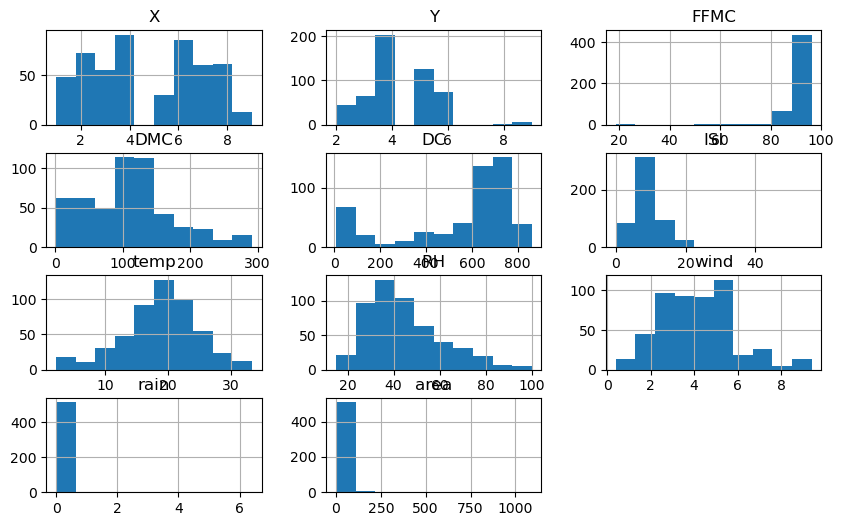

In [32]:
# Create histograms for all numerical columns
data.hist(figsize=(10, 6))  # figsize is optional, adjust as needed
plt.show()

(array([429.,  30.,  20.,  10.,   6.,   4.,   3.,   2.,   2.,   2.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   1.,   2.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   0.    ,   10.9084,   21.8168,   32.7252,   43.6336,   54.542 ,
          65.4504,   76.3588,   87.2672,   98.1756,  109.084 ,  119.9924,
         130.9008,  141.8092,  152.7176,  163.626 ,  174.5344,  185.4428,
         196.3512,  207.2596,  218.168 ,  229.0764,  239.9848,  250.8932,
         261.8016,  27

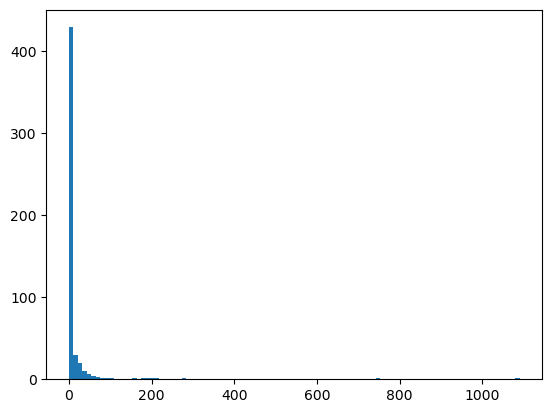

In [34]:
plt.hist(data['area'], bins=100)

### Very skewed distribution, but I'm not sure removing zeros is the best solution, as a zero burned hectares likely means a small area was on fire but a forest fire did not occur. Zero area fires could be filtered out or classified as something else.

Making a new columns with numerical days and months as well as a date column

In [26]:
day_mapping = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6}
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}


In [27]:
clean_data['month_num']=clean_data['month'].map(month_mapping)
clean_data['day_num']=clean_data['day'].map(day_mapping)

C:\Users\user\AppData\Local\Temp\ipykernel_30780\1388035913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['month_num']=clean_data['month'].map(month_mapping)
C:\Users\user\AppData\Local\Temp\ipykernel_30780\1388035913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['day_num']=clean_data['day'].map(day_mapping)


In [133]:
numerical_clean_data['month_num']=clean_data['month'].map(month_mapping)
numerical_clean_data['day_num']=clean_data['day'].map(day_mapping)

In [6]:
clean_data.head()

NameError: name 'clean_data' is not defined

In [11]:
numerical_clean_data = clean_data.select_dtypes(include=['number'])

In [12]:
numerical_clean_data.info

<bound method DataFrame.info of      X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[513 rows x 11 columns]>

In [13]:
numerical_clean_data.describe

<bound method NDFrame.describe of      X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[513 rows x 11 columns]>

In [14]:
numerical_clean_data.dtypes

X         int64
Y         int64
FFMC    float64
DMC     float64
DC      float64
ISI     float64
temp    float64
RH        int64
wind    float64
rain    float64
area    float64
dtype: object

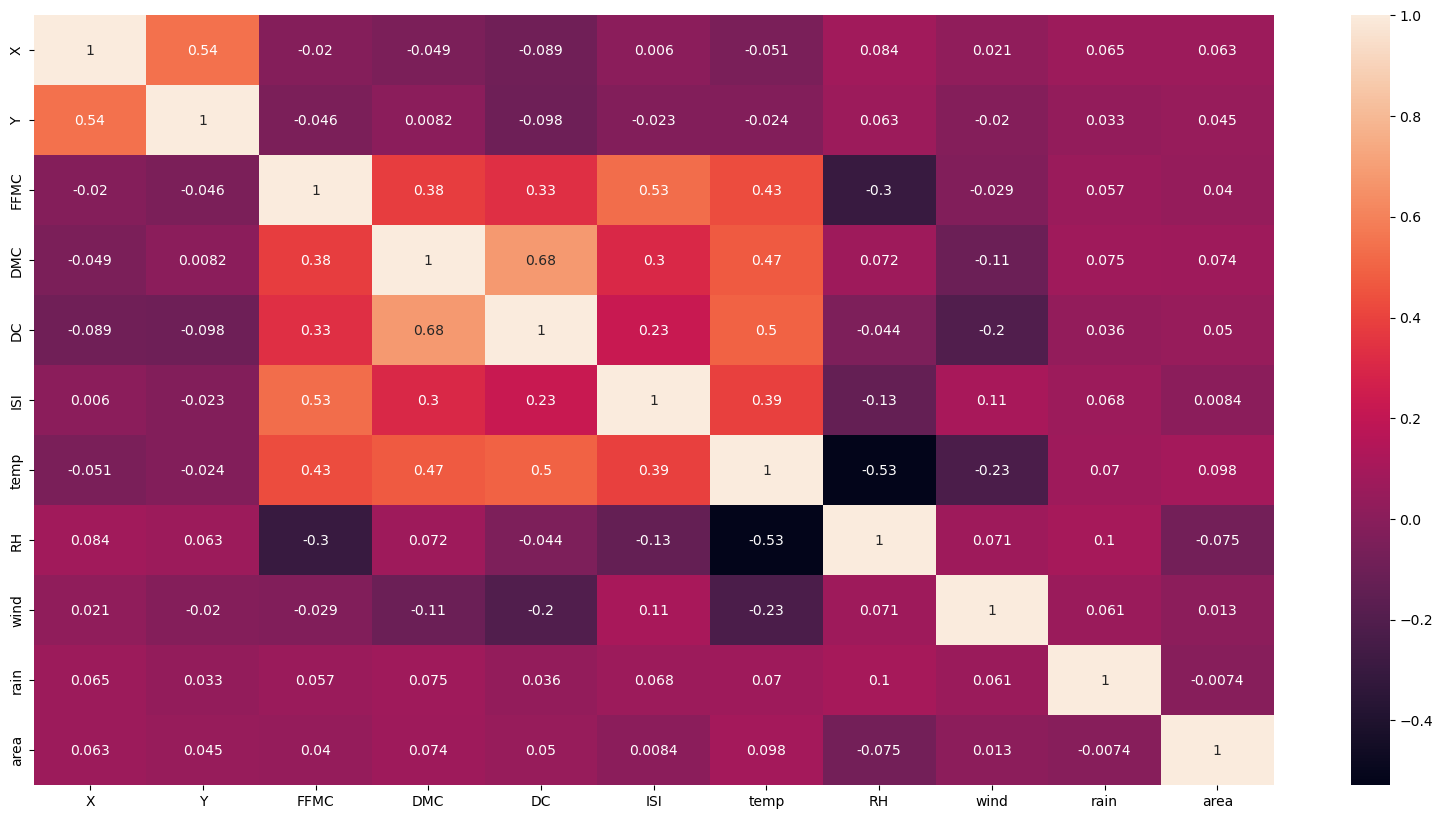

In [17]:
#Relationship analysis
#correlation analysis

#Another way to make the heatmap
sns.heatmap(numerical_clean_data.corr(), annot = True) 
plt.rcParams['figure.figsize'] = (30, 20) #can change these numbers here

In [23]:
correlation_matrix=numerical_clean_data.corr()
correlation_matrix['area']
#area increasing size of fire is not well correlated to indexes at first glance. This is likely because 
#variables increasing the size of fires also increases the number of small or 0 sized fires.


X       0.062930
Y       0.045168
FFMC    0.040232
DMC     0.073783
DC      0.050313
ISI     0.008411
temp    0.098222
RH     -0.075460
wind    0.012699
rain   -0.007418
area    1.000000
Name: area, dtype: float64

In [24]:
numerical_clean_data.head()

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

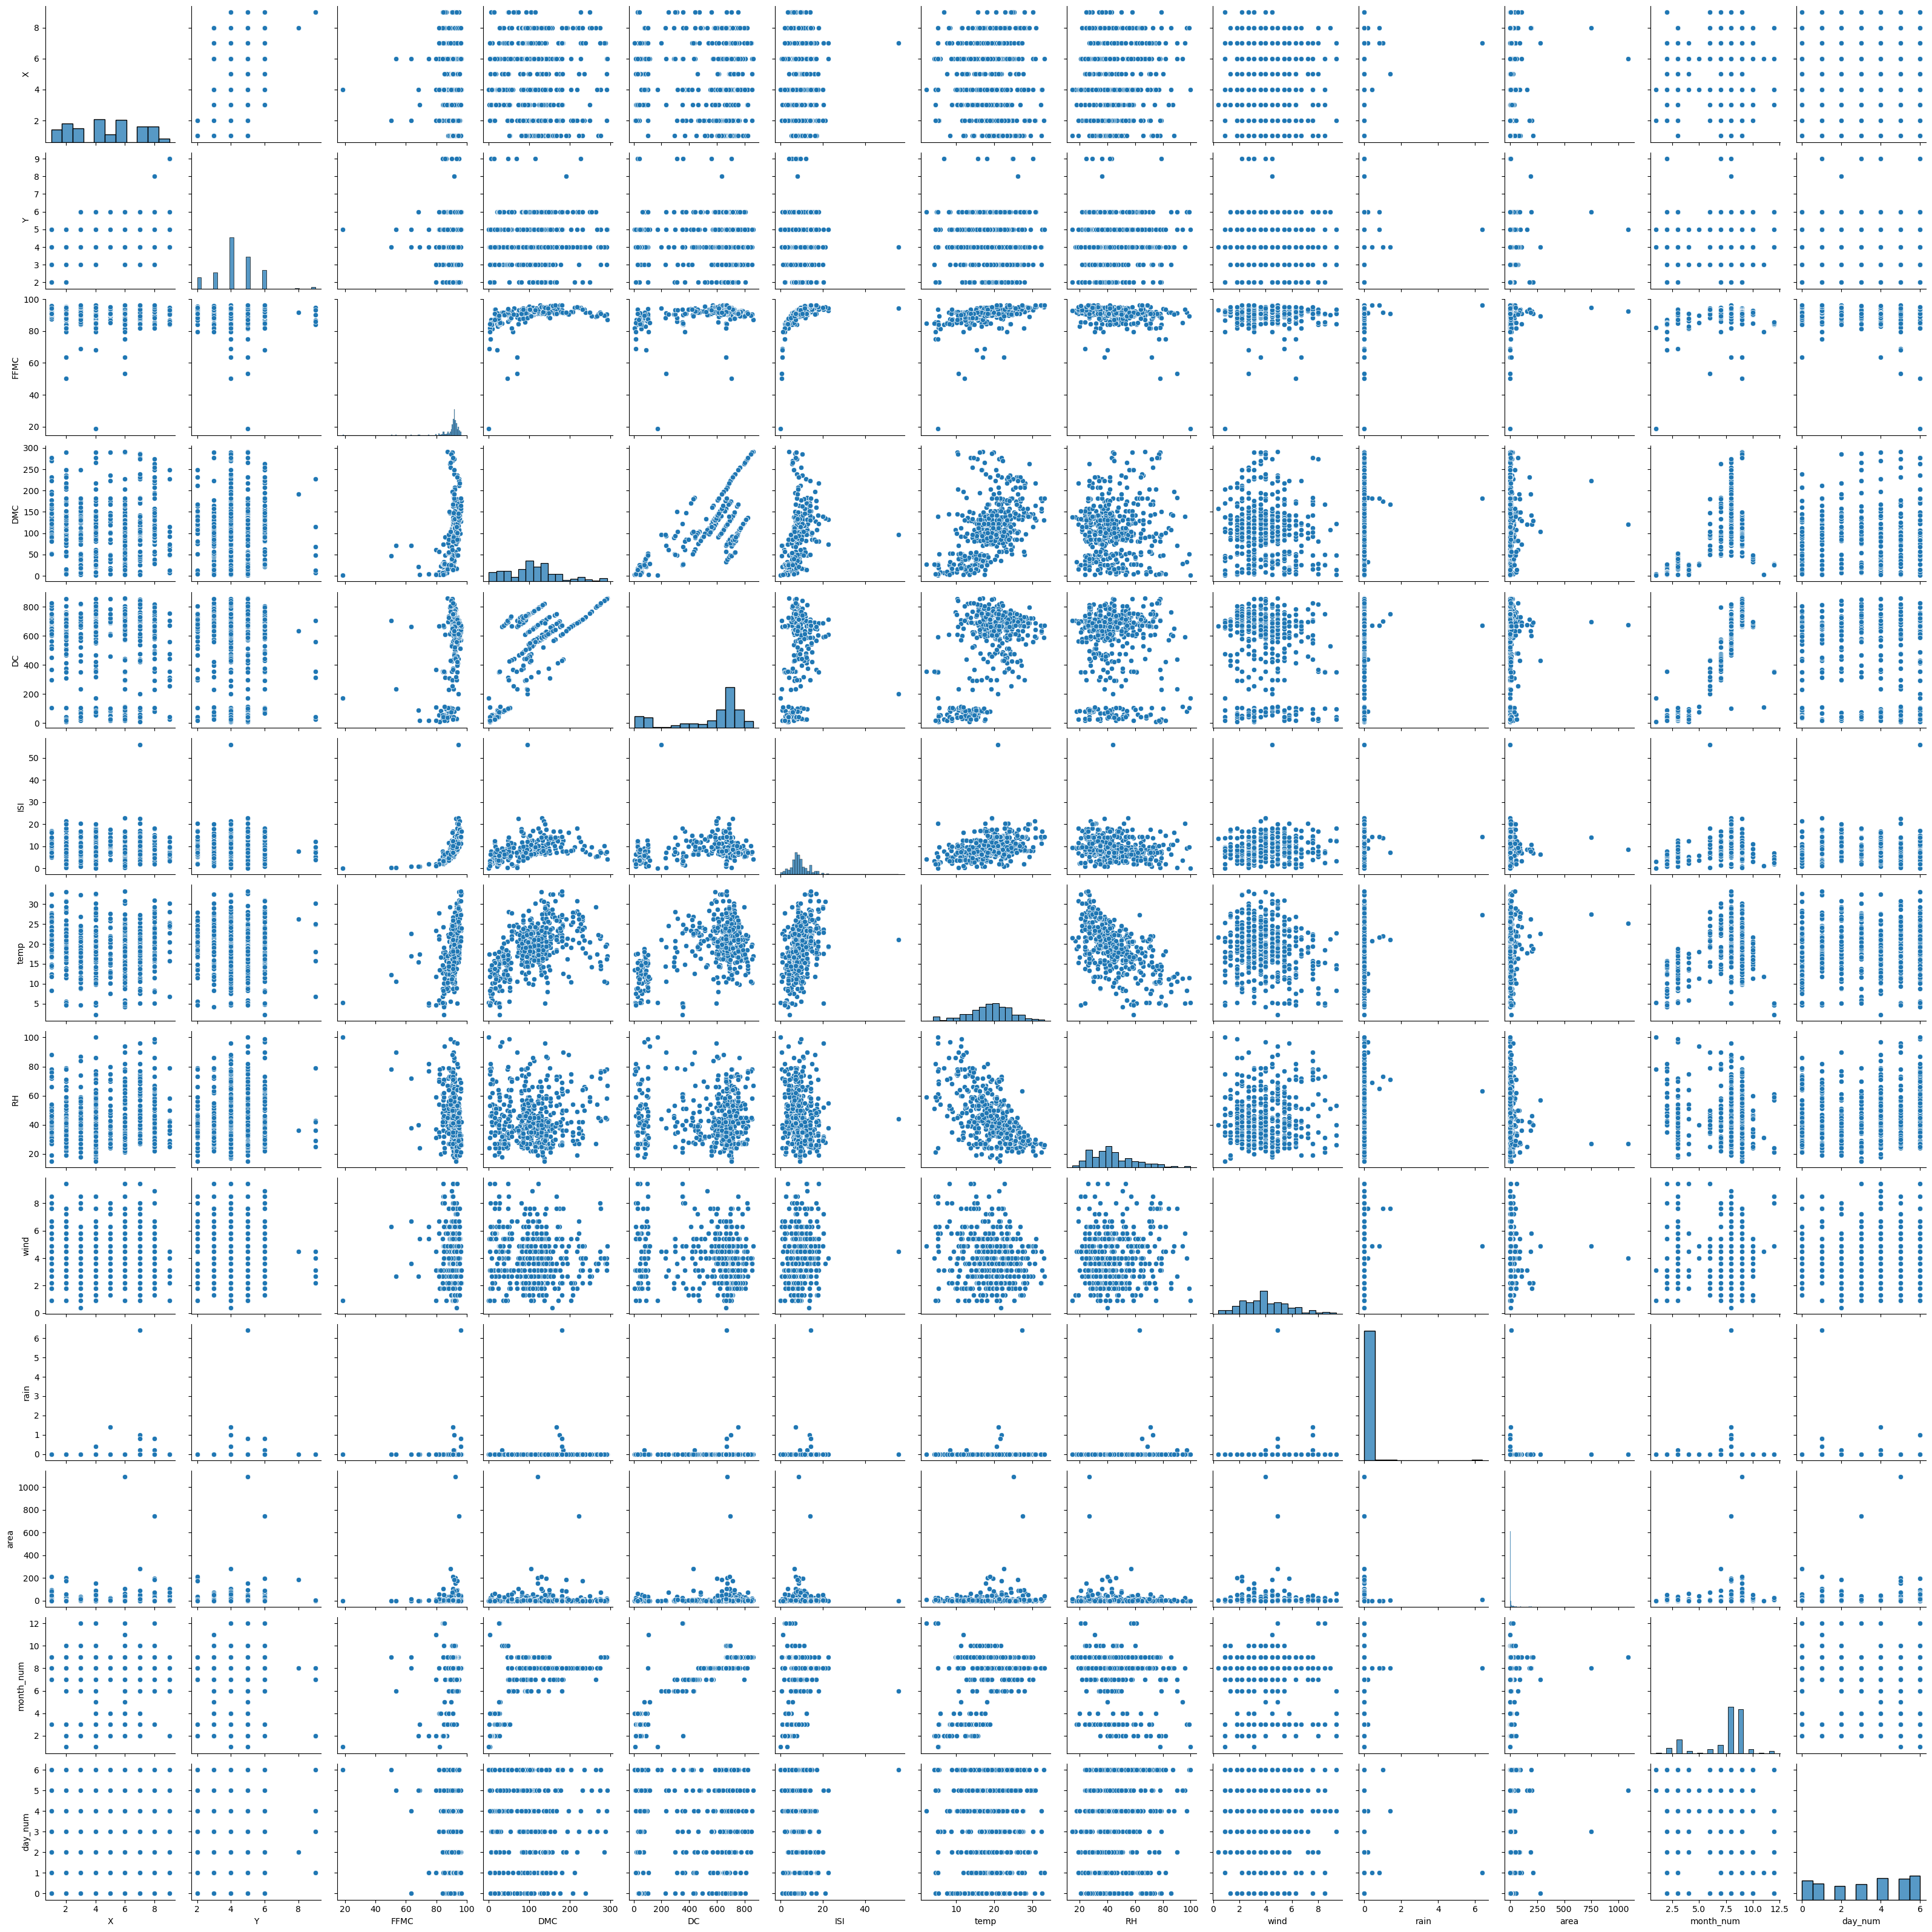

In [81]:
sns.pairplot(numerical_clean_data)

#### certain index are trivially correlated like DMC and DC which both measure similar phenomenon, RH and temp are also correlated which is not surprising. DC and month number are also correlated which is somewhat surprising, later summer and fall must be dryer...

<Axes: ylabel='Count'>

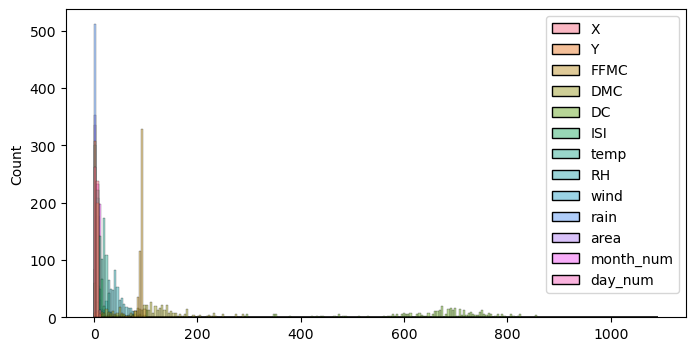

In [86]:
#Make seperate histograms to see distribution
sns.histplot(numerical_clean_data)  #can make bins

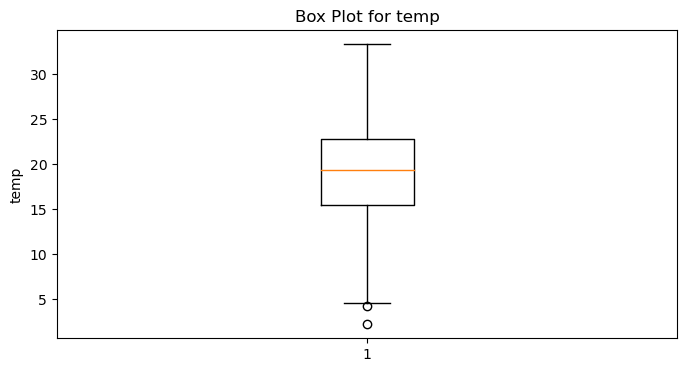

In [88]:
#look for outliers
plt.boxplot(numerical_clean_data['temp'])
plt.ylabel('temp')
plt.title('Box Plot for temp')
plt.show()

#### signficant amount of moderate temp fire, 15-20 degreees in Q1 of boxplot

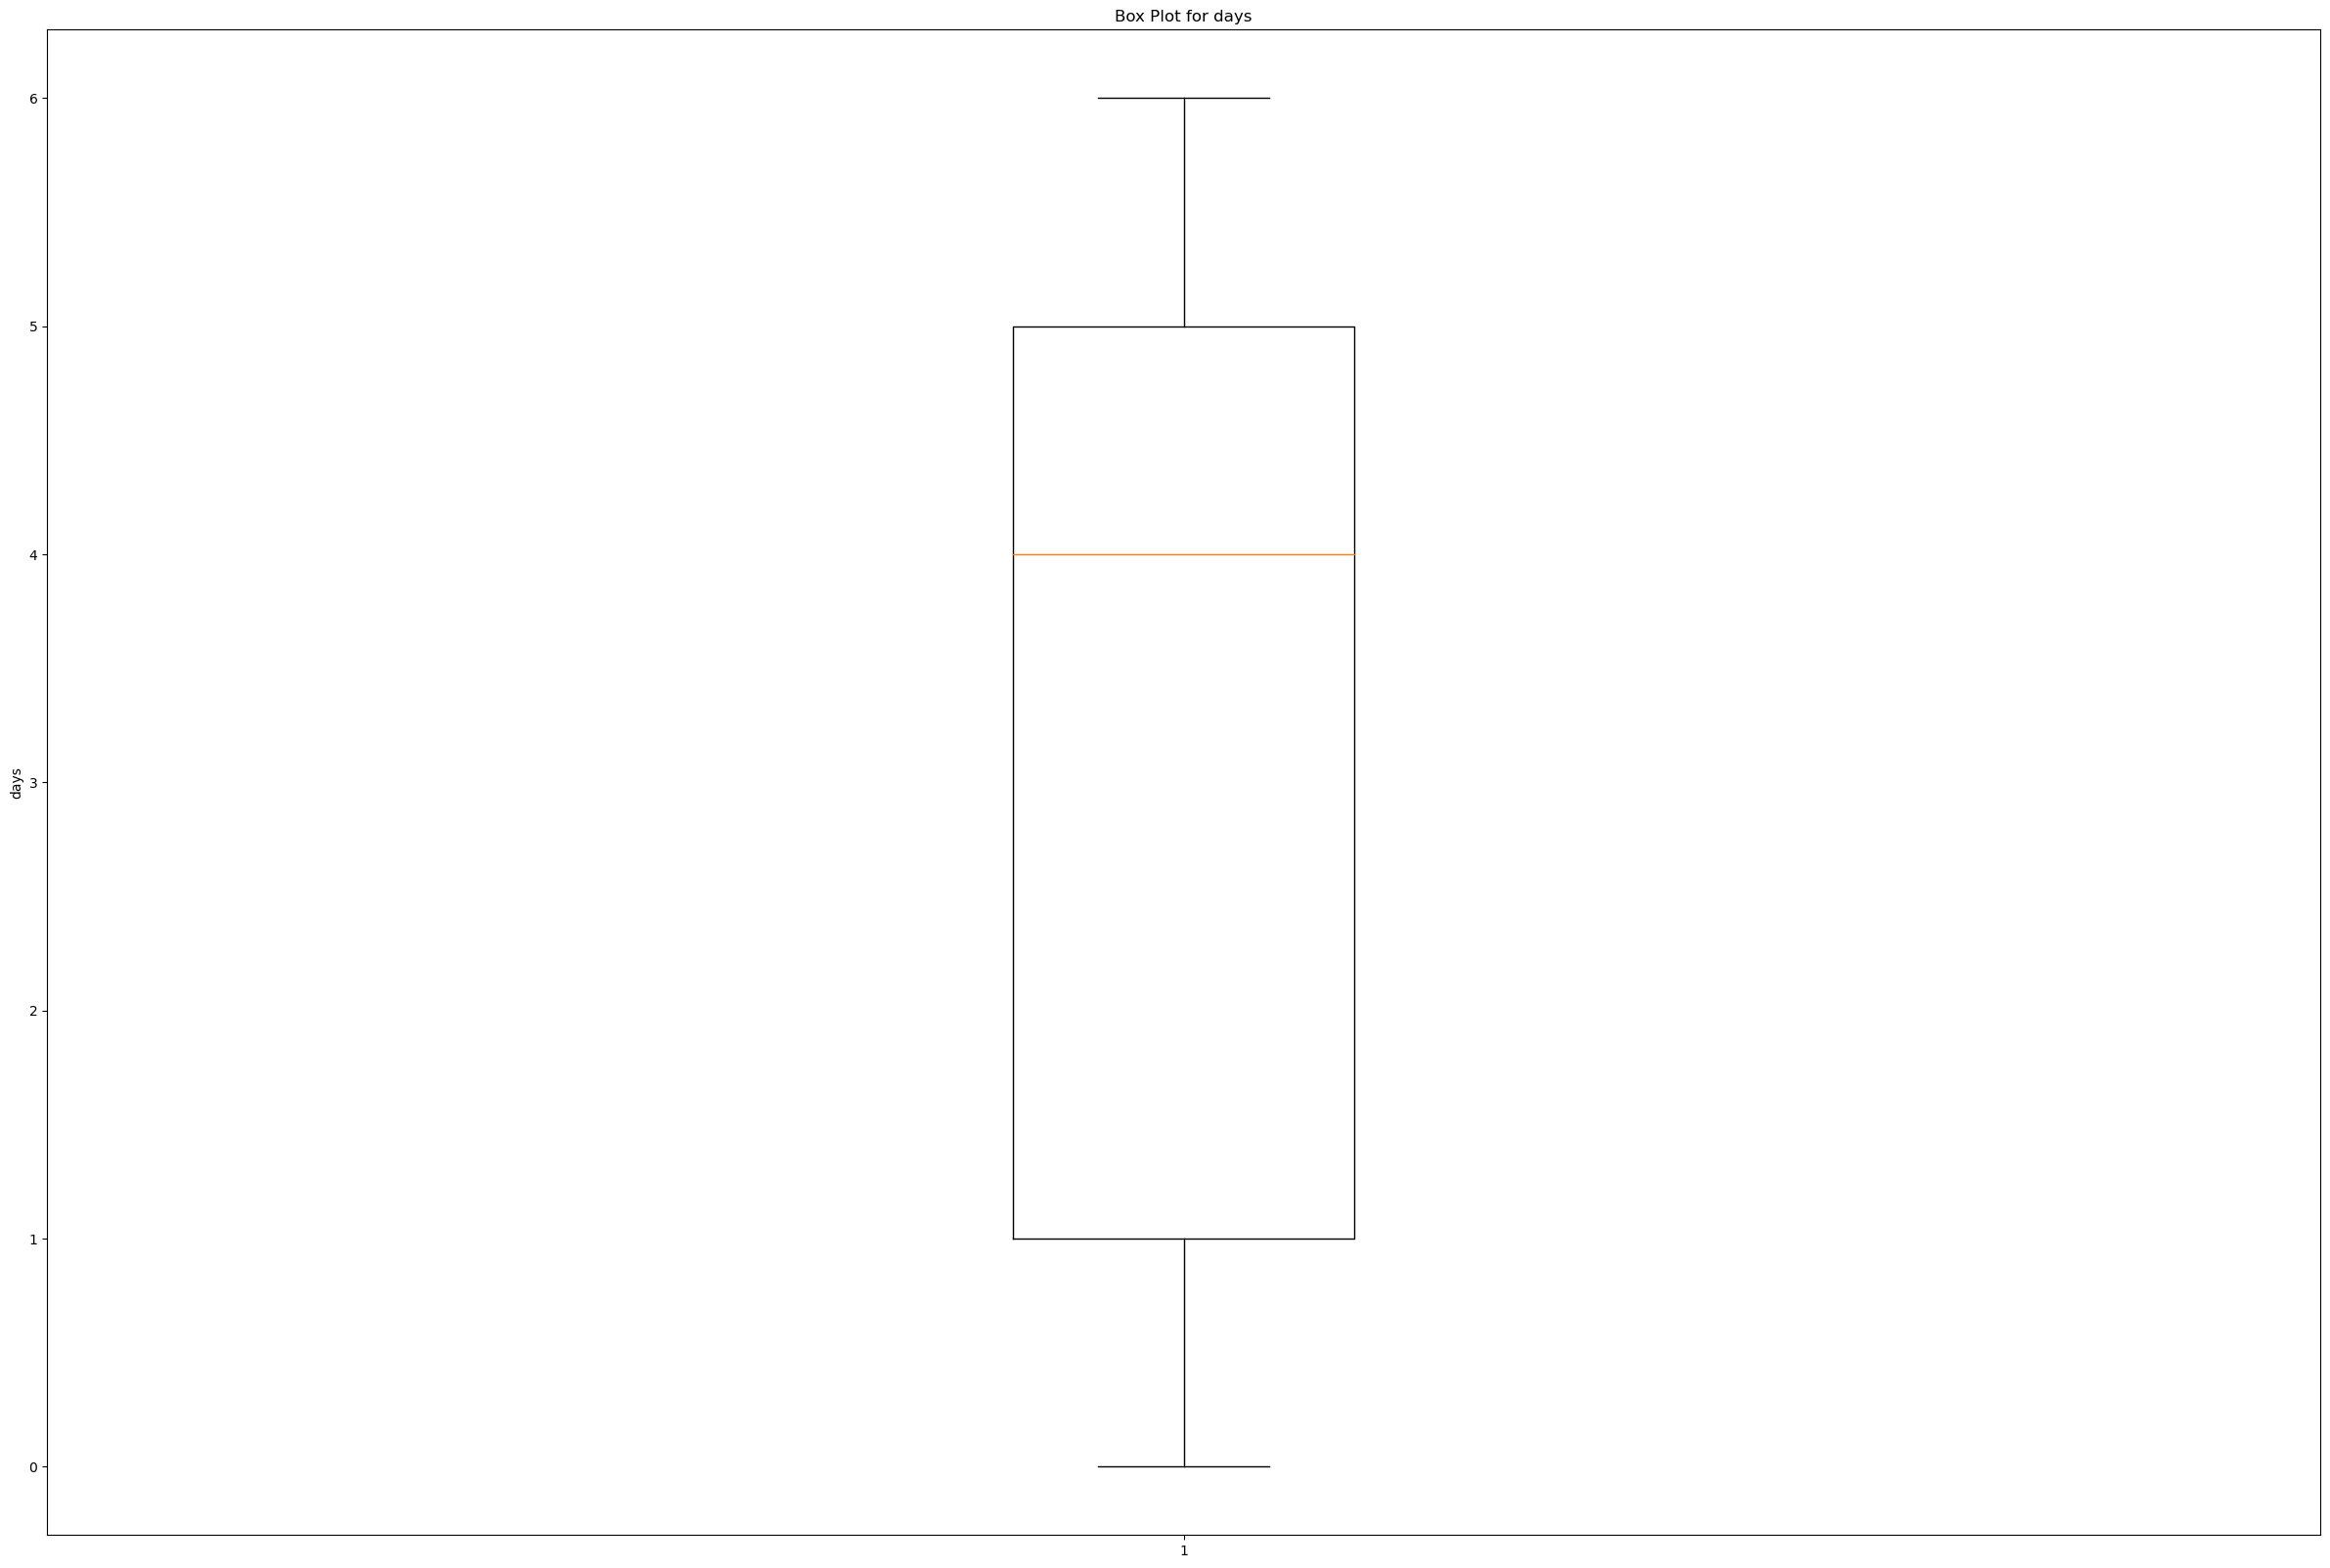

In [29]:
#look for outliers in days
plt.boxplot(clean_data['day_num'])
plt.ylabel('days')
plt.title('Box Plot for days')
plt.show()

<Axes: >

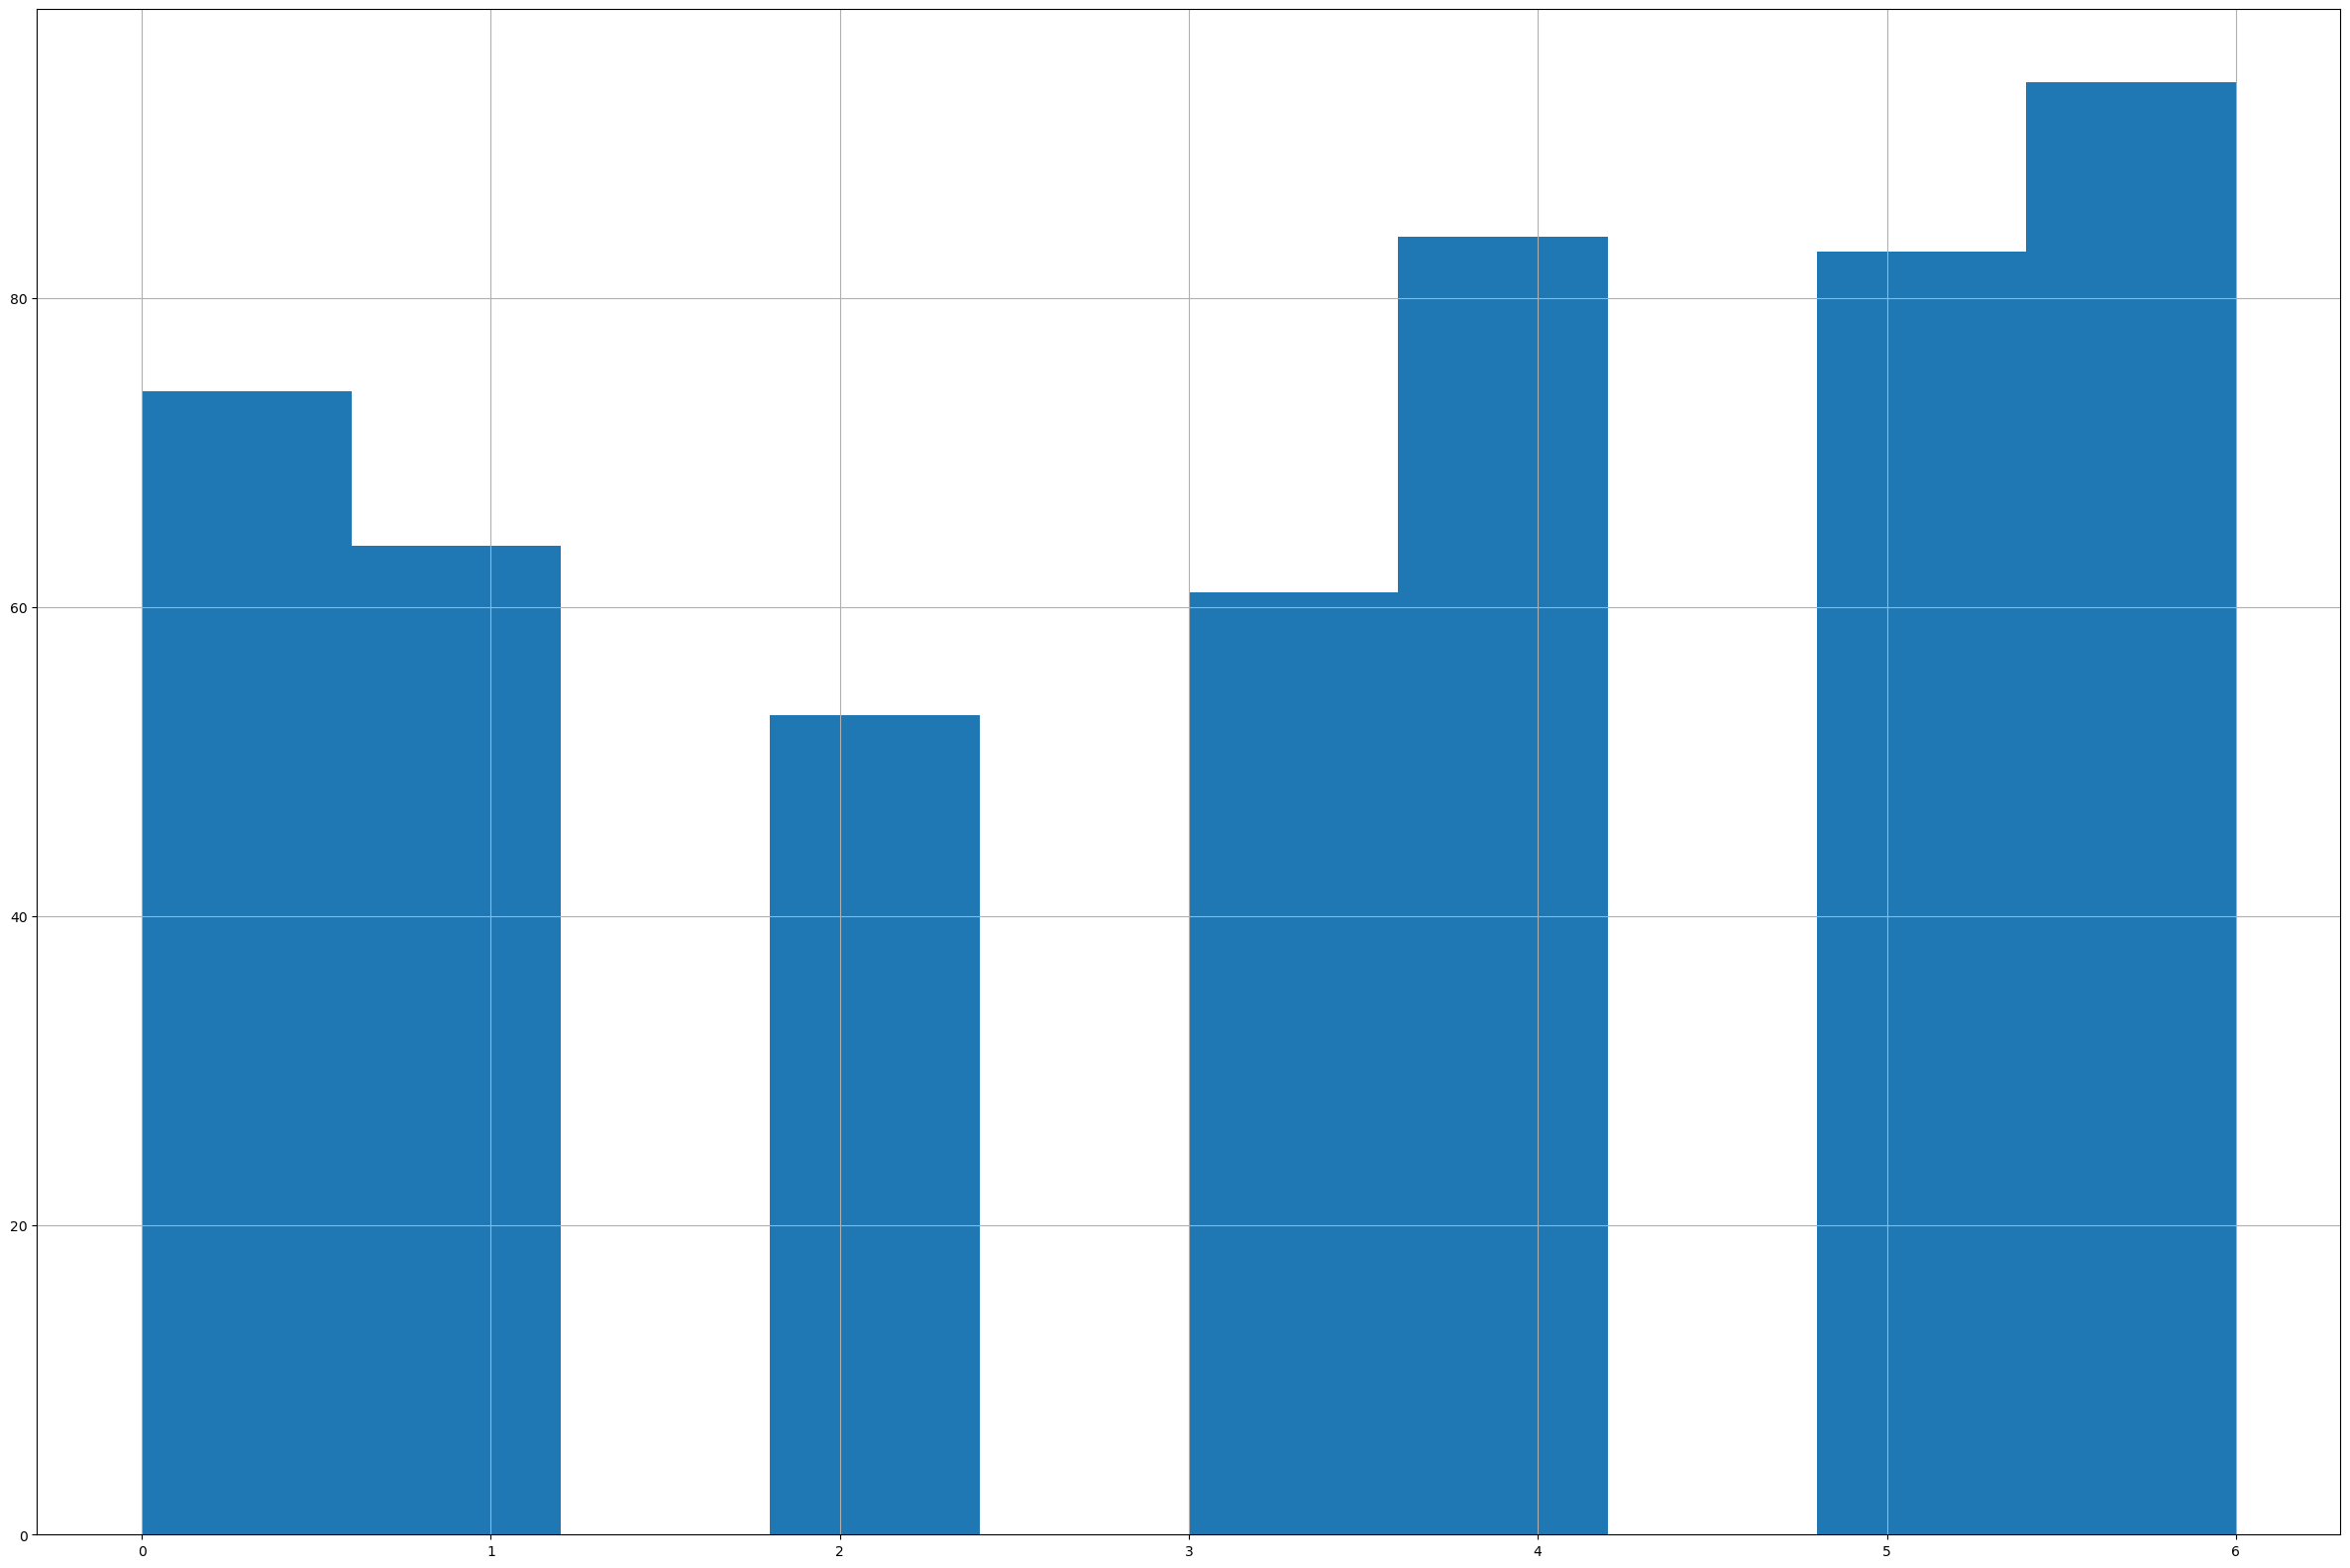

In [35]:
clean_data['day_num'].hist()
#days favour weekend, perhaps increase in human activity 

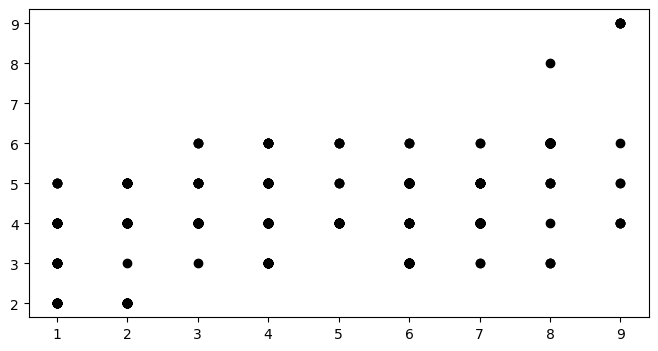

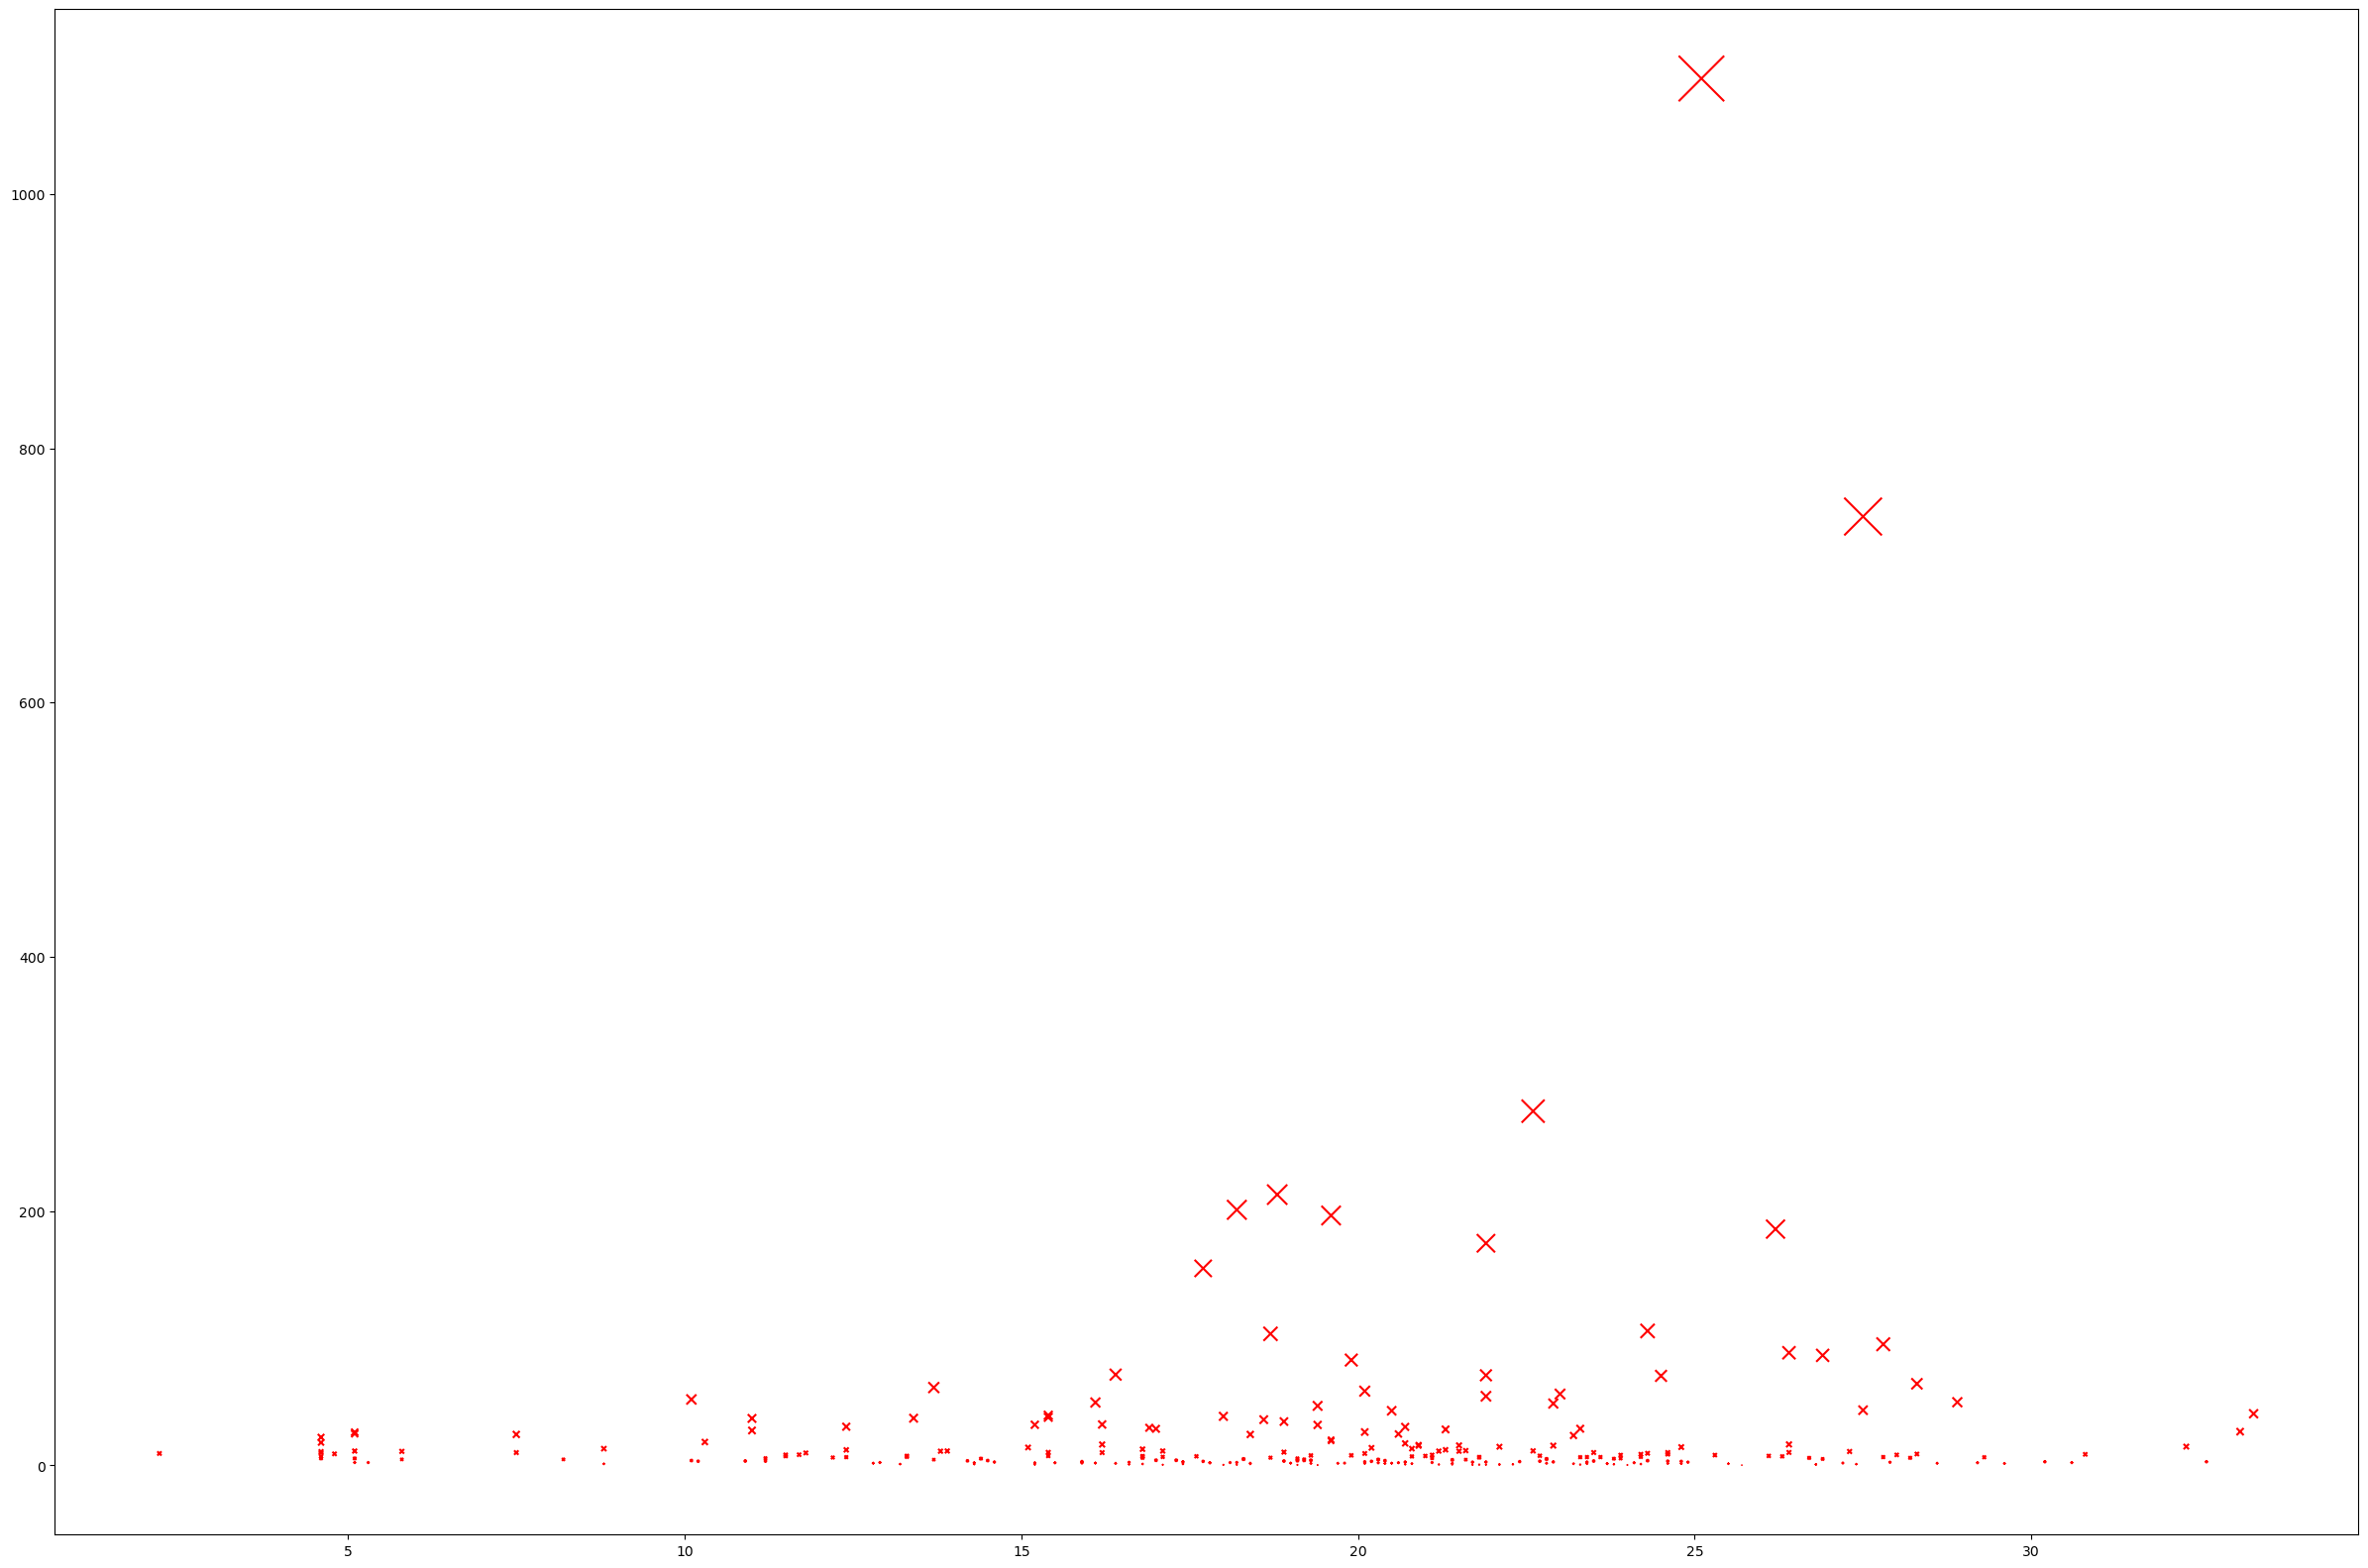

In [36]:
x=numerical_clean_data['temp']
y=numerical_clean_data['area']
area=numerical_clean_data['area']
plt.scatter(x, y, label='Map', color='red', marker='x',s=area)

In [38]:
correlation_matrix['temp'] # looking at scatter plot above, if 0 area fires were to be ignored, we would see better correlations

X      -0.051070
Y      -0.023871
FFMC    0.431609
DMC     0.469590
DC      0.497584
ISI     0.394217
temp    1.000000
RH     -0.528670
wind   -0.227618
rain    0.069526
area    0.098222
Name: temp, dtype: float64

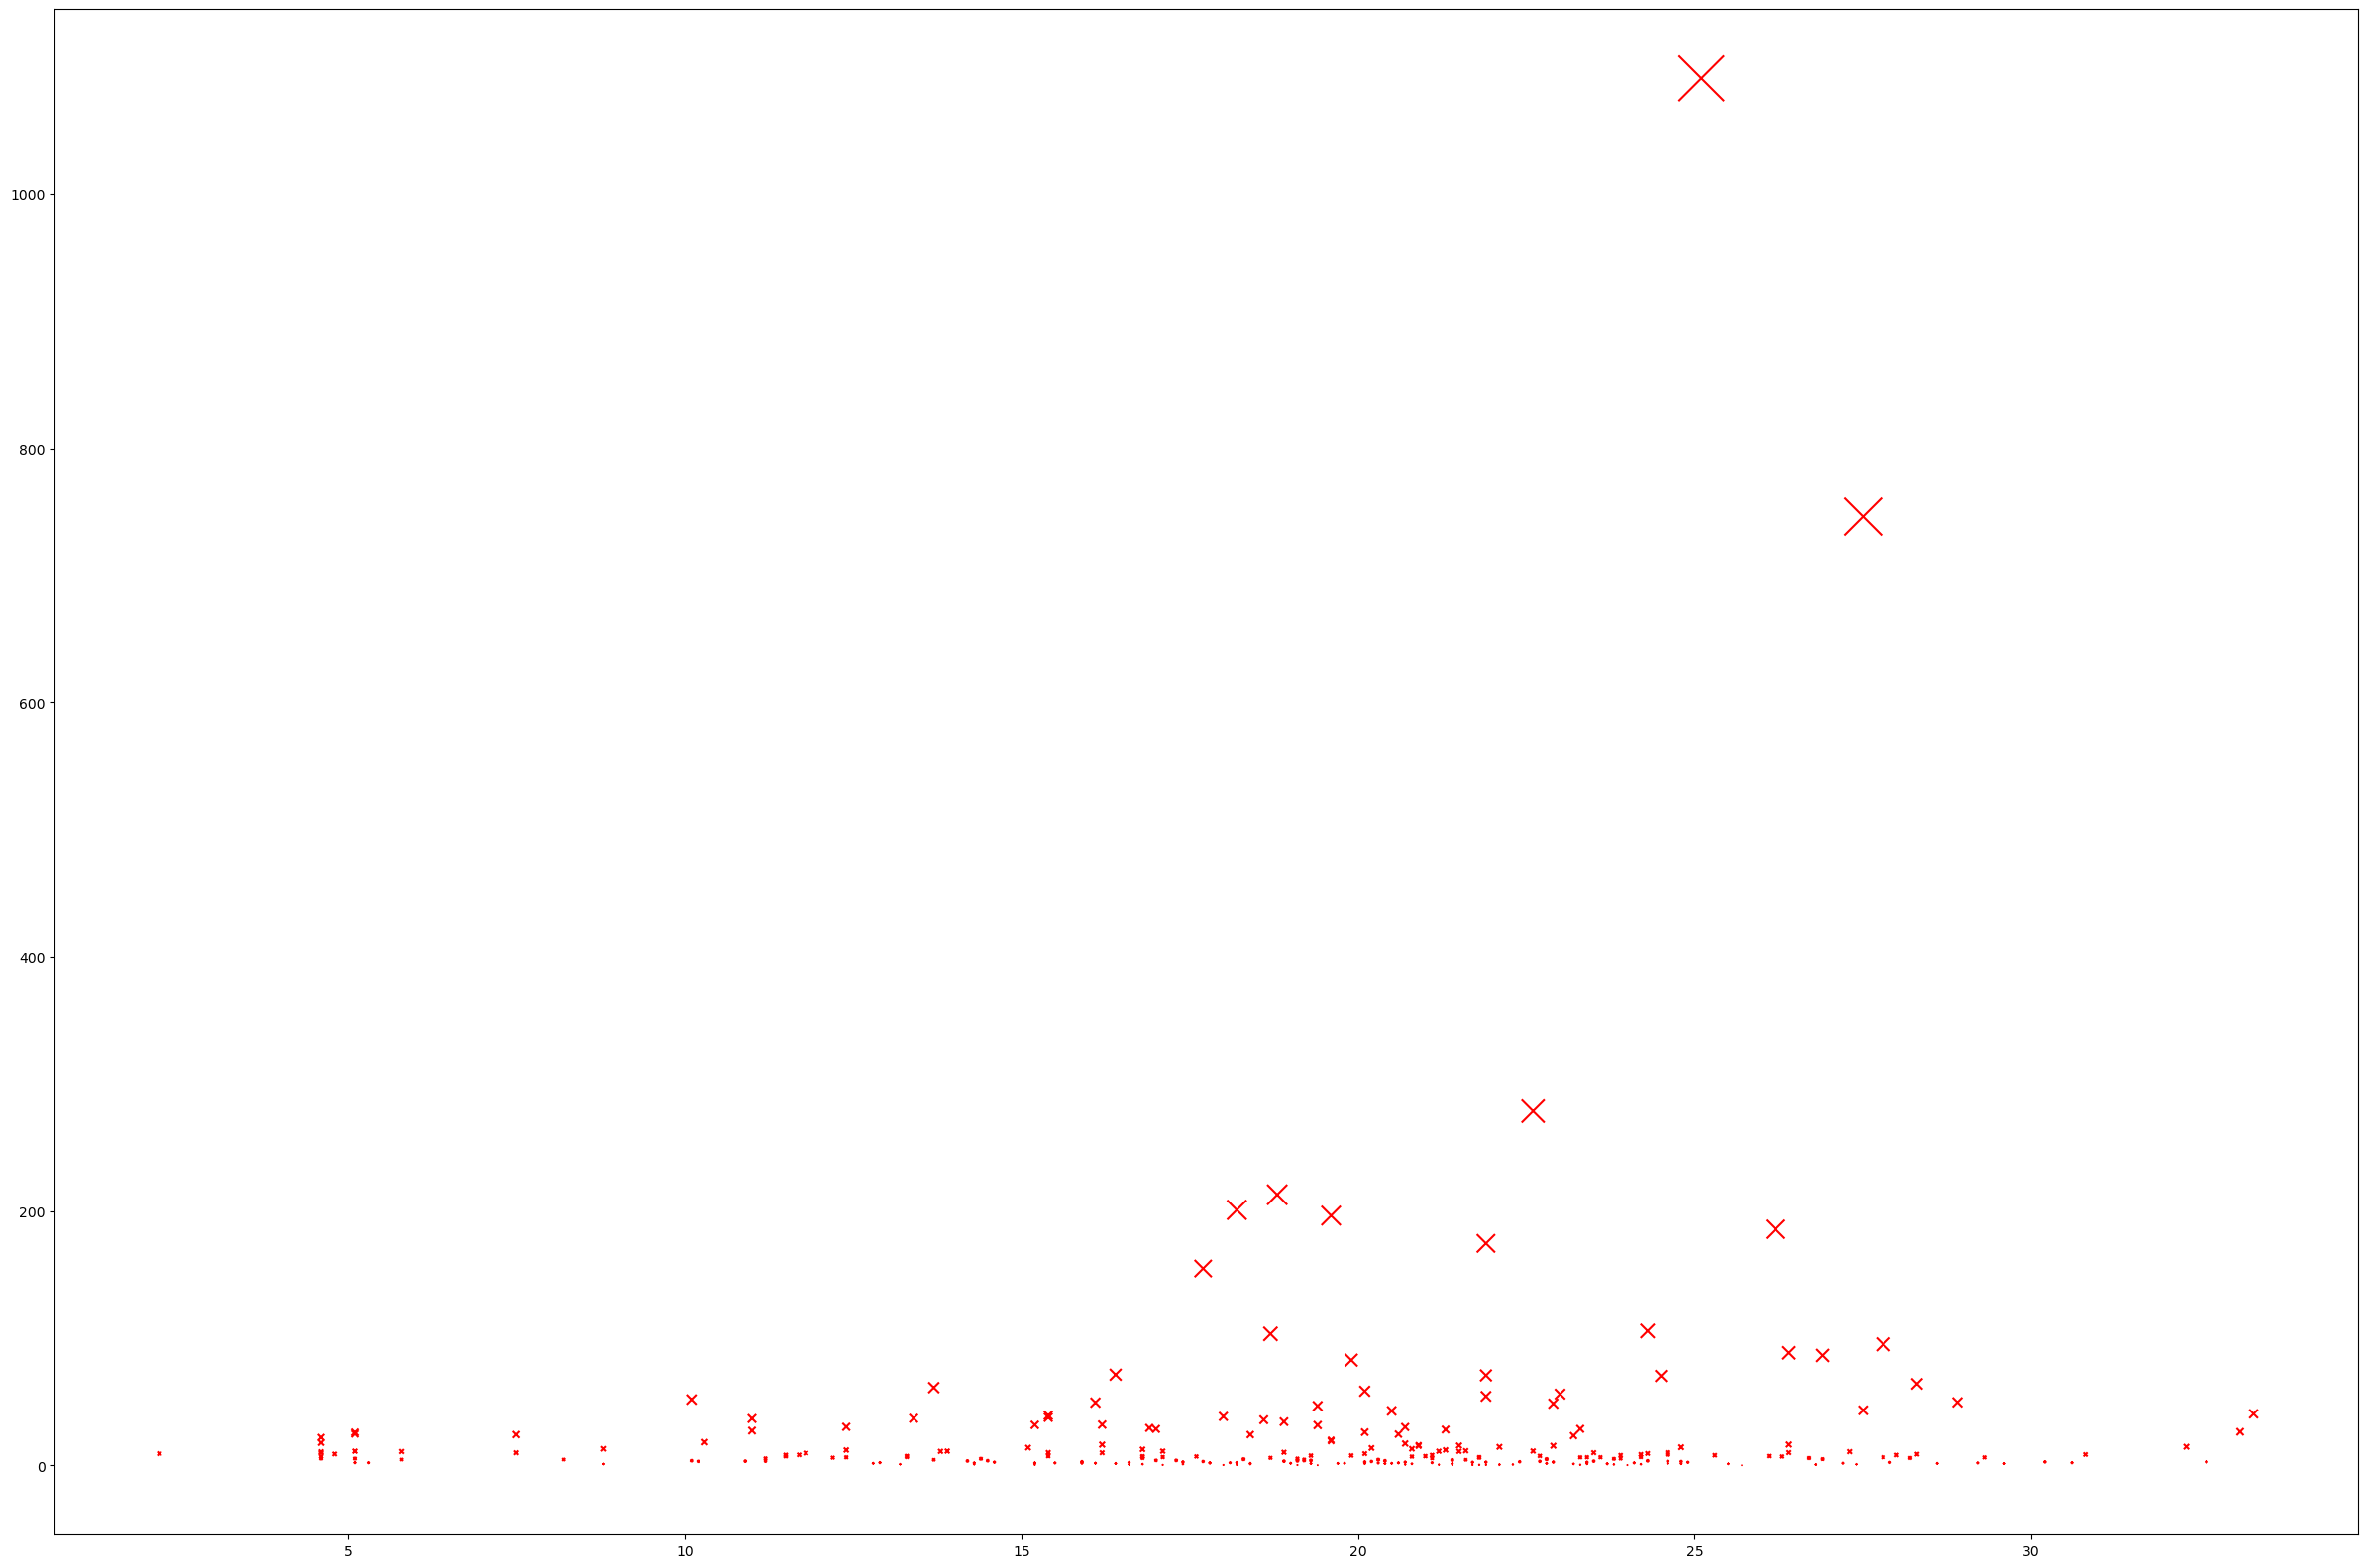

In [39]:
no_zeros_df=numerical_clean_data[numerical_clean_data['area']!=0]

x=no_zeros_df['temp']
y=no_zeros_df['area']
area=no_zeros_df['area']
plt.scatter(x, y, label='Map', color='red', marker='x',s=area)

In [43]:
correlation_matrix_no_zeros=no_zeros_df.corr()
print(correlation_matrix_no_zeros['area'])
print(correlation_matrix['area'])
#surprisingly only a small increase in correlation to temperature without zeros, there still must be lots of small fires pulling down the correlation

X       0.070391
Y       0.050306
FFMC    0.054296
DMC     0.089585
DC      0.047512
ISI     0.002180
temp    0.110388
RH     -0.104894
wind    0.002013
rain   -0.012889
area    1.000000
Name: area, dtype: float64
X       0.062930
Y       0.045168
FFMC    0.040232
DMC     0.073783
DC      0.050313
ISI     0.008411
temp    0.098222
RH     -0.075460
wind    0.012699
rain   -0.007418
area    1.000000
Name: area, dtype: float64


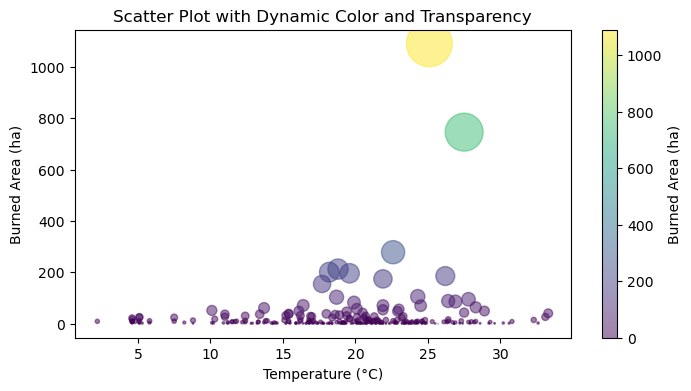

In [98]:
x=numerical_clean_data['temp']
y=numerical_clean_data['area']

plt.scatter(x, y, label='Map', c=area, cmap='viridis', alpha=0.5, marker='o',s=area)

# Add axis labels
plt.xlabel('Temperature (°C)')
plt.ylabel('Burned Area (ha)')

# Add a colorbar for reference
plt.colorbar(label='Burned Area (ha)')

# Add a title
plt.title('Scatter Plot with Dynamic Color and Transparency')

# Display the plot
plt.show()

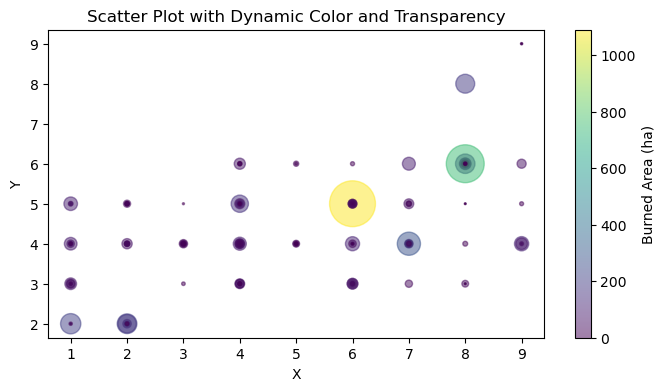

In [173]:
#look at "map"

x=numerical_clean_data['X']
y=numerical_clean_data['Y']
plt.scatter(x, y, label='Map', c=area, cmap='viridis', alpha=0.5, marker='o',s=area)

# Add axis labels
plt.xlabel('X')
plt.ylabel('Y')

# Add a colorbar for reference
plt.colorbar(label='Burned Area (ha)')

# Add a title
plt.title('Scatter Plot with Dynamic Color and Transparency')

# Display the plot
plt.show()

In [100]:
by_region=numerical_clean_data.groupby(['X', 'Y'])

In [102]:
by_region['month_num'].count()

X  Y
1  2    19
   3    10
   4    15
   5     4
2  2    25
   3     1
   4    27
   5    20
3  3     1
   4    42
   5     7
   6     3
4  3    21
   4    35
   5    25
   6     8
5  4    23
   5     3
   6     4
6  3    25
   4     9
   5    49
   6     3
7  3     2
   4    45
   5    11
   6     2
8  3     3
   4     1
   5     4
   6    52
   8     1
9  4     4
   5     2
   6     1
   9     6
Name: month_num, dtype: int64

In [189]:
'initial fire > 0', 'initial fire =0', 'odds fire spreads', 'logistic regression fire spreads', 'fire spread? 0/1'

('initial fire > 0',
 'initial fire =0',
 'odds fire spreads',
 'logistic regression fire spreads',
 'fire spread? 0/1')

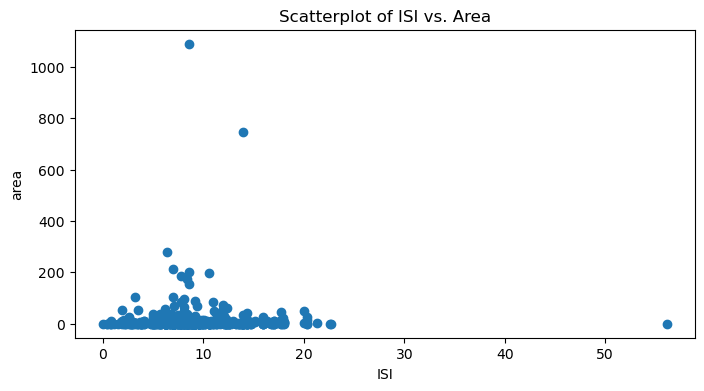

In [199]:
numerical_clean_data[['ISI', 'area']]
x = numerical_clean_data['ISI']
y = numerical_clean_data['area']

plt.scatter(x, y)
plt.xlabel('ISI')
plt.ylabel('area')
plt.title('Scatterplot of ISI vs. Area')
plt.show()

In [119]:
count_zero = numerical_clean_data['area'].value_counts()[0]
count_spread=(numerical_clean_data['area']>0).sum()

In [120]:
print(count_zero)
print(count_spread)

244
269


In [101]:
by_month=clean_data.groupby(['month_num'])

In [141]:
by_month['area'].sum()


month_num
1        0.00
2      125.50
3      206.60
4       80.02
5       38.48
6       99.30
7      459.83
8     2297.99
9     3086.13
10      99.57
11       0.00
12     119.97
Name: area, dtype: float64

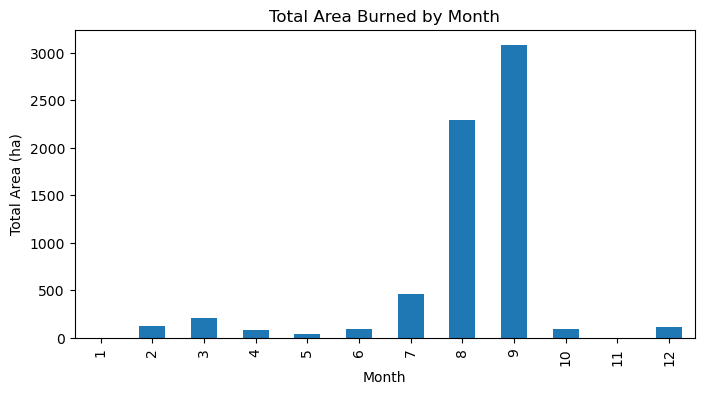

In [147]:
area_burned_by_month = by_month['area'].sum()


area_burned_by_month.plot(kind='bar')


plt.xlabel('Month')
plt.ylabel('Total Area (ha)')
plt.title('Total Area Burned by Month')


plt.show()

Area burned is very seasonal, "mini" fire seasons in march and dec, (Christian/Portugese holiday seasons?) outside of the main summer fire season

In [396]:
by_month['area'].mean()

month_num
1      0.000000
2      6.275000
3      3.898113
4      8.891111
5     19.240000
6      6.206250
7     14.369687
8     12.626319
9     17.942616
10     6.638000
11     0.000000
12    13.330000
Name: area, dtype: float64

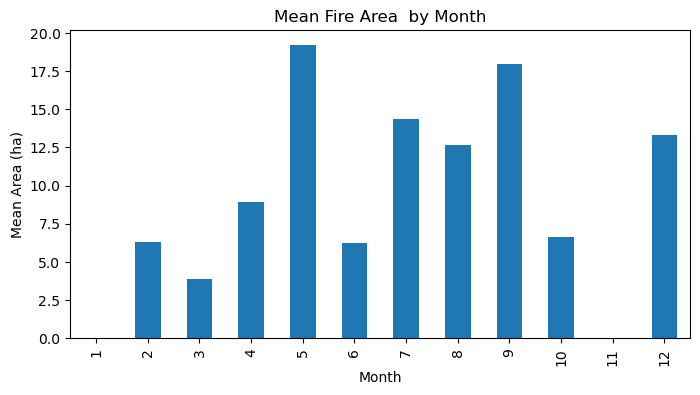

In [400]:
avg_area_by_month = by_month['area'].mean()


avg_area_by_month.plot(kind='bar')


plt.xlabel('Month')
plt.ylabel('Mean Area (ha)')
plt.title('Mean Fire Area  by Month')


plt.show()

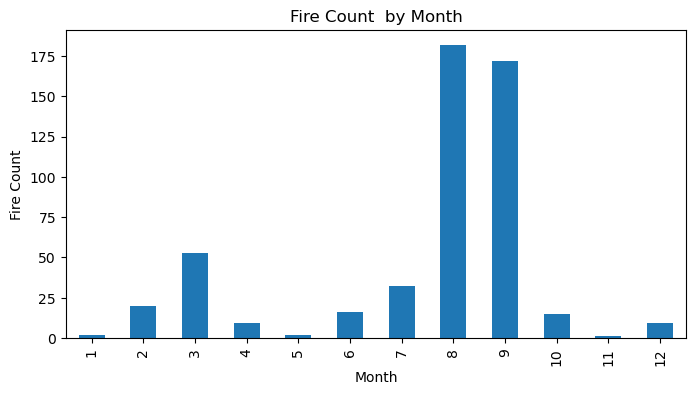

In [402]:
count_area_by_month = by_month['area'].count()


count_area_by_month.plot(kind='bar')


plt.xlabel('Month')
plt.ylabel('Fire Count')
plt.title('Fire Count  by Month')


plt.show()

The number of fires correlates  well to the area burned for months with large sample sizes, this is likely the explination for wht there is no strong link between parameters and fire size

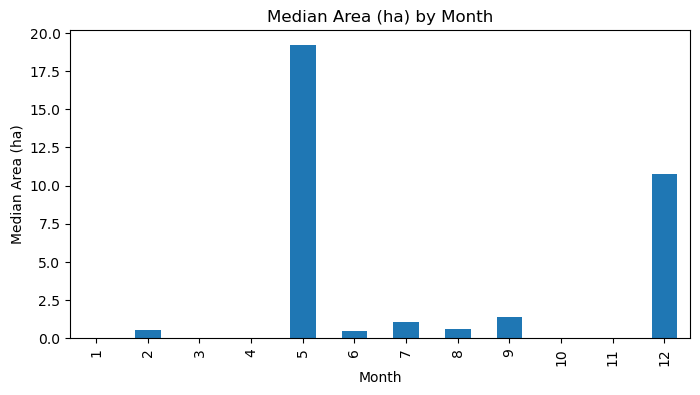

In [405]:
median_area_by_month = by_month['area'].median()


median_area_by_month.plot(kind='bar')


plt.xlabel('Month')
plt.ylabel('Median Area (ha)')
plt.title('Median Area (ha) by Month')


plt.show()

This chart is affected by small sample sizes

Text(0.5, 0.98, 'Area (ha) by month')

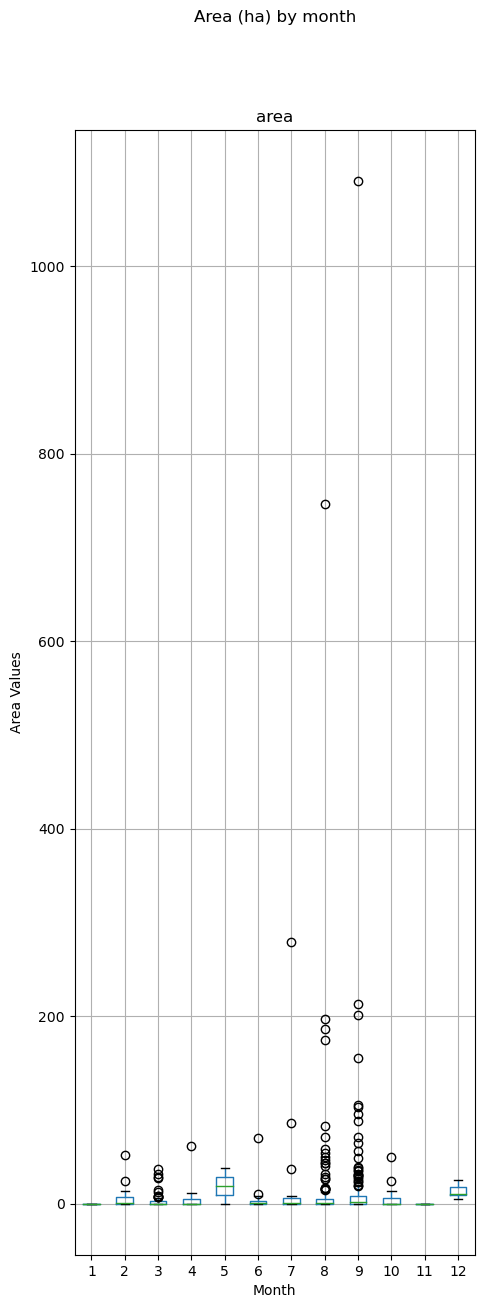

In [465]:
boxplot=numerical_clean_data.boxplot(column='area',by='month_num', figsize=(5, 15))

plt.xlabel('Month')
plt.ylabel('Area Values')
plt.suptitle('Area (ha) by month')


        

In the chart above, the outliers seem to be strongly seasonal, with the largest fire of each month trending up to a max in september. Although the sample size for fires is low, presumably there is similar number of days for a fire to occur each month, so the absence of large fires in low fire months, is perhaps not due to low sample size, as the "true" sample size is larger. An increase in the number of fires seems to strongly predict the range of fire sizes...


In [86]:

monthly_max=clean_data['area'].groupby(clean_data['month']).max() 
monthly_count=clean_data['area'].groupby(clean_data['month']).count()
data = pd.DataFrame({'Monthly_Max': monthly_max, 'Monthly_Count': monthly_count})
data.corr()

Monthly_Max  Monthly_Count
Monthly_Max       1.000000       0.942791
Monthly_Count     0.942791       1.000000

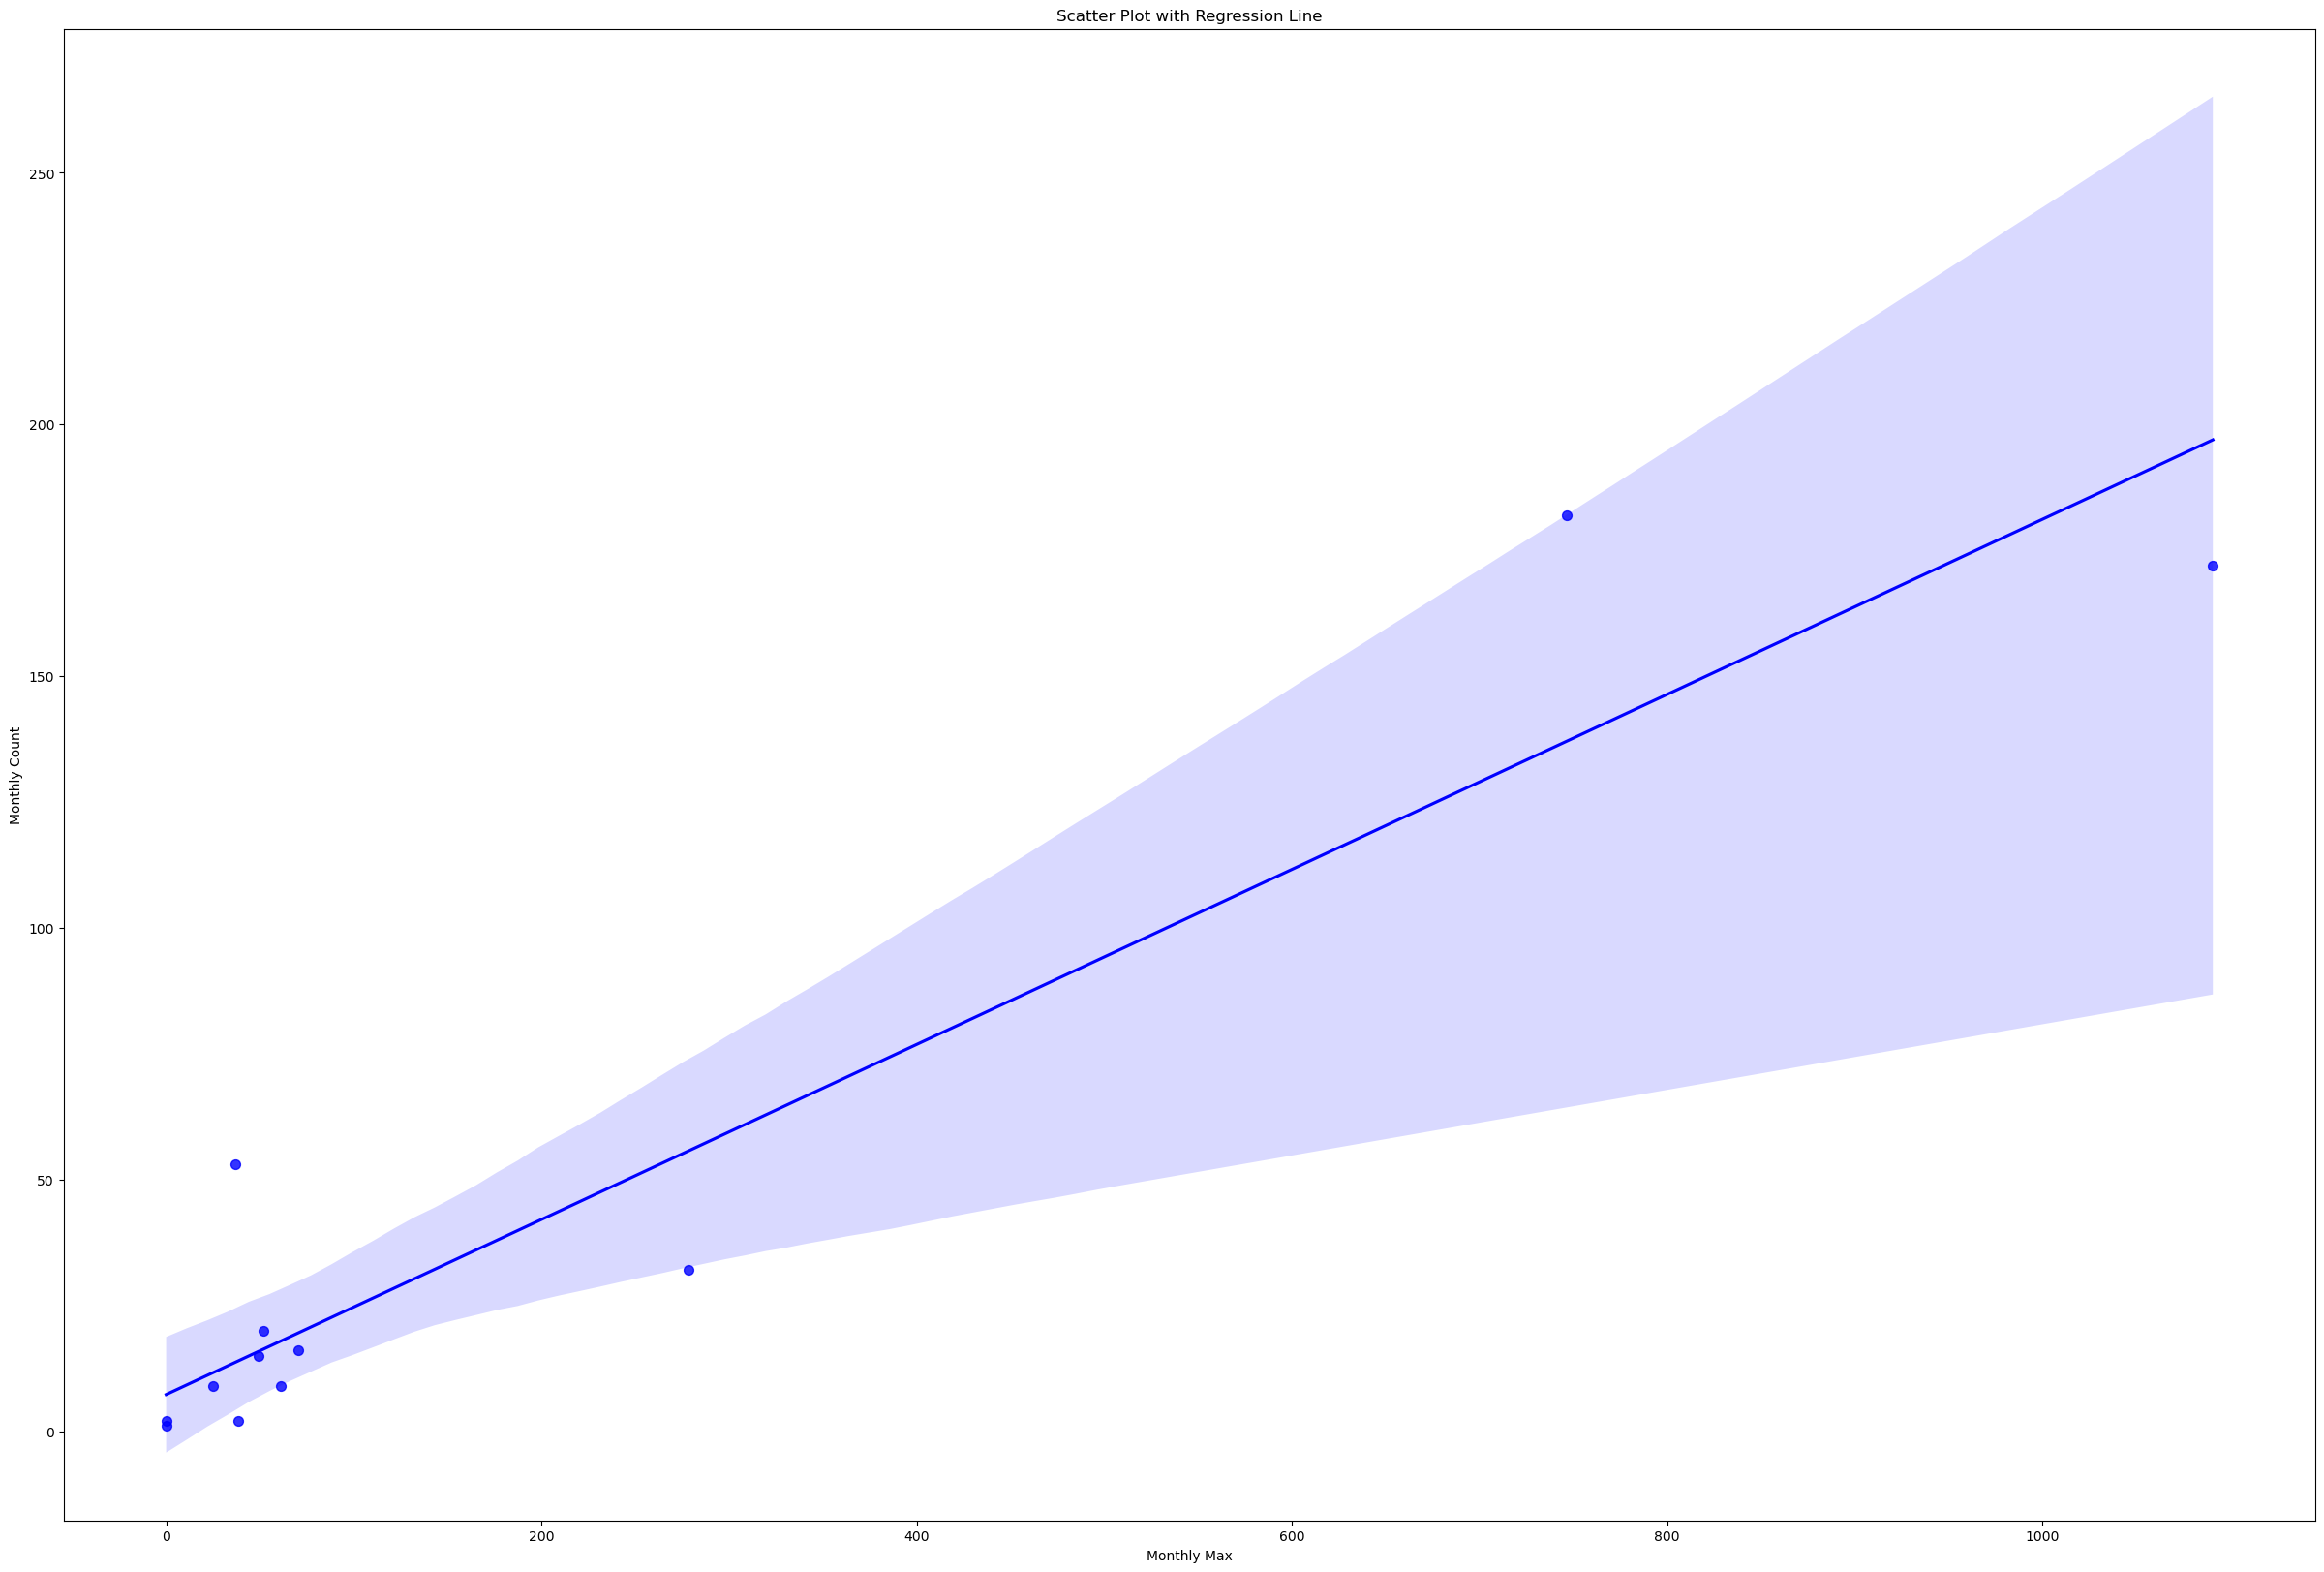

In [84]:
sns.regplot(x=monthly_max, y=monthly_count, color='b', scatter_kws={'s': 50})

# Add labels and title
plt.xlabel('Monthly Max')
plt.ylabel('Monthly Count')
plt.title('Scatter Plot with Regression Line')

# Display the plot
plt.show()

In [87]:
count_zero_by_month = clean_data['area'].eq(0).groupby(clean_data['month_num']).sum()


In [88]:
count_zero_by_month

month_num
1      2
2     10
3     35
4      5
5      1
6      8
7     14
8     83
9     75
10    10
11     1
12     0
Name: area, dtype: int64

In [90]:
count_spread_by_month=clean_data['area'].gt(0).groupby(clean_data['month_num']).sum()

In [92]:
count_spread_by_month
#number of fires greater than 0 size for each month

month_num
1      0
2     10
3     18
4      4
5      1
6      8
7     18
8     99
9     97
10     5
11     0
12     9
Name: area, dtype: int64

In [93]:
spread_count_comparison=pd.concat([count_zero_by_month, count_spread_by_month], axis=1, keys=['zero_count', 'spread_count'])

In [94]:
spread_count_comparison=spread_count_comparison.reset_index()

In [197]:
spread_count_comparison['spread_ratio']=spread_count_comparison['spread_count']/(spread_count_comparison['zero_count']+spread_count_comparison['spread_count'])
spread_count_comparison

month_num  zero_count  spread_count  spread_ratio
0           1           2             0      0.000000
1           2          10            10      0.500000
2           3          35            18      0.339623
3           4           5             4      0.444444
4           5           1             1      0.500000
5           6           8             8      0.500000
6           7          14            18      0.562500
7           8          83            99      0.543956
8           9          75            97      0.563953
9          10          10             5      0.333333
10         11           1             0      0.000000
11         12           0             9      1.000000

The only other month that has a signficant enough sample size outside of summer (march) has a much lower spread ratio than the summer months

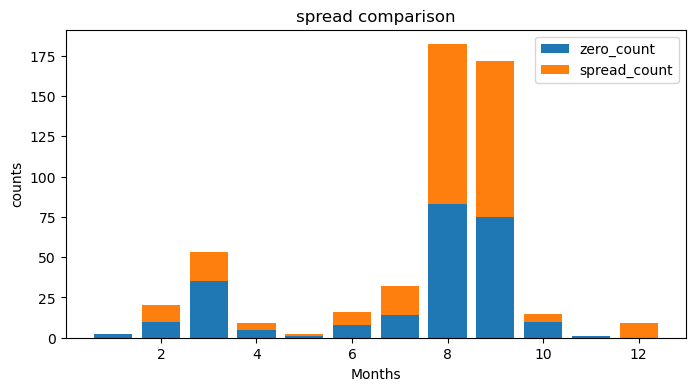

In [169]:
categories=spread_count_comparison['month_num']

plt.bar(categories, spread_count_comparison['zero_count'], label='zero_count')

# Create the second set of bars, stacked on top of the first set
plt.bar(categories, spread_count_comparison['spread_count'], bottom=spread_count_comparison['zero_count'], label='spread_count')

# Add labels, a legend, and a title
plt.xlabel('Months')
plt.ylabel('counts')
plt.title('spread comparison')
plt.legend()

# Show the plot
plt.show()

notice the lower ratio in march compared to the higher ratios in july,aug,sep

Also notable is the very high ratio in dec, but lowish sample size

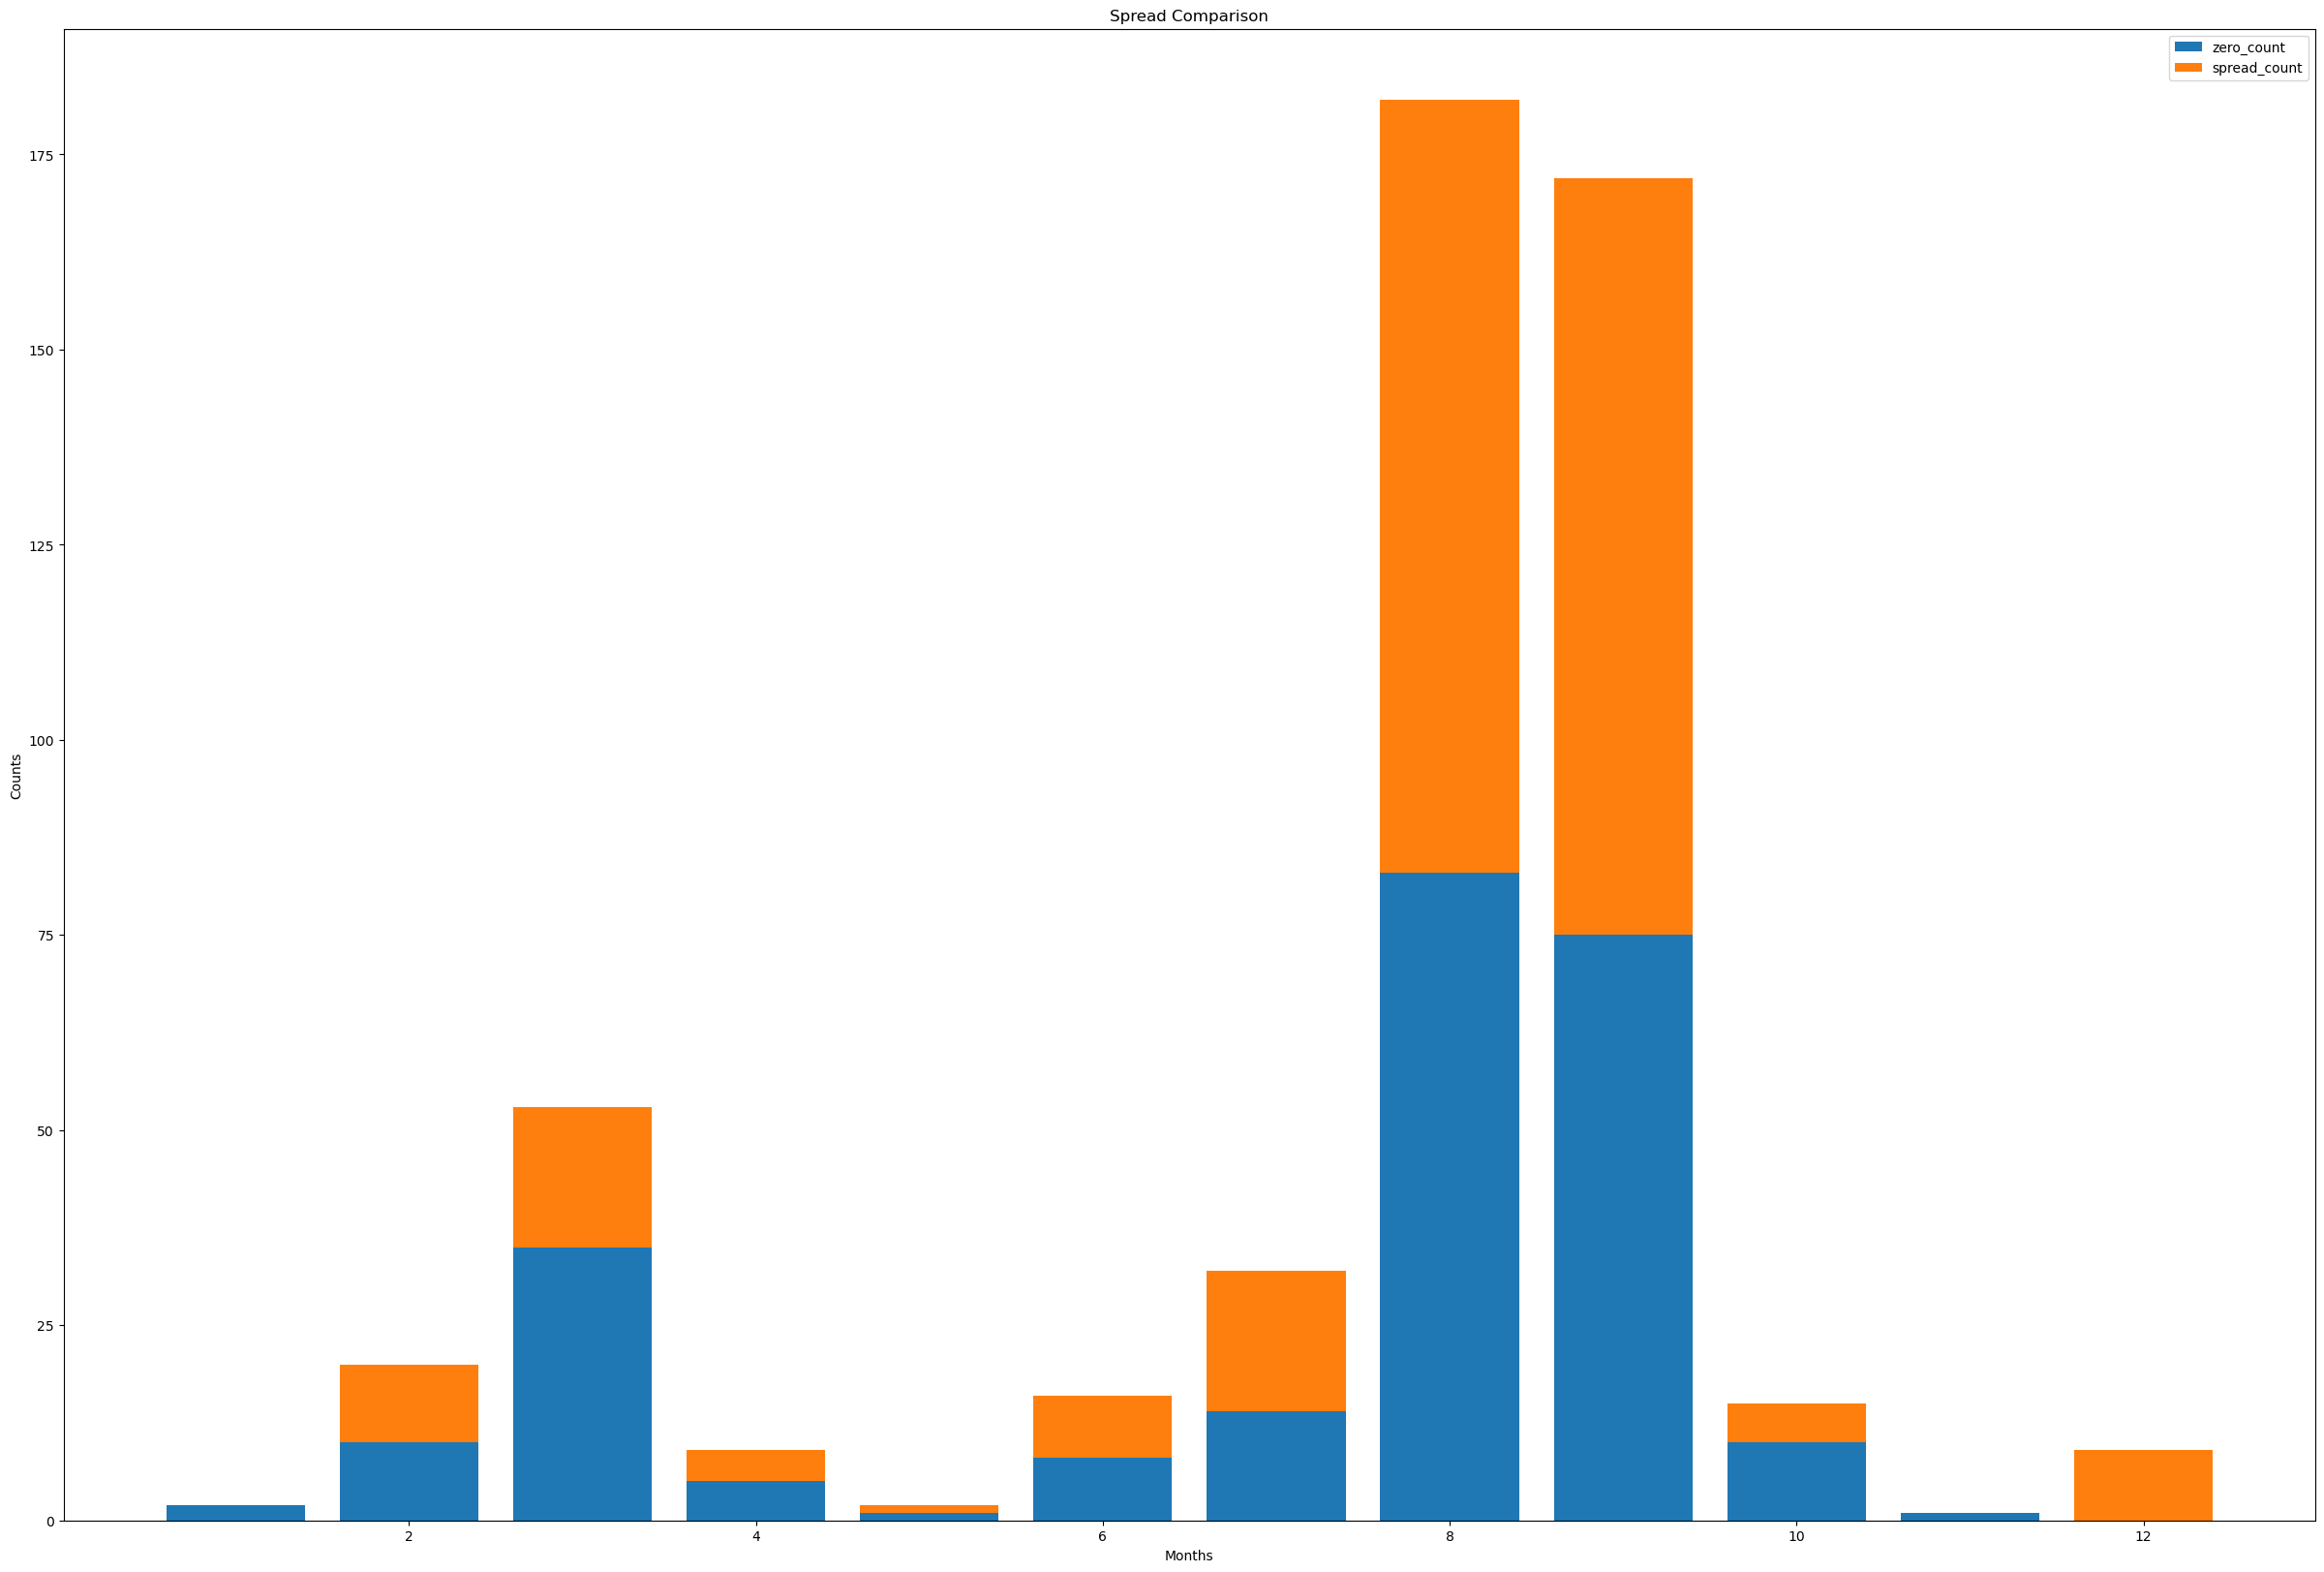

In [98]:


# Define categories and data
categories = spread_count_comparison['month_num']
zero_count = spread_count_comparison['zero_count']
spread_count = spread_count_comparison['spread_count']

# Create the first set of bars
plt.bar(categories, zero_count, label='zero_count')

# Create the second set of bars, stacked on top of the first set
plt.bar(categories, spread_count, bottom=zero_count, label='spread_count')

# Add labels, a legend, and a title
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Spread Comparison')
plt.legend()

# Show the plot
plt.show()

<BarContainer object of 12 artists>

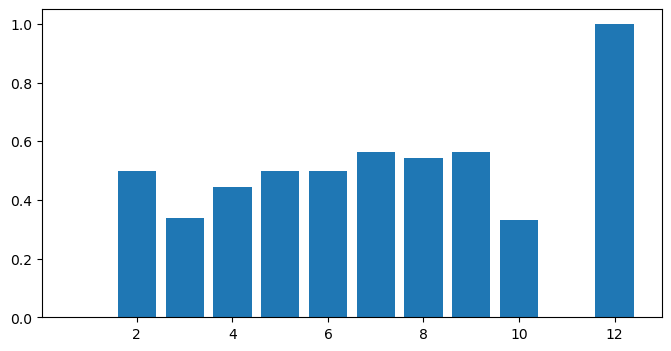

In [176]:
plt.bar(categories, spread_count_comparison['spread_ratio'], label='spread_ratio')

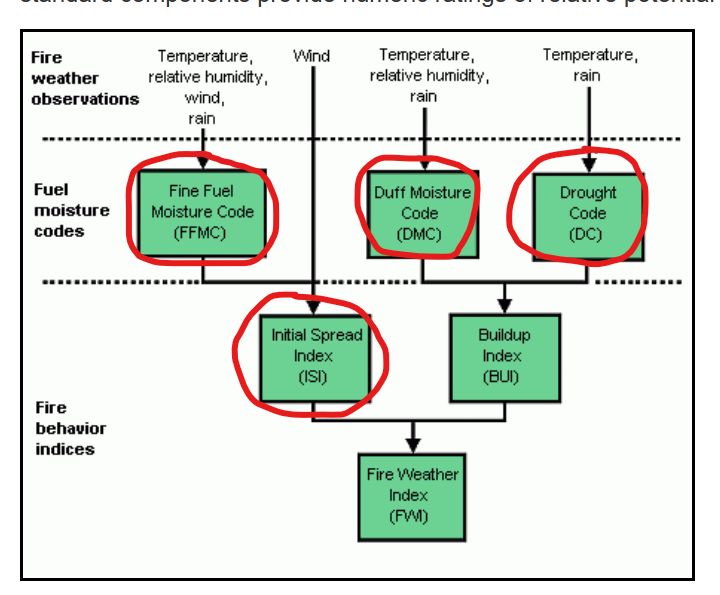


<Axes: xlabel='month_num'>

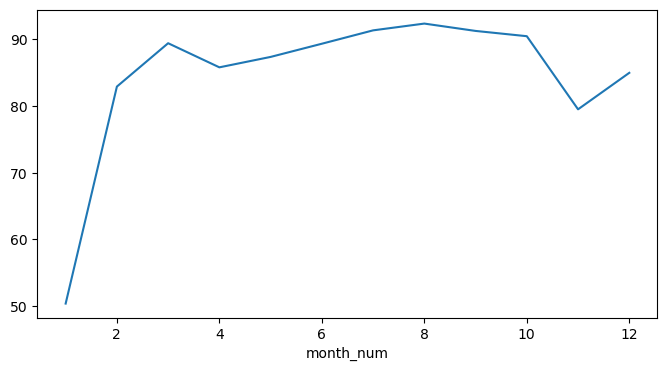

In [181]:
by_month['FFMC'].mean().plot()

High across the board, likely a precondition for any fire, or perhaps just the nature of the local climate

NameError: name 'plot' is not defined

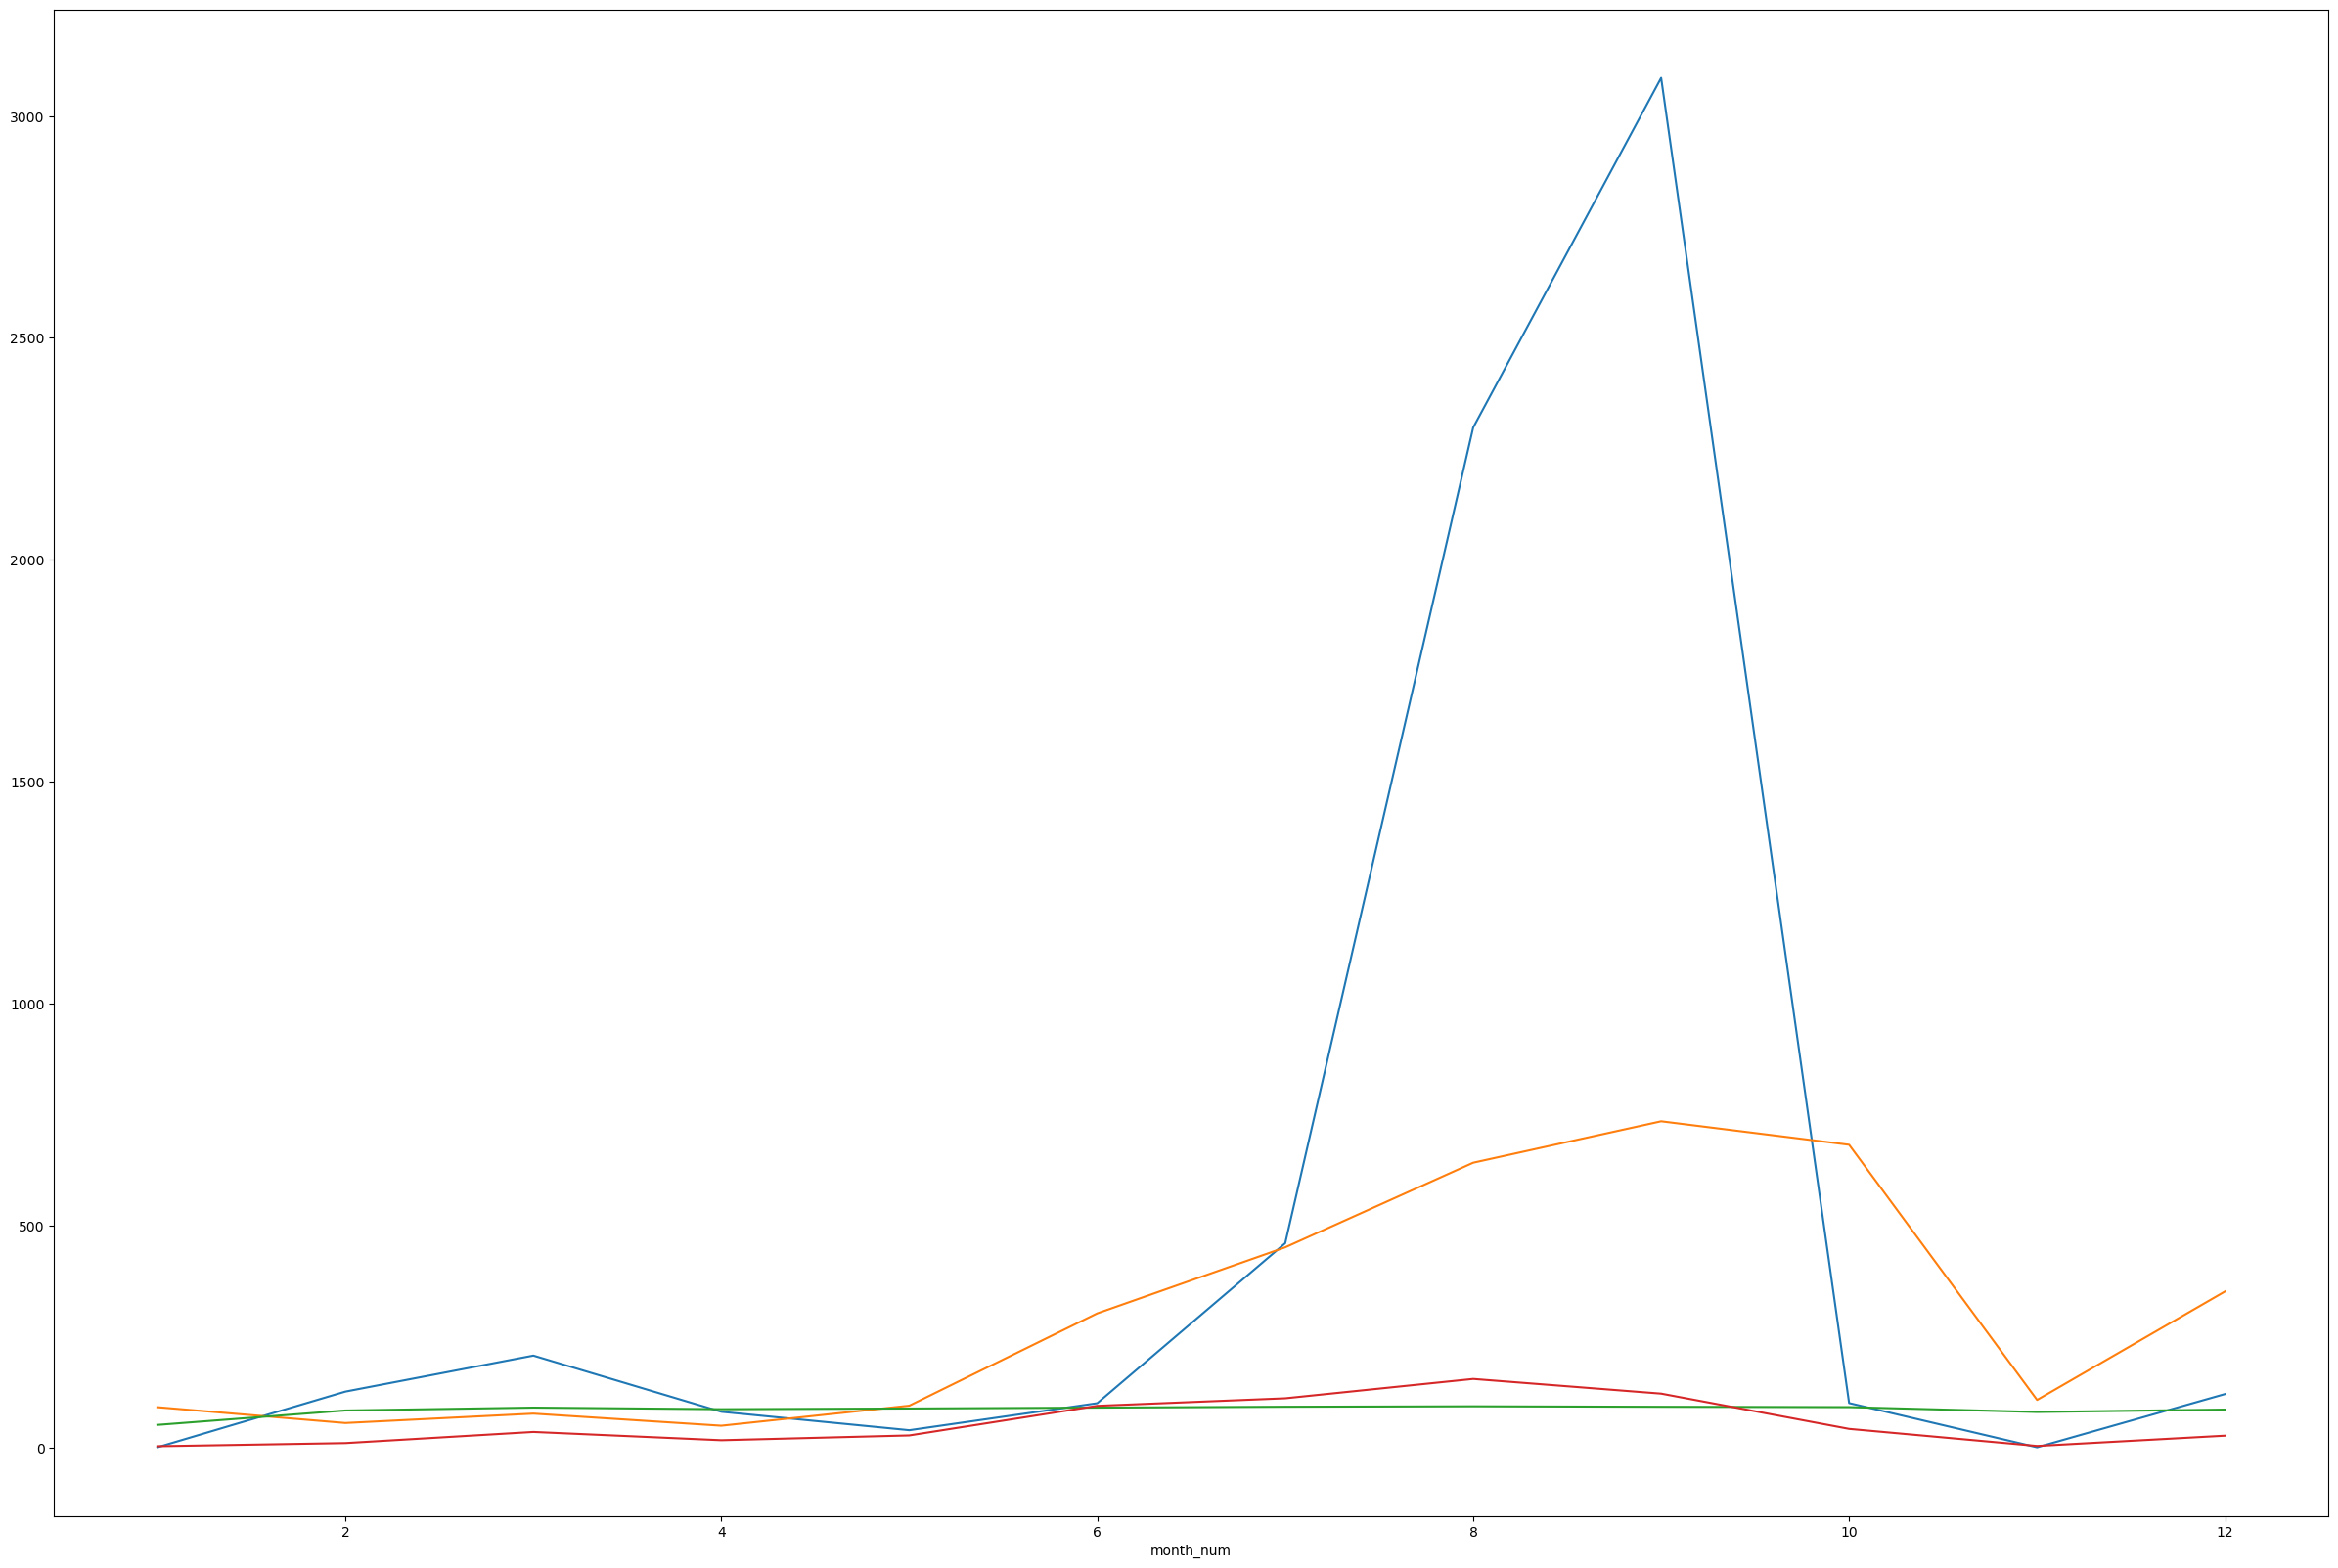

In [102]:
by_month['area'].sum().plot()
by_month['DC'].mean().plot()
by_month['FFMC'].mean().plot()
by_month['DMC'].mean().plot()
plot.show()

In [99]:
by_month['DC'].mean().plot()
# fires have much different DC properties by season, interesting large spike in DEC, perhaps an unusually dry DEC

NameError: name 'by_month' is not defined

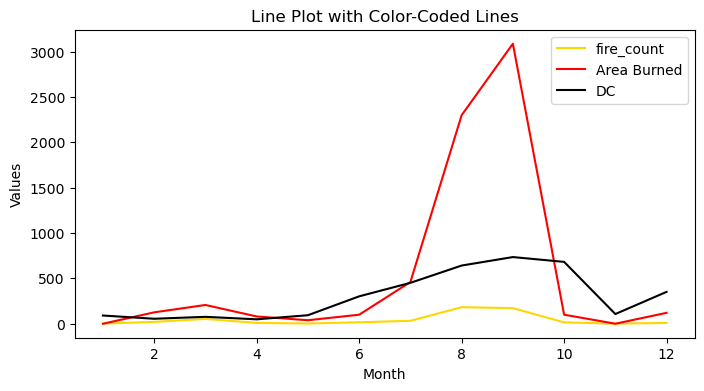

In [204]:
by_month['area'].count().plot(label='fire_count', color='gold')
by_month['area'].sum().plot(label='Area Burned', color='red')
by_month['DC'].mean().plot(label='DC', color='black')

# Add labels and a legend
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Line Plot with Color-Coded Lines')
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='month_num'>

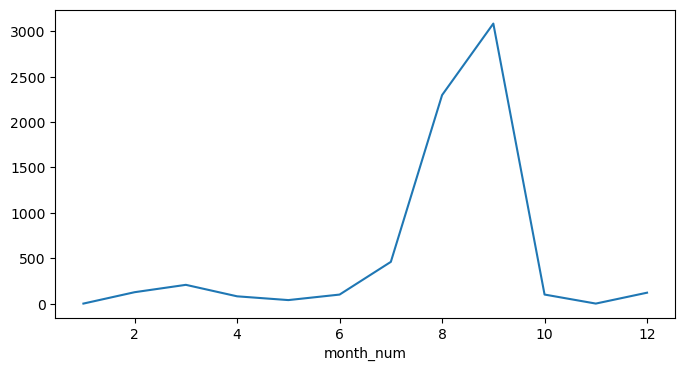

In [215]:


by_month['area'].sum().plot()


<Axes: xlabel='month_num'>

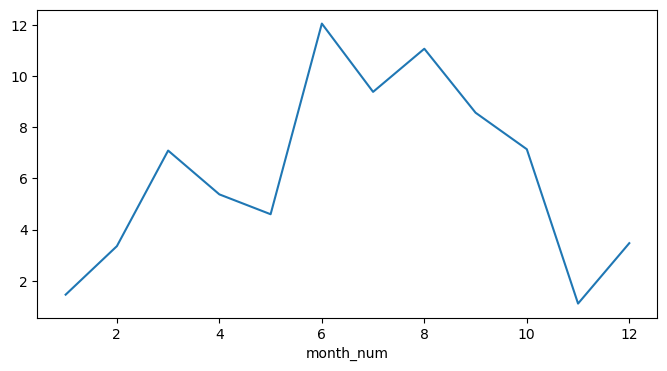

In [216]:
by_month['ISI'].mean().plot()

Drought Code
The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

<Axes: xlabel='month_num'>

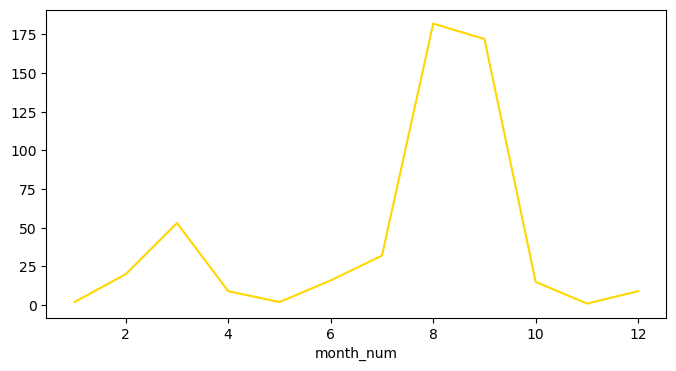

In [221]:
by_month['area'].count().plot(label='fire_count', color='gold')


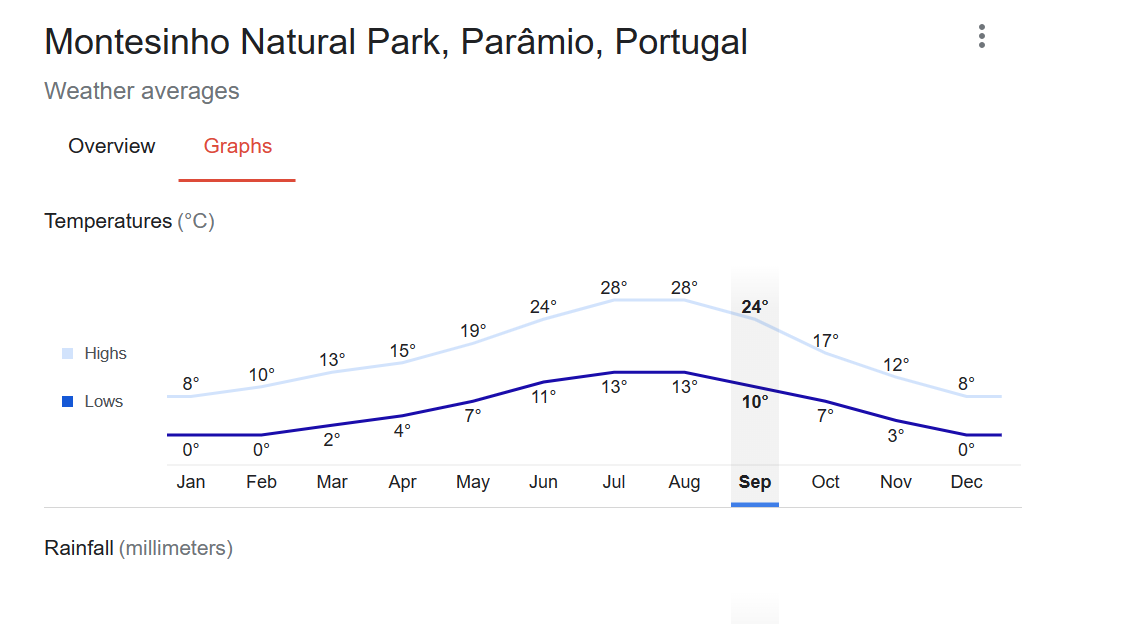
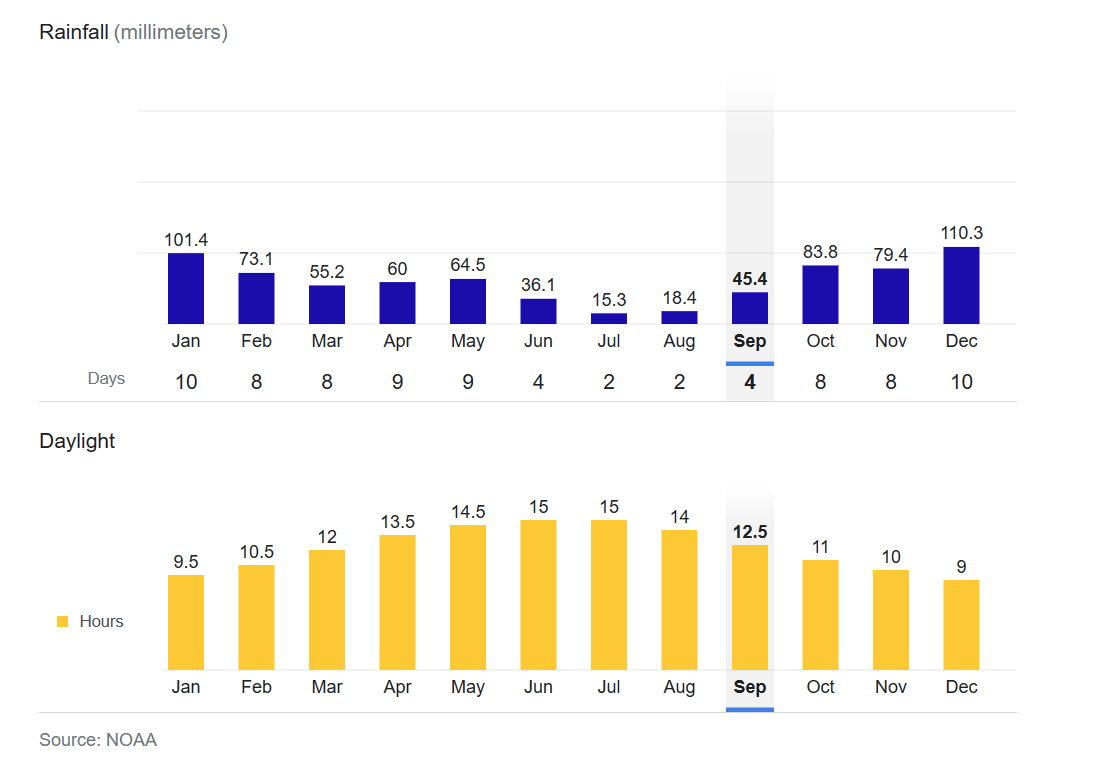

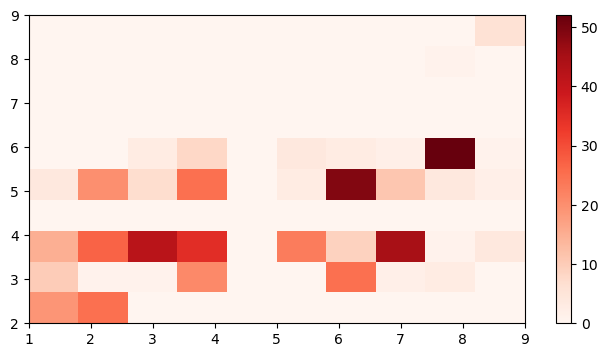

In [220]:
plt.hist2d(numerical_clean_data.X, numerical_clean_data.Y, cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

<Axes: >

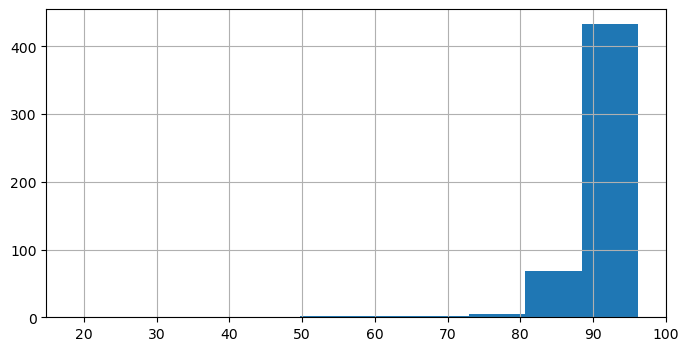

In [224]:
numerical_clean_data['FFMC'].hist()

In [226]:
numerical_clean_data['FFMC'].min()

18.7

In [105]:
bins = [0,10, 20, 30, 40, 50, 60,70,80,90,100]

numerical_clean_data['FFMC_bins'] = pd.cut(numerical_clean_data['FFMC'], bins=bins)

In [228]:
numerical_clean_data

X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  month_num  \
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00          3   
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00         10   
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00         10   
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00          3   
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00          3   
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...        ...   
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44          8   
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29          8   
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16          8   
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00          8   
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00         11   

     day_num  FFMC_bins  
0          4   (80, 90]  
1          1  (90, 100]  
2          5  (90, 100]  
3          4  (90, 100]  
4          6   (80, 90]  
..       ...        ...  
512        6   (80, 90]  
513        6   (80, 90]  
514        6   (80, 90]  
515        5  (90, 100]  
516        1   (70, 80]  

[513 rows x 14 columns]

In [107]:
groupedby_FFMCbins = numerical_clean_data.groupby('FFMC_bins').agg({'FFMC': ['count', 'mean'],'area':['sum', 'mean']})

groupedby_FFMCbins

FFMC                area           
          count       mean      sum       mean
FFMC_bins                                     
(0, 10]       0        NaN     0.00        NaN
(10, 20]      1  18.700000     0.00   0.000000
(20, 30]      0        NaN     0.00        NaN
(30, 40]      0        NaN     0.00        NaN
(40, 50]      0        NaN     0.00        NaN
(50, 60]      2  51.900000     0.00   0.000000
(60, 70]      4  66.050000    11.32   2.830000
(70, 80]      5  77.740000    14.37   2.874000
(80, 90]     96  86.598958   934.76   9.737083
(90, 100]   405  92.365679  5652.94  13.957877

In [108]:
groupedby_FFMCbins=groupedby_FFMCbins.dropna()


In [109]:
groupedby_FFMCbins

FFMC                area           
          count       mean      sum       mean
FFMC_bins                                     
(10, 20]      1  18.700000     0.00   0.000000
(50, 60]      2  51.900000     0.00   0.000000
(60, 70]      4  66.050000    11.32   2.830000
(70, 80]      5  77.740000    14.37   2.874000
(80, 90]     96  86.598958   934.76   9.737083
(90, 100]   405  92.365679  5652.94  13.957877

#dropping the first row as there I should only add FFMC values between the min of 18 and the max otherwise I would be assuming that conditions existed that may never have, even if there were no fires

In [111]:
groupedby_FFMCbins.reset_index(inplace=True)

In [112]:
groupedby_FFMCbins

FFMC_bins  FFMC                area           
             count       mean      sum       mean
0   (10, 20]     1  18.700000     0.00   0.000000
1   (50, 60]     2  51.900000     0.00   0.000000
2   (60, 70]     4  66.050000    11.32   2.830000
3   (70, 80]     5  77.740000    14.37   2.874000
4   (80, 90]    96  86.598958   934.76   9.737083
5  (90, 100]   405  92.365679  5652.94  13.957877

In [113]:
groupedby_FFMCbins.corr()['area_sum']

C:\Users\user\AppData\Local\Temp\ipykernel_30780\1152540208.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  groupedby_FFMCbins.corr()['area_sum']


KeyError: 'area_sum'

In [261]:
groupedby_FFMCbins.columns.get_level_values(0)

Index(['FFMC_bins', 'FFMC', 'FFMC', 'area'], dtype='object')

In [262]:
groupedby_FFMCbins.columns.get_level_values(1)

Index(['', 'count', 'mean', 'sum'], dtype='object')

In [114]:
groupedby_FFMCbins.columns=groupedby_FFMCbins.columns.map('_'.join)

In [115]:
groupedby_FFMCbins

FFMC_bins_  FFMC_count  FFMC_mean  area_sum  area_mean
0   (10, 20]           1  18.700000      0.00   0.000000
1   (50, 60]           2  51.900000      0.00   0.000000
2   (60, 70]           4  66.050000     11.32   2.830000
3   (70, 80]           5  77.740000     14.37   2.874000
4   (80, 90]          96  86.598958    934.76   9.737083
5  (90, 100]         405  92.365679   5652.94  13.957877

In [116]:
groupedby_FFMCbins.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_30780\2549836544.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  groupedby_FFMCbins.corr()


FFMC_count  FFMC_mean  area_sum  area_mean
FFMC_count    1.000000    0.58852  0.997649   0.895759
FFMC_mean     0.588520    1.00000  0.558100   0.796110
area_sum      0.997649    0.55810  1.000000   0.865920
area_mean     0.895759    0.79611  0.865920   1.000000

In [117]:
#binning the FFMC resulted in ahigh correlation to the average area 0.865920

In [275]:
groupedby_FFMCbins['FFMC_mean'][groupedby_FFMCbins['FFMC_mean']==0]=groupedby_FFMCbins['FFMC_bins_'][groupedby_FFMCbins['FFMC_mean']==0]

1    0.0
2    0.0
3    0.0
Name: FFMC_mean, dtype: float64

In [300]:
groupedby_FFMCbins

FFMC_bins_  FFMC_count  FFMC_mean  area_sum
0   (10, 20]           1  18.700000      0.00
1   (20, 30]           0   0.000000      0.00
2   (30, 40]           0   0.000000      0.00
3   (40, 50]           0   0.000000      0.00
4   (50, 60]           2  51.900000      0.00
5   (60, 70]           4  66.050000     11.32
6   (70, 80]           5  77.740000     14.37
7   (80, 90]          96  86.598958    934.76
8  (90, 100]         405  92.365679   5652.94

In [305]:
groupedby_FFMCbins.at[1, 'FFMC_mean']=25
groupedby_FFMCbins.at[2, 'FFMC_mean']=35
groupedby_FFMCbins.at[3, 'FFMC_mean']=45


In [306]:
groupedby_FFMCbins

FFMC_bins_  FFMC_count  FFMC_mean  area_sum
0   (10, 20]           1  18.700000      0.00
1   (20, 30]           0  25.000000      0.00
2   (30, 40]           0  35.000000      0.00
3   (40, 50]           0  45.000000      0.00
4   (50, 60]           2  51.900000      0.00
5   (60, 70]           4  66.050000     11.32
6   (70, 80]           5  77.740000     14.37
7   (80, 90]          96  86.598958    934.76
8  (90, 100]         405  92.365679   5652.94

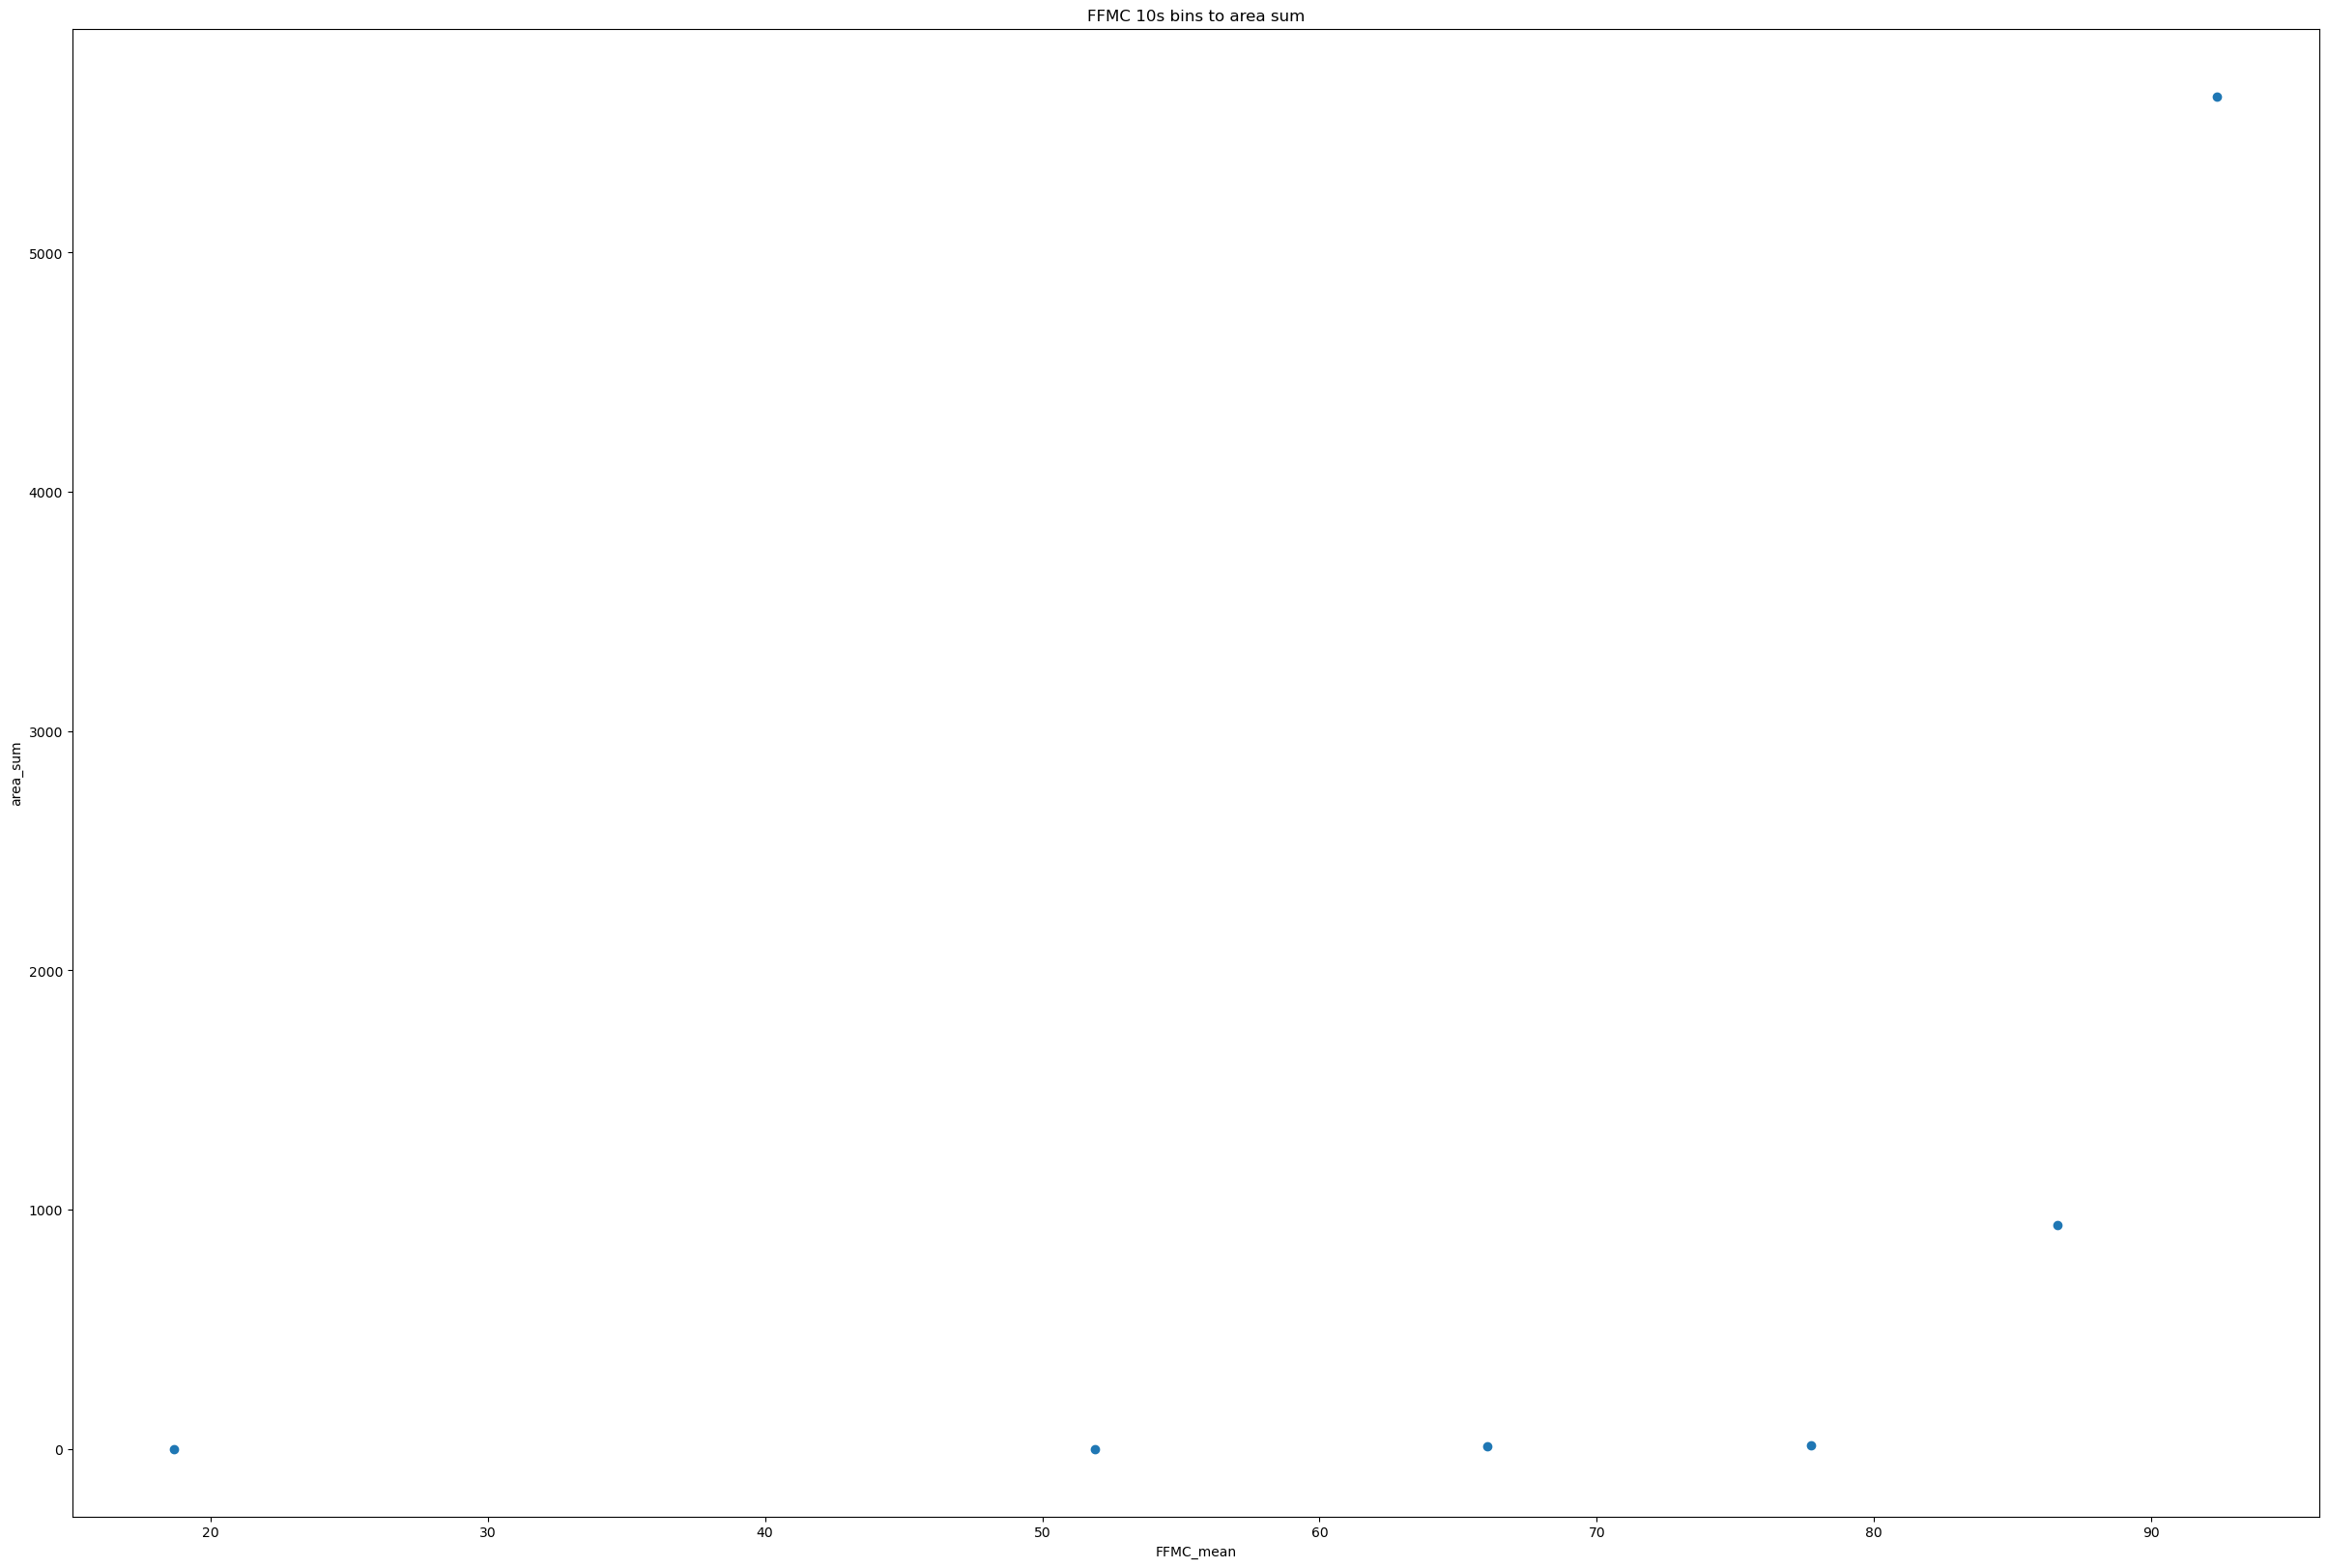

In [118]:
# Add labels and title
plt.scatter(groupedby_FFMCbins['FFMC_mean'],groupedby_FFMCbins['area_sum'])
plt.xlabel('FFMC_mean')
plt.ylabel('area_sum')
plt.title('FFMC 10s bins to area sum')

# Show the plot
plt.show()

In [308]:
groupedby_FFMCbins

FFMC_bins_  FFMC_count  FFMC_mean  area_sum
0   (10, 20]           1  18.700000      0.00
1   (20, 30]           0  25.000000      0.00
2   (30, 40]           0  35.000000      0.00
3   (40, 50]           0  45.000000      0.00
4   (50, 60]           2  51.900000      0.00
5   (60, 70]           4  66.050000     11.32
6   (70, 80]           5  77.740000     14.37
7   (80, 90]          96  86.598958    934.76
8  (90, 100]         405  92.365679   5652.94

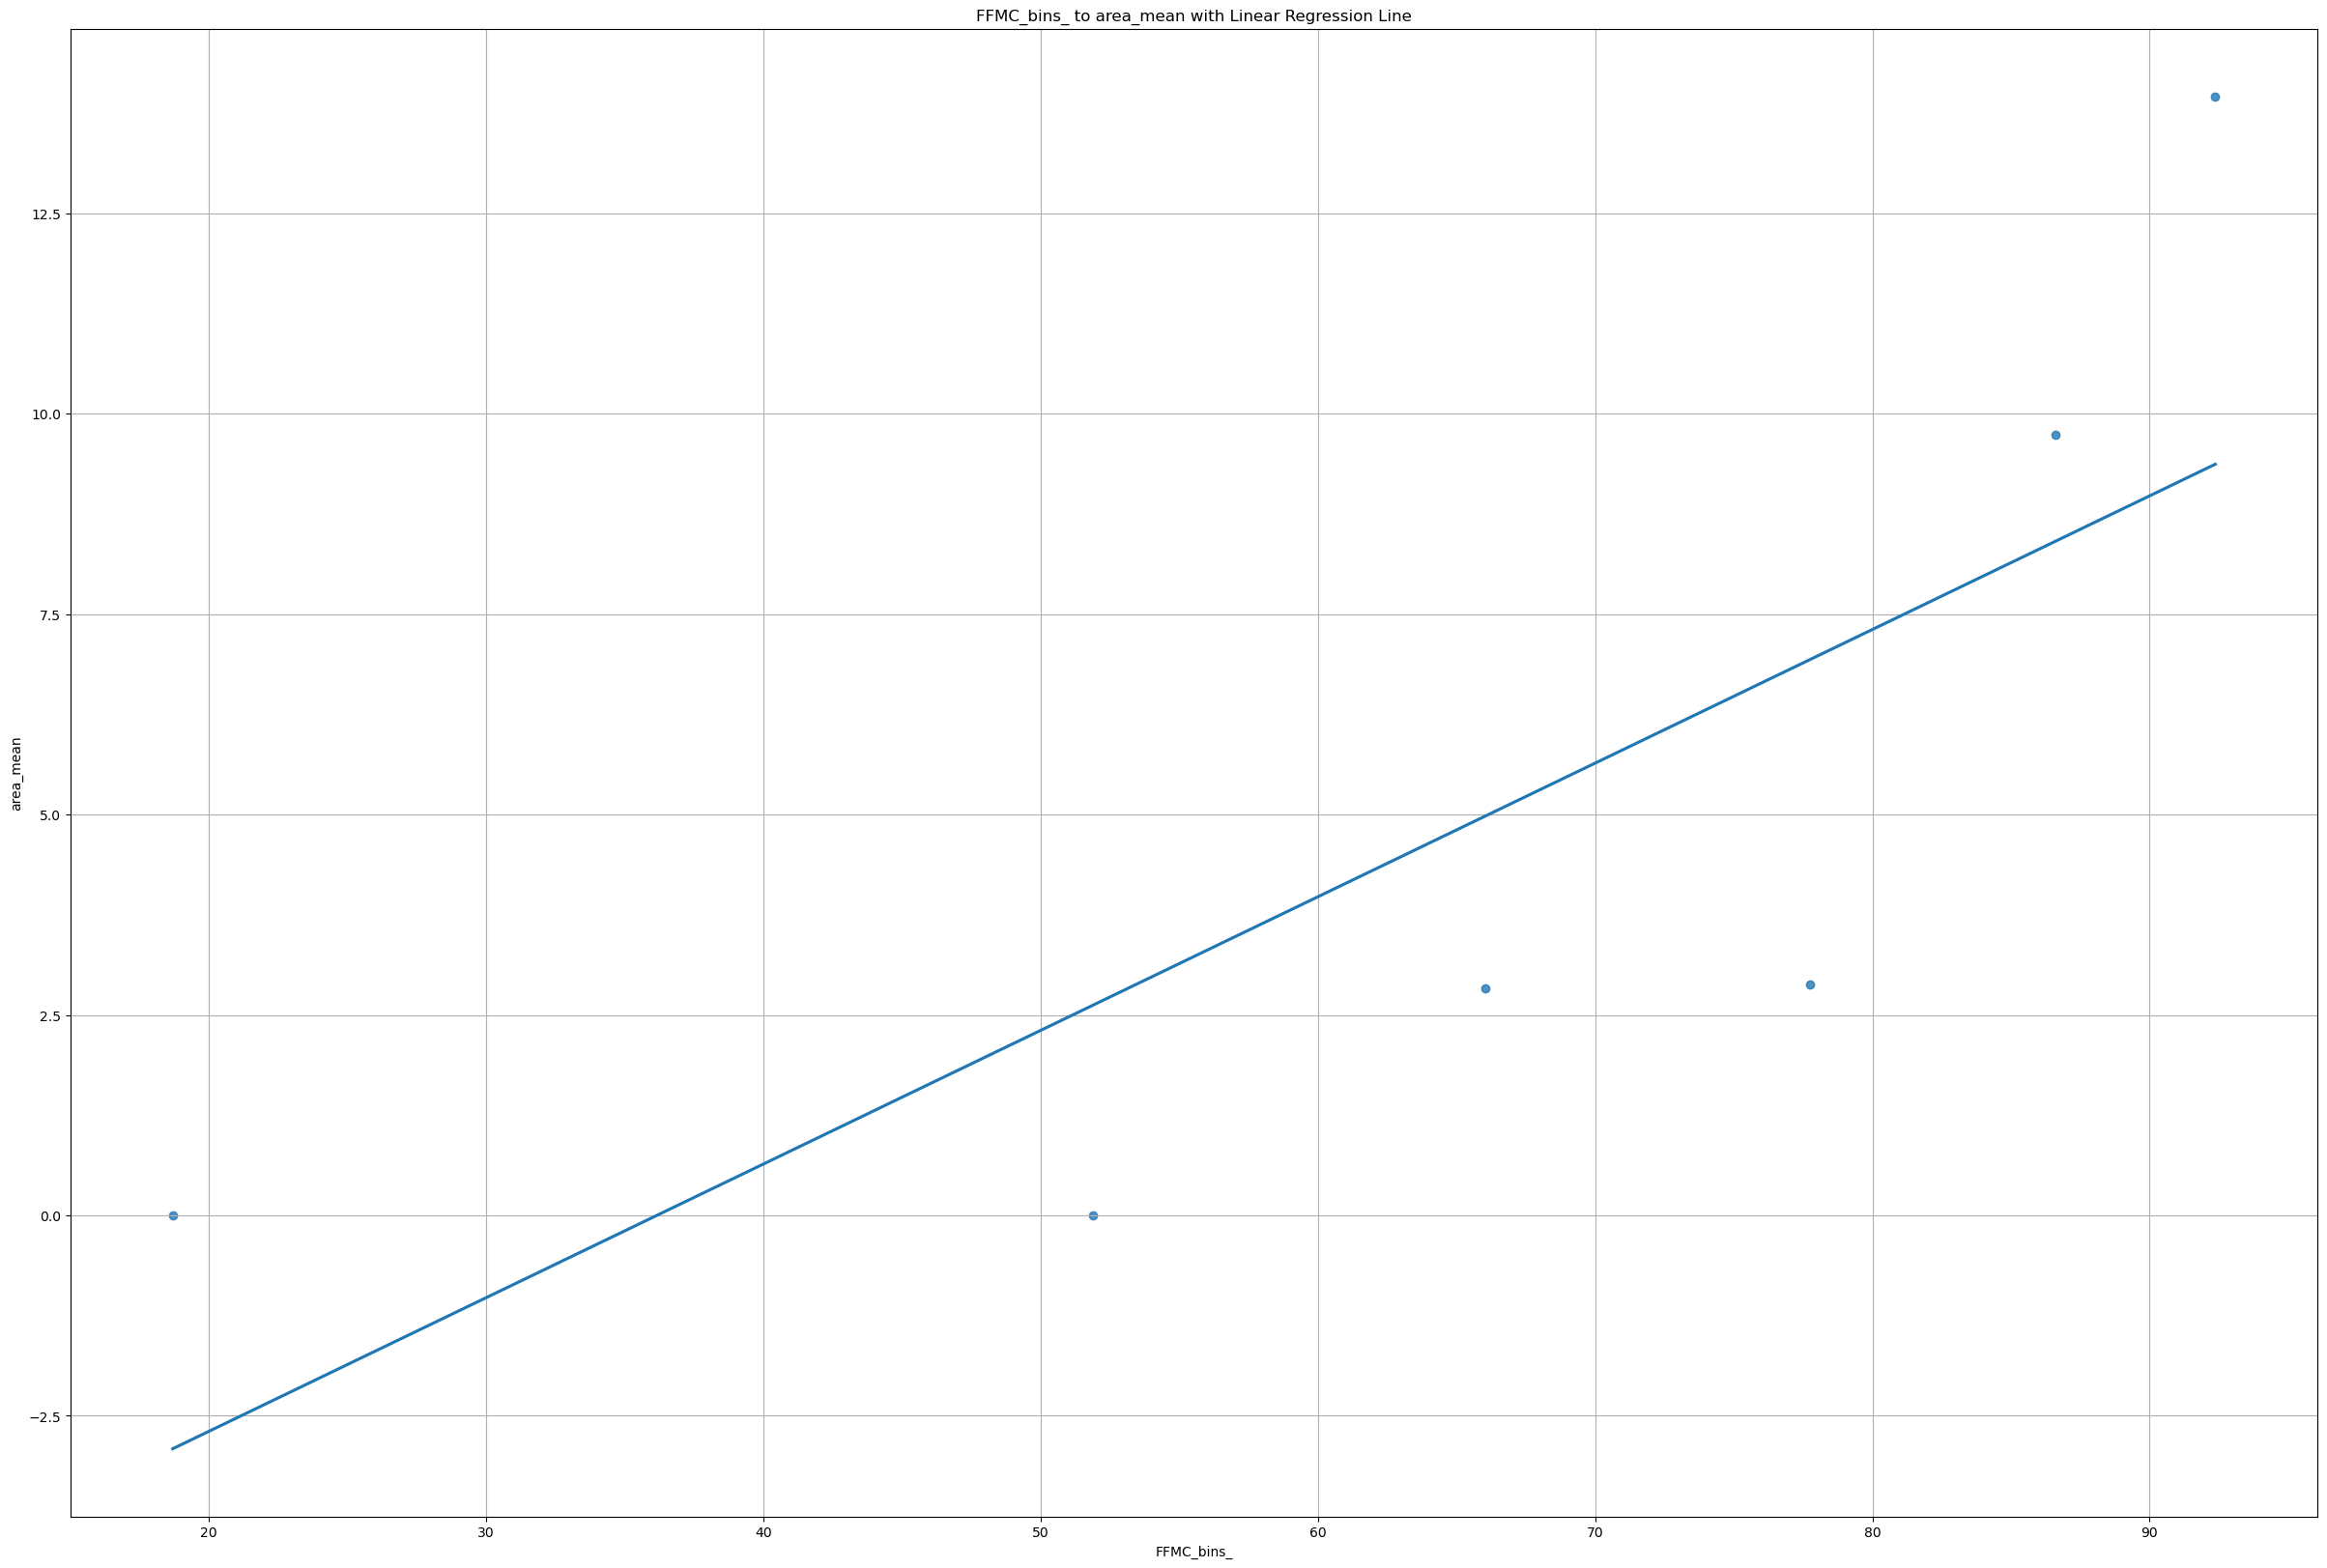

In [123]:
sns.regplot(x=groupedby_FFMCbins['FFMC_mean'], y=groupedby_FFMCbins['area_mean'], ci=None)

# Add labels and a title
plt.xlabel('FFMC_bins_')
plt.ylabel('area_mean')
plt.title('FFMC_bins_ to area_mean with Linear Regression Line')

# Show the plot
plt.grid(True)
plt.show()


In [124]:
groupedby_FFMCbins.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_30780\2549836544.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  groupedby_FFMCbins.corr()


FFMC_count  FFMC_mean  area_sum  area_mean
FFMC_count    1.000000    0.58852  0.997649   0.895759
FFMC_mean     0.588520    1.00000  0.558100   0.796110
area_sum      0.997649    0.55810  1.000000   0.865920
area_mean     0.895759    0.79611  0.865920   1.000000

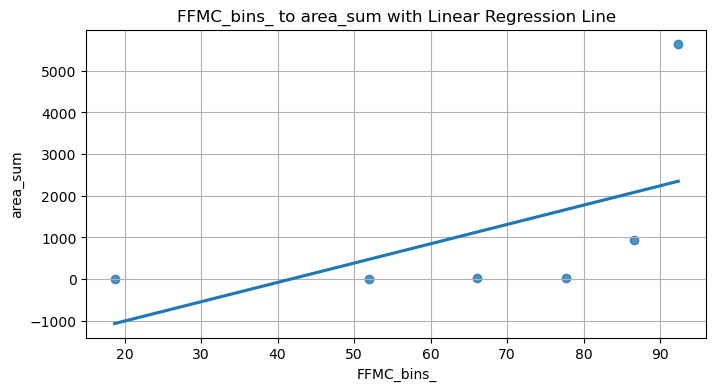

In [329]:
sns.regplot(x=groupedby_FFMCbins['FFMC_mean'], y=groupedby_FFMCbins['area_sum'], ci=None)

# Add labels and a title
plt.xlabel('FFMC_bins_')
plt.ylabel('area_sum')
plt.title('FFMC_bins_ to area_sum with Linear Regression Line')

# Show the plot
plt.grid(True)
plt.show()

In [326]:
groupedby_FFMCbins.corr()['area_mean']

C:\Users\user\AppData\Local\Temp\ipykernel_15096\2767353648.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  groupedby_FFMCbins.corr()['area_mean']


FFMC_count    0.895759
FFMC_mean     0.796110
area_sum      0.865920
area_mean     1.000000
Name: area_mean, dtype: float64

Groupby ISI bins

Trying to see if ISI predicts area

<Axes: >

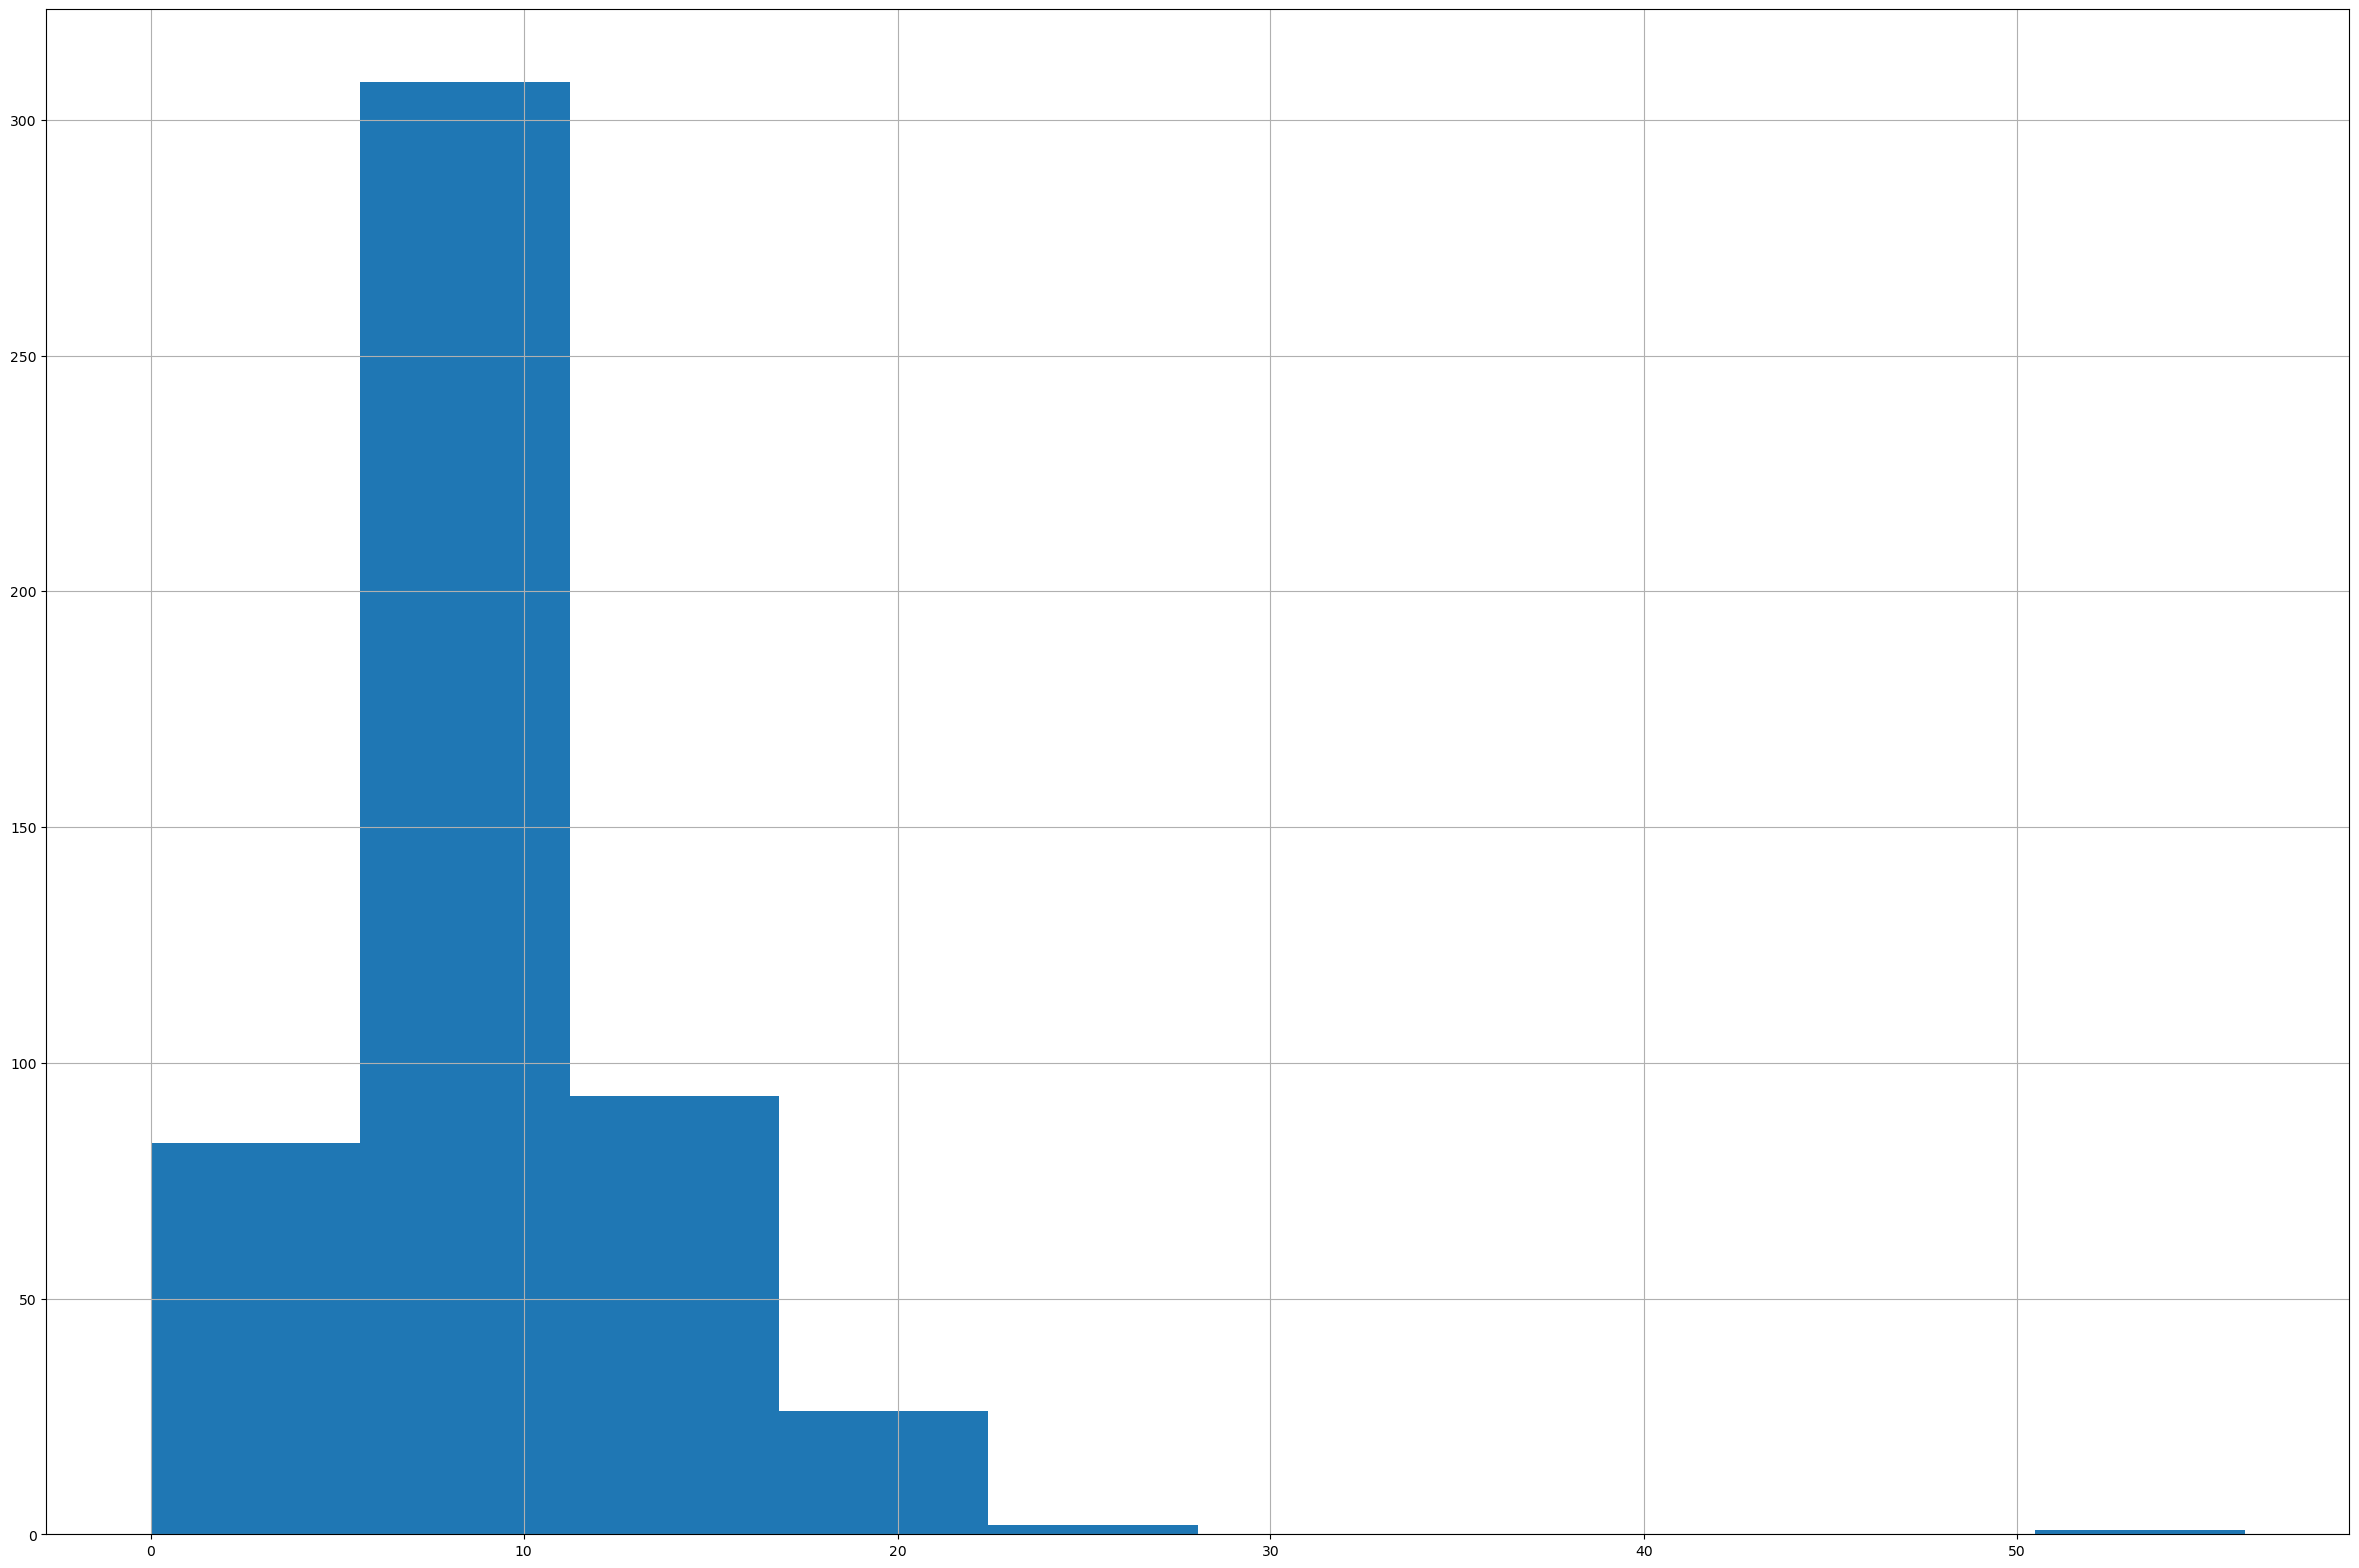

In [125]:
clean_data['ISI'].hist()

In [335]:
numerical_clean_data['ISI'].describe()

count    513.000000
mean       9.023587
std        4.575543
min        0.000000
25%        6.400000
50%        8.400000
75%       11.000000
max       56.100000
Name: ISI, dtype: float64

Ignoring the 50 number ISI appears to be normally distributed 

In [336]:


numerical_clean_data['ISI_bins']=pd.qcut(numerical_clean_data['ISI'],q=5)

In [338]:
numerical_clean_data['ISI_bins'].unique()

[(-0.001, 6.2], (6.2, 7.5], (7.5, 9.04], (9.04, 12.2], (12.2, 56.1]]
Categories (5, interval[float64, right]): [(-0.001, 6.2] < (6.2, 7.5] < (7.5, 9.04] < (9.04, 12.2] < (12.2, 56.1]]

In [339]:
groupedby_ISIbins = numerical_clean_data.groupby('ISI_bins').agg({'ISI': ['count', 'mean'],'area':['sum', 'mean']})

In [340]:
groupedby_ISIbins

ISI                area           
              count       mean      sum       mean
ISI_bins                                          
(-0.001, 6.2]   106   3.933019   731.28   6.898868
(6.2, 7.5]      100   6.910000  1193.64  11.936400
(7.5, 9.04]     102   8.350000  2401.75  23.546569
(9.04, 12.2]    103  10.292233   975.29   9.468835
(12.2, 56.1]    102  15.778431  1311.43  12.857157

<Axes: xlabel='ISI_bins'>

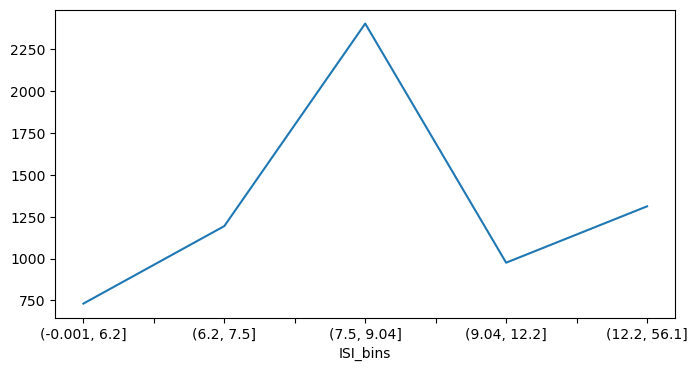

In [345]:
groupedby_ISIbins[('area', 'sum')].plot()

In [ ]:
redoing FFMC bins to match the

# Creating minimal, moderate, large fire spread

<Axes: >

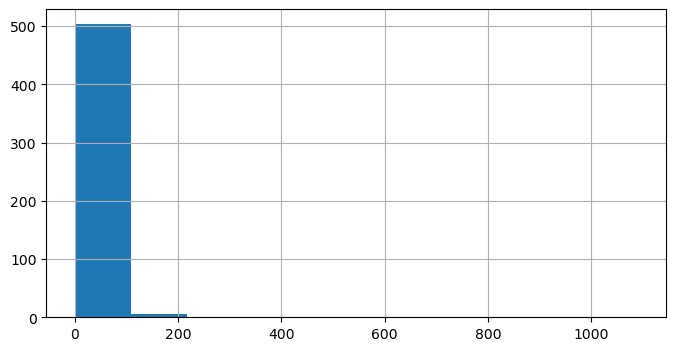

In [347]:
numerical_clean_data['area'].hist()

In [126]:
#numerical_clean_data['fire_spread']=pd.qcut(numerical_clean_data['area'],q=3)

#Trying to use qcut to have equallly sized bins, raised a duplicate edges error. Manually approximating the automatic bins
#ValueError: Bin edges must be unique: array([   0.  ,    0.  ,    3.4 , 1090.84]).

In [352]:
numerical_clean_data['fire_spread'].unique()

[(-0.001, 0.54], (0.54, 1090.84]]
Categories (2, interval[float64, right]): [(-0.001, 0.54] < (0.54, 1090.84]]

In [357]:
numerical_clean_data['area'][numerical_clean_data['area'] > 0.000000000].min()

0.09

In [154]:
bin_edges = [-0.01,0, 6,1100]
labels = ['minimal (0)', 'moderate (0.09to6)', 'large (6to_1100)']  # Define the labels for categories

# Create a new column with the categories
numerical_clean_data['fire_spread']=pd.cut(numerical_clean_data['area'], bins=bin_edges,labels=labels)


In [129]:
numerical_clean_data['fire_spread'].unique()

['minimal (0)', 'moderate (0.09to6)', 'large (6to_1100)']
Categories (3, object): ['minimal (0)' < 'moderate (0.09to6)' < 'large (6to_1100)']

In [130]:
numerical_clean_data['fire_spread'].value_counts()

minimal (0)           244
large (6to_1100)      138
moderate (0.09to6)    131
Name: fire_spread, dtype: int64

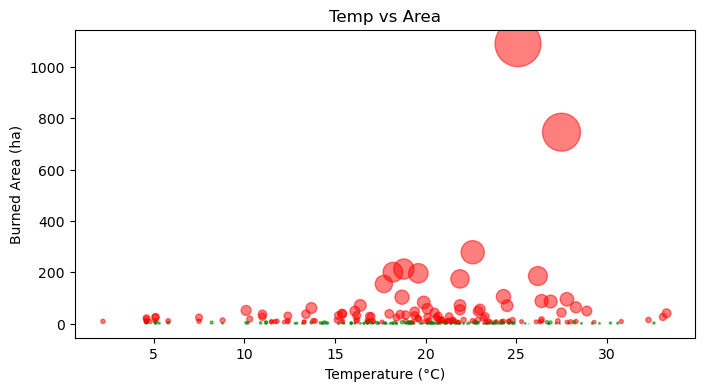

In [463]:
colors = {'large (6to_1100)': 'red', 'minimal (0)': 'blue', 'moderate (0.09to6)': 'green'}
x=numerical_clean_data['temp']
y=numerical_clean_data['area']
spread_bins=numerical_clean_data['fire_spread']
scatter = plt.scatter(x, y, label='map', c=spread_bins.map(colors), alpha=0.5, marker='o', s=area)
# Add axis labels
plt.xlabel('Temperature (°C)')
plt.ylabel('Burned Area (ha)')

# Add a colorbar for reference

# Add a title
plt.title('Temp vs Area')

# Display the plot
plt.show()

Text(0.5, 0.98, 'Area (ha) by month')

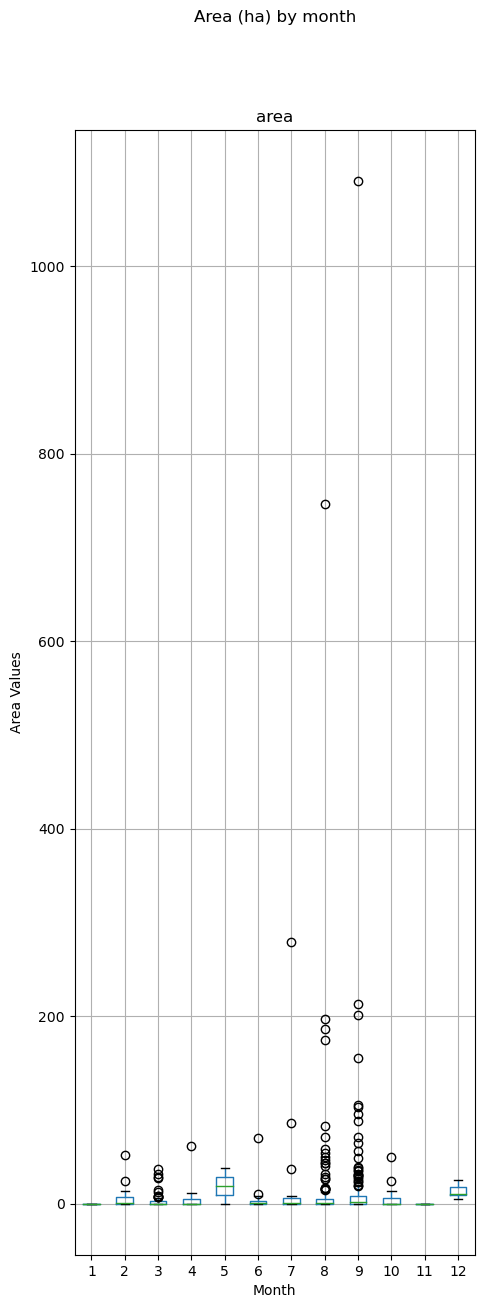

In [466]:
boxplot=numerical_clean_data.boxplot(column='area',by='month_num', figsize=(5, 15))

plt.xlabel('Month')
plt.ylabel('Area Values')
plt.suptitle('Area (ha) by month')

In [468]:
#we have a "levitating" box plot in month 5 and 12, what were the indexes
numerical_clean_data[numerical_clean_data['month_num']==5]

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain   area  month_num  \
304  6  5  85.1  28.0  113.8  3.5  11.3  94   4.9   0.0   0.00          5   
471  4  3  89.6  25.4   73.7  5.7  18.0  40   4.0   0.0  38.48          5   

     day_num FFMC_bins       ISI_bins       fire_spread  
304        5  (80, 90]  (-0.001, 6.2]       minimal (0)  
471        4  (80, 90]  (-0.001, 6.2]  large (6to_1100)

In [470]:
numerical_clean_data[numerical_clean_data['month_num']==12]

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain   area  month_num  \
273  4  6  84.4  27.2  353.5  6.8   4.8  57   8.5   0.0   8.98         12   
274  8  6  84.0  27.8  354.6  5.3   5.1  61   8.0   0.0  11.19         12   
275  4  6  84.6  26.4  352.0  2.0   5.1  61   4.9   0.0   5.38         12   
276  4  4  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0  17.85         12   
277  3  4  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0  10.73         12   
278  4  4  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0  22.03         12   
279  4  4  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0   9.77         12   
280  4  6  84.7  26.7  352.6  4.1   2.2  59   4.9   0.0   9.27         12   
281  6  5  85.4  25.4  349.7  2.6   5.1  24   8.5   0.0  24.77         12   

     day_num FFMC_bins       ISI_bins         fire_spread  
273        6  (80, 90]     (6.2, 7.5]    large (6to_1100)  
274        2  (80, 90]  (-0.001, 6.2]    large (6to_1100)  
275        3  (80, 90]  (-0.001, 6.2]  moderate (0.09to6)  
276        0  (80, 90]  (-0.001, 6.2]    large (6to_1100)  
277        0  (80, 90]  (-0.001, 6.2]    large (6to_1100)  
278        0  (80, 90]  (-0.001, 6.2]    large (6to_1100)  
279        0  (80, 90]  (-0.001, 6.2]    large (6to_1100)  
280        4  (80, 90]  (-0.001, 6.2]    large (6to_1100)  
281        1  (80, 90]  (-0.001, 6.2]    large (6to_1100)

in month 12 very low temps but pretty large fires....
There appears to be one multiple fires on the same day (indexes are the same) perhaps due to christmas or NYE fireworks or other human activity?

Is this true for other big holidays like Easter or Carnival? in March/April? 

In [491]:

print(numerical_clean_data[numerical_clean_data['month_num'] == 3].nunique())
numerical_clean_data[numerical_clean_data['month_num'] == 3].shape

X               8
Y               5
FFMC           20
DMC            24
DC             24
ISI            23
temp           38
RH             31
wind           17
rain            2
area           19
month_num       1
day_num         7
FFMC_bins       3
ISI_bins        5
fire_spread     3
dtype: int64


(53, 16)

<Axes: >

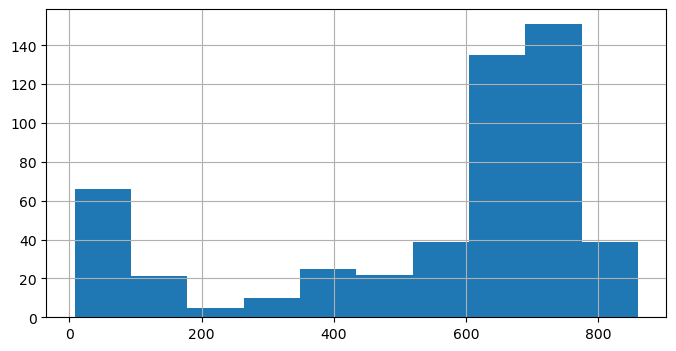

In [471]:
#DC is in the moderate range, but FFMC is above 80
numerical_clean_data['DC'].hist()

<Axes: >

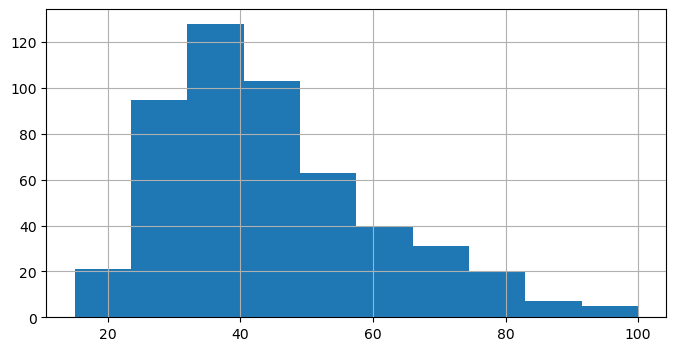

In [474]:
numerical_clean_data['RH'].hist()

What seems to predict a fire will be large?

Group by size cats

In [549]:
indexes_to_aggregate = ['FFMC', 'DMC', 'DC', 'ISI']

In [582]:
numerical_clean_data.groupby('fire_spread')[indexes_to_aggregate].agg(['mean','min', 'max','std','skew'])


FFMC                                         DMC  \
                         mean   min   max       std      skew        mean   
fire_spread                                                                 
minimal (0)         90.202869  18.7  96.2  7.007142 -6.273163  106.566393   
moderate (0.09to6)  91.234351  75.1  96.2  3.251953 -2.329338  114.890840   
large (6to_1100)    90.839130  63.5  96.1  4.110578 -2.781098  115.105797   

                                                             DC               \
                    min    max        std      skew        mean   min    max   
fire_spread                                                                    
minimal (0)         1.1  290.0  66.663841  0.592823  523.210246   7.9  855.3   
moderate (0.09to6)  3.2  291.3  54.641257  0.442044  586.769466  16.2  860.6   
large (6to_1100)    3.6  290.0  67.948994  0.566770  559.322464  15.3  855.3   

                                               ISI                       \
                           std      skew      mean  min   max       std   
fire_spread                                                               
minimal (0)         265.430772 -0.927620  8.848770  0.0  56.1  5.001962   
moderate (0.09to6)  216.100530 -1.491781  9.411450  1.9  22.7  4.099430   
large (6to_1100)    239.603775 -1.133002  8.964493  0.8  20.3  4.208885   

                              
                        skew  
fire_spread                   
minimal (0)         3.707382  
moderate (0.09to6)  0.780276  
large (6to_1100)    0.584370

In [556]:
numerical_clean_data.groupby('fire_spread')[indexes_to_aggregate].agg(['median','min', 'max','std','skew'])

FFMC                                     DMC              \
                   median   min   max       std      skew  median  min    max   
fire_spread                                                                     
minimal (0)          91.6  18.7  96.2  7.007142 -6.273163  102.75  1.1  290.0   
moderate (0.09to6)   91.8  75.1  96.2  3.251953 -2.329338  111.20  3.2  291.3   
large (6to_1100)     91.6  63.5  96.1  4.110578 -2.781098  118.45  3.6  290.0   

                                            DC                           \
                          std      skew median   min    max         std   
fire_spread                                                               
minimal (0)         66.663841  0.592823  661.3   7.9  855.3  265.430772   
moderate (0.09to6)  54.641257  0.442044  664.5  16.2  860.6  216.100530   
large (6to_1100)    67.948994  0.566770  665.6  15.3  855.3  239.603775   

                                ISI                                 
                        skew median  min   max       std      skew  
fire_spread                                                         
minimal (0)        -0.927620    8.4  0.0  56.1  5.001962  3.707382  
moderate (0.09to6) -1.491781    8.6  1.9  22.7  4.099430  0.780276  
large (6to_1100)   -1.133002    8.4  0.8  20.3  4.208885  0.584370

### FFMC
 - anything below 65 FFMC is a very low chance of spreading
 - 96 seems to be the "perfectly dry" rating for FFMC
 - the skew in FFMC goes down dramactically from minimal to mod
 - the average is nearly identical from min to large
 - no index seems to guarantee spread, ie the maximum FFMC is the same for all spread types
### DMC 
- huge range in DMC values that do not change across bins
- mean steps up notiably from 107 to 115 from mininmal to moderate
- median steps up at each bin level
- even skew across bins
- similar max across bins
### DC
-  max does not change across bins: 855-860 across bins
- skew is negative and similar across bins
- minor increase in mean going up bins
- negligible increase in median across bins
### ISI
- minimal variance in mean, median across bins

In [150]:
bin_edges = [-0.01,0, 6,1100] #sizes of fires binned so as to be as evenly distibuted as possible
labels = ['minimal (0)', 'moderate (0.09to6)', 'large (6to_1100)']  # Define the labels for categories

# Create a new column with the categories
numerical_clean_data['fire_spread']=pd.cut(clean_data['area'], bins=bin_edges,labels=labels)

minimal (0)                Axes(0.1,0.559091;0.363636x0.340909)
moderate (0.09to6)    Axes(0.536364,0.559091;0.363636x0.340909)
large (6to_1100)               Axes(0.1,0.15;0.363636x0.340909)
dtype: object

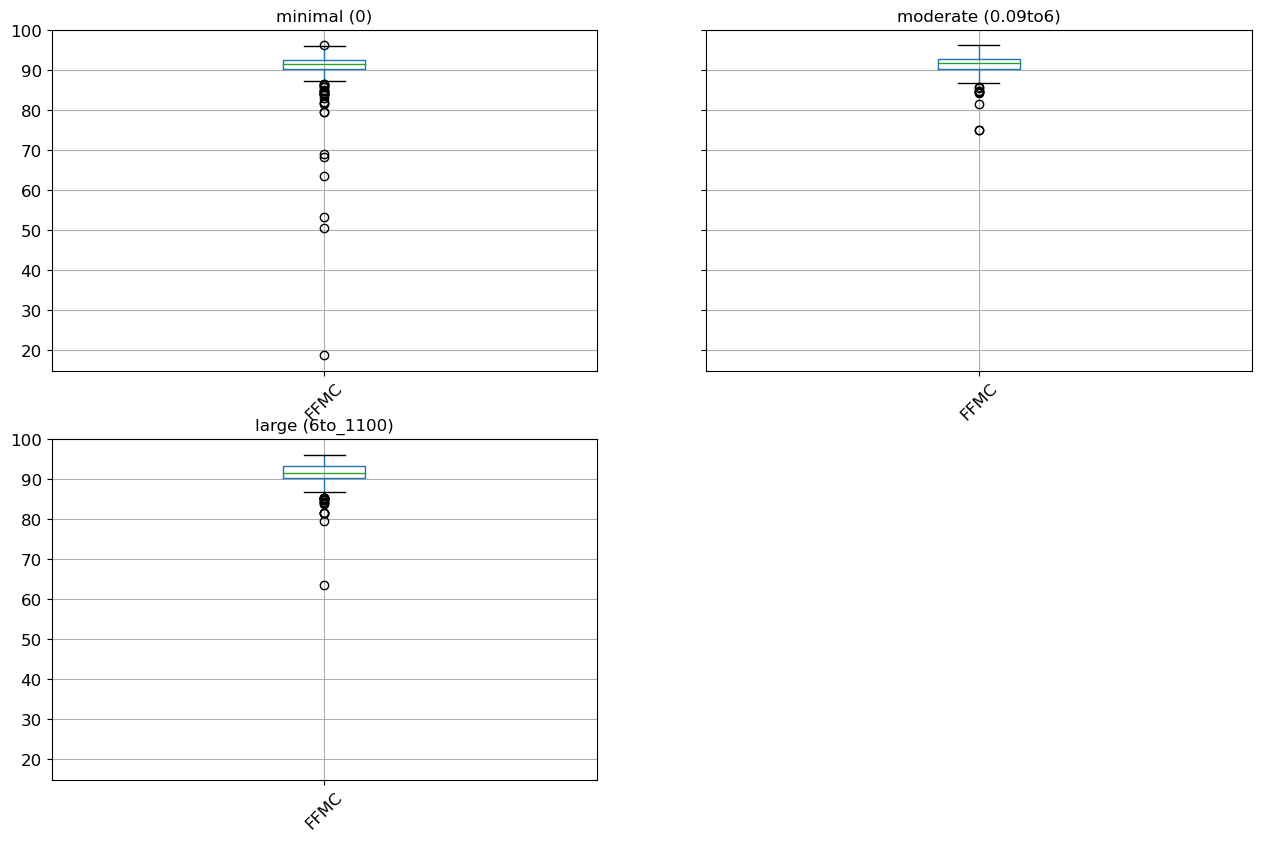

In [568]:
columns_to_boxplot = ['fire_spread','FFMC']
df = numerical_clean_data[columns_to_boxplot]
grouped = df.groupby('fire_spread')
grouped.boxplot(rot=45, fontsize=12, figsize=(15,10))  

minimal (0)                Axes(0.1,0.559091;0.363636x0.340909)
moderate (0.09to6)    Axes(0.536364,0.559091;0.363636x0.340909)
large (6to_1100)               Axes(0.1,0.15;0.363636x0.340909)
dtype: object

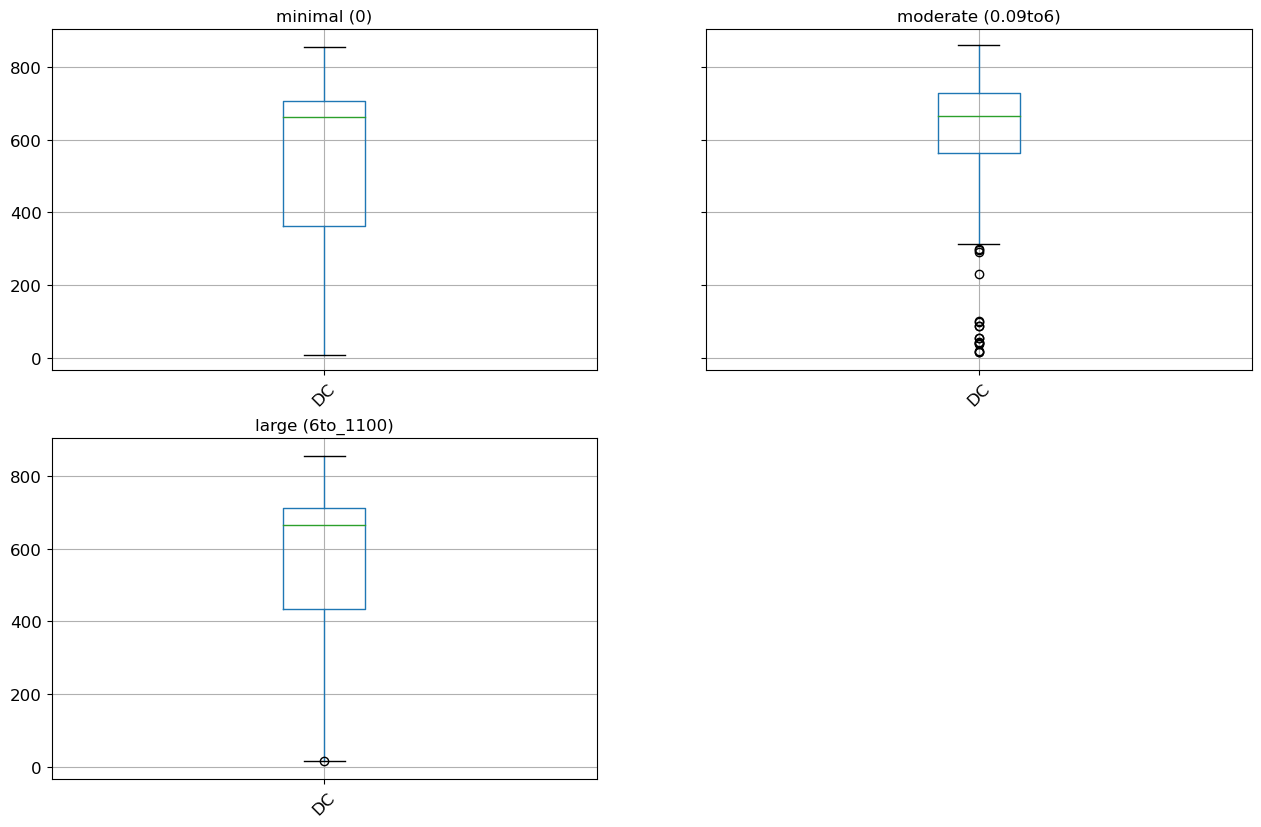

In [567]:
columns_to_boxplot = ['fire_spread','DC']
df = numerical_clean_data[columns_to_boxplot]
grouped = df.groupby('fire_spread')
grouped.boxplot(rot=45, fontsize=12, figsize=(15,10))  

minimal (0)                Axes(0.1,0.559091;0.363636x0.340909)
moderate (0.09to6)    Axes(0.536364,0.559091;0.363636x0.340909)
large (6to_1100)               Axes(0.1,0.15;0.363636x0.340909)
dtype: object

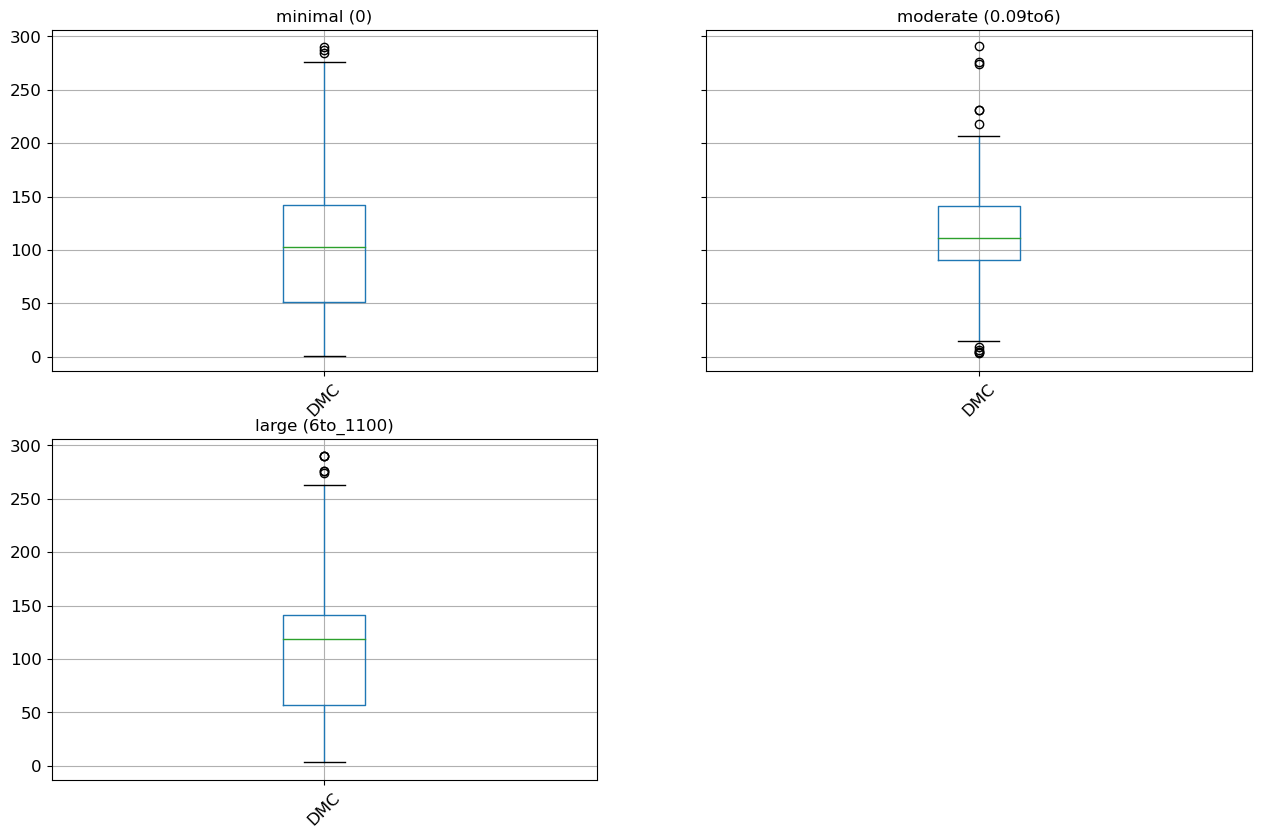

In [569]:
columns_to_boxplot = ['fire_spread','DMC']
df = numerical_clean_data[columns_to_boxplot]
grouped = df.groupby('fire_spread')
grouped.boxplot(rot=45, fontsize=12, figsize=(15,10))  

minimal (0)                Axes(0.1,0.559091;0.363636x0.340909)
moderate (0.09to6)    Axes(0.536364,0.559091;0.363636x0.340909)
large (6to_1100)               Axes(0.1,0.15;0.363636x0.340909)
dtype: object

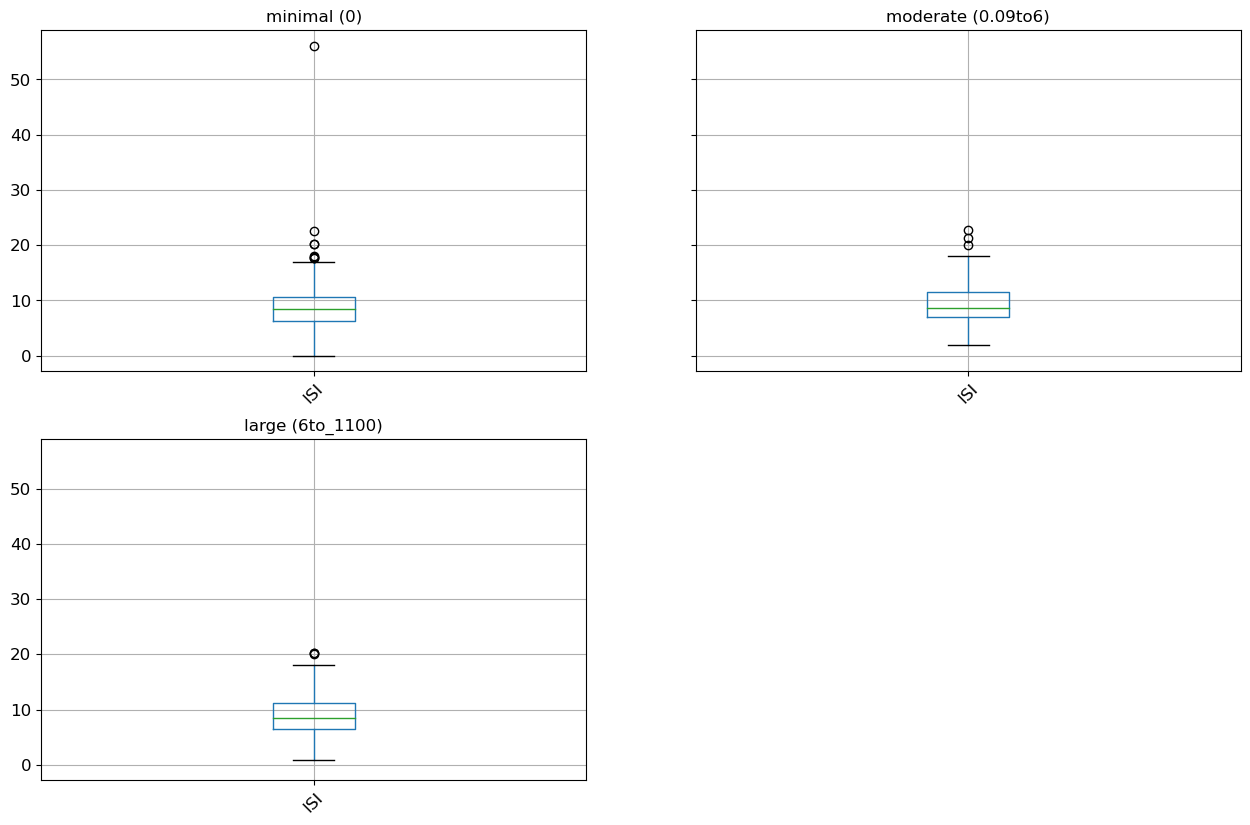

In [573]:
columns_to_boxplot = ['fire_spread','ISI']
df = numerical_clean_data[columns_to_boxplot]
grouped = df.groupby('fire_spread')
grouped.boxplot(rot=45, fontsize=12, figsize=(15,10))  

boxplot of DC by month

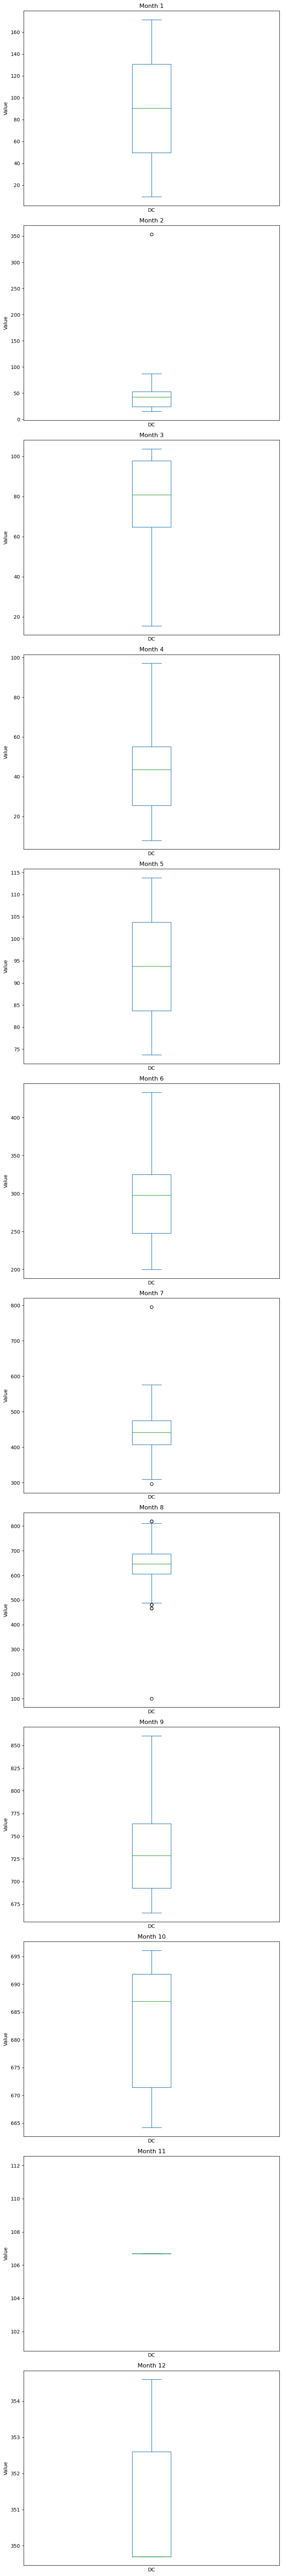

In [595]:
columns_to_boxplot = ['DC']
df = numerical_clean_data[columns_to_boxplot]

# Group by 'month_num' and create boxplots for 'DC'
grouped = df.groupby(numerical_clean_data['month_num'])

# Create subplots for each group
fig, axes = plt.subplots(nrows=len(grouped), ncols=1, figsize=(8, 6 * len(grouped)))

for (group, data), ax in zip(grouped, axes):
    data.plot(kind='box', ax=ax)
    ax.set_title(f'Month {group}')
    ax.set_xlabel('DC')
    ax.set_ylabel('Value')
    ax.set_xticks([])  # Remove x-axis ticks for clarity

plt.tight_layout()
plt.show()

<Axes: xlabel='month_num'>

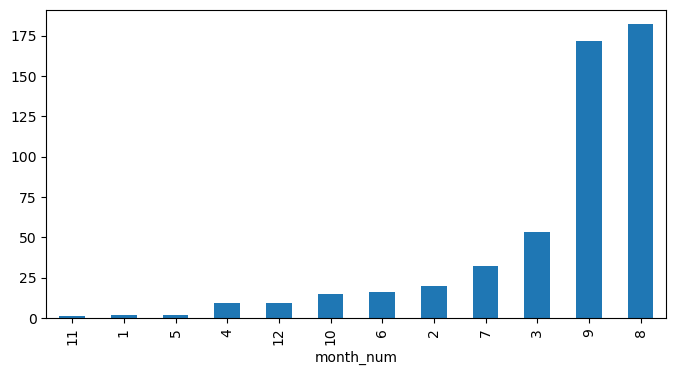

In [643]:
by_month['fire_spread'].count().sort_values(ascending=True).plot.bar()


In [642]:
by_month['fire_spread'].count().sort_values(ascending=True)

month_num
11      1
1       2
5       2
4       9
12      9
10     15
6      16
2      20
7      32
3      53
9     172
8     182
Name: fire_spread, dtype: int64

In [624]:
data

fire_spread
month_num fire_spread                    
1         minimal (0)                   2
          moderate (0.09to6)            0
          large (6to_1100)              0
2         minimal (0)                  10
          large (6to_1100)              6
          moderate (0.09to6)            4
3         minimal (0)                  35
          large (6to_1100)             11
          moderate (0.09to6)            7
4         minimal (0)                   5
          moderate (0.09to6)            2
          large (6to_1100)              2
5         minimal (0)                   1
          large (6to_1100)              1
          moderate (0.09to6)            0
6         minimal (0)                   8
          moderate (0.09to6)            5
          large (6to_1100)              3
7         minimal (0)                  14
          moderate (0.09to6)            9
          large (6to_1100)              9
8         minimal (0)                  83
          moderate (0.09to6)           56
          large (6to_1100)             43
9         minimal (0)                  75
          large (6to_1100)             51
          moderate (0.09to6)           46
10        minimal (0)                  10
          large (6to_1100)              4
          moderate (0.09to6)            1
11        minimal (0)                   1
          moderate (0.09to6)            0
          large (6to_1100)              0
12        large (6to_1100)              8
          moderate (0.09to6)            1
          minimal (0)                   0

<Axes: xlabel='month_num'>

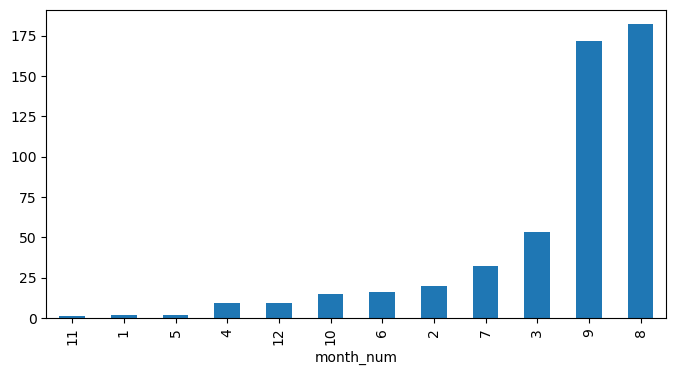

In [645]:
by_month['fire_spread'].count().sort_values(ascending=True).plot.bar()

In [647]:
numerical_clean_data.shape 

(513, 16)

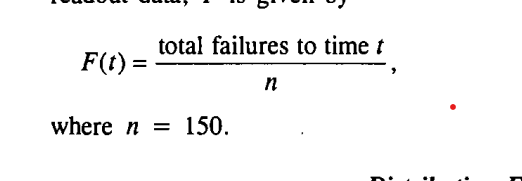

failures in this case being "large" fires

and time t is the month sorted by ascending value of large fire counts

In [155]:
numerical_clean_data['F']=numerical_clean_data.groupby('month_num')['fire_spread'].transform('count')

In [157]:
df = pd.DataFrame(data)

# Define the specific value to count
specific_value = 'large (6to_1100)'

# Define a custom counting function
def count_largefires(group):
    return (group == specific_value).sum()

# Calculate the count of the specific value within each group
numerical_clean_data['largefires_count'] = numerical_clean_data.groupby('month_num')['fire_spread'].transform(count_largefires)

numerical_clean_data.head()

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  FFMC_bins  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   (80, 90]   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0  (90, 100]   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0  (90, 100]   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0  (90, 100]   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   (80, 90]   

   fire_spread  month_num  day_num   F  largefires_count  
0  minimal (0)          3        4  53                11  
1  minimal (0)         10        1  15                 4  
2  minimal (0)         10        5  15                 4  
3  minimal (0)          3        4  53                11  
4  minimal (0)          3        6  53                11

In [158]:
numerical_clean_data['F']=numerical_clean_data['largefires_count']/513

In [160]:
#numerical_clean_data['F'].hist()
numerical_clean_data['largefires_count'].head()

0    11
1     4
2     4
3    11
4    11
Name: largefires_count, dtype: int64

In [162]:
numerical_clean_data["month_f_count_rank"] = numerical_clean_data.groupby('month_num')['largefires_count'].rank(ascending=False)




In [163]:
numerical_clean_data["month_f_count_rank"].unique()

array([27. ,  8. , 91.5, 86.5,  5. ,  8.5, 16.5, 10.5,  1.5,  1. ])

In [164]:
numerical_clean_data['largefires_count'].dtype

dtype('int64')

In [166]:
numerical_clean_data.head()

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  FFMC_bins  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   (80, 90]   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0  (90, 100]   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0  (90, 100]   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0  (90, 100]   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   (80, 90]   

   fire_spread  month_num  day_num         F  largefires_count  \
0  minimal (0)          3        4  0.021442                11   
1  minimal (0)         10        1  0.007797                 4   
2  minimal (0)         10        5  0.007797                 4   
3  minimal (0)          3        4  0.021442                11   
4  minimal (0)          3        6  0.021442                11   

   month_f_count_rank  
0                27.0  
1                 8.0  
2                 8.0  
3                27.0  
4                27.0

In [168]:
specific_value = 'large (6to_1100)'

# Define a custom counting function
def count_largefires(group):
    return (group == specific_value).sum()

# Calculate the count of the specific value within each group
numerical_clean_data['largefires_count'] = numerical_clean_data.groupby('month_num')['fire_spread'].transform(count_largefires)

numerical_clean_data.head()

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  FFMC_bins  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   (80, 90]   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0  (90, 100]   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0  (90, 100]   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0  (90, 100]   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   (80, 90]   

   fire_spread  month_num  day_num         F  largefires_count  \
0  minimal (0)          3        4  0.021442                11   
1  minimal (0)         10        1  0.007797                 4   
2  minimal (0)         10        5  0.007797                 4   
3  minimal (0)          3        4  0.021442                11   
4  minimal (0)          3        6  0.021442                11   

   month_f_count_rank  
0                27.0  
1                 8.0  
2                 8.0  
3                27.0  
4                27.0

In [170]:
numerical_clean_data["month_f_count_rank"] = numerical_clean_data.groupby('month_num')['largefires_count'].rank(ascending=False)

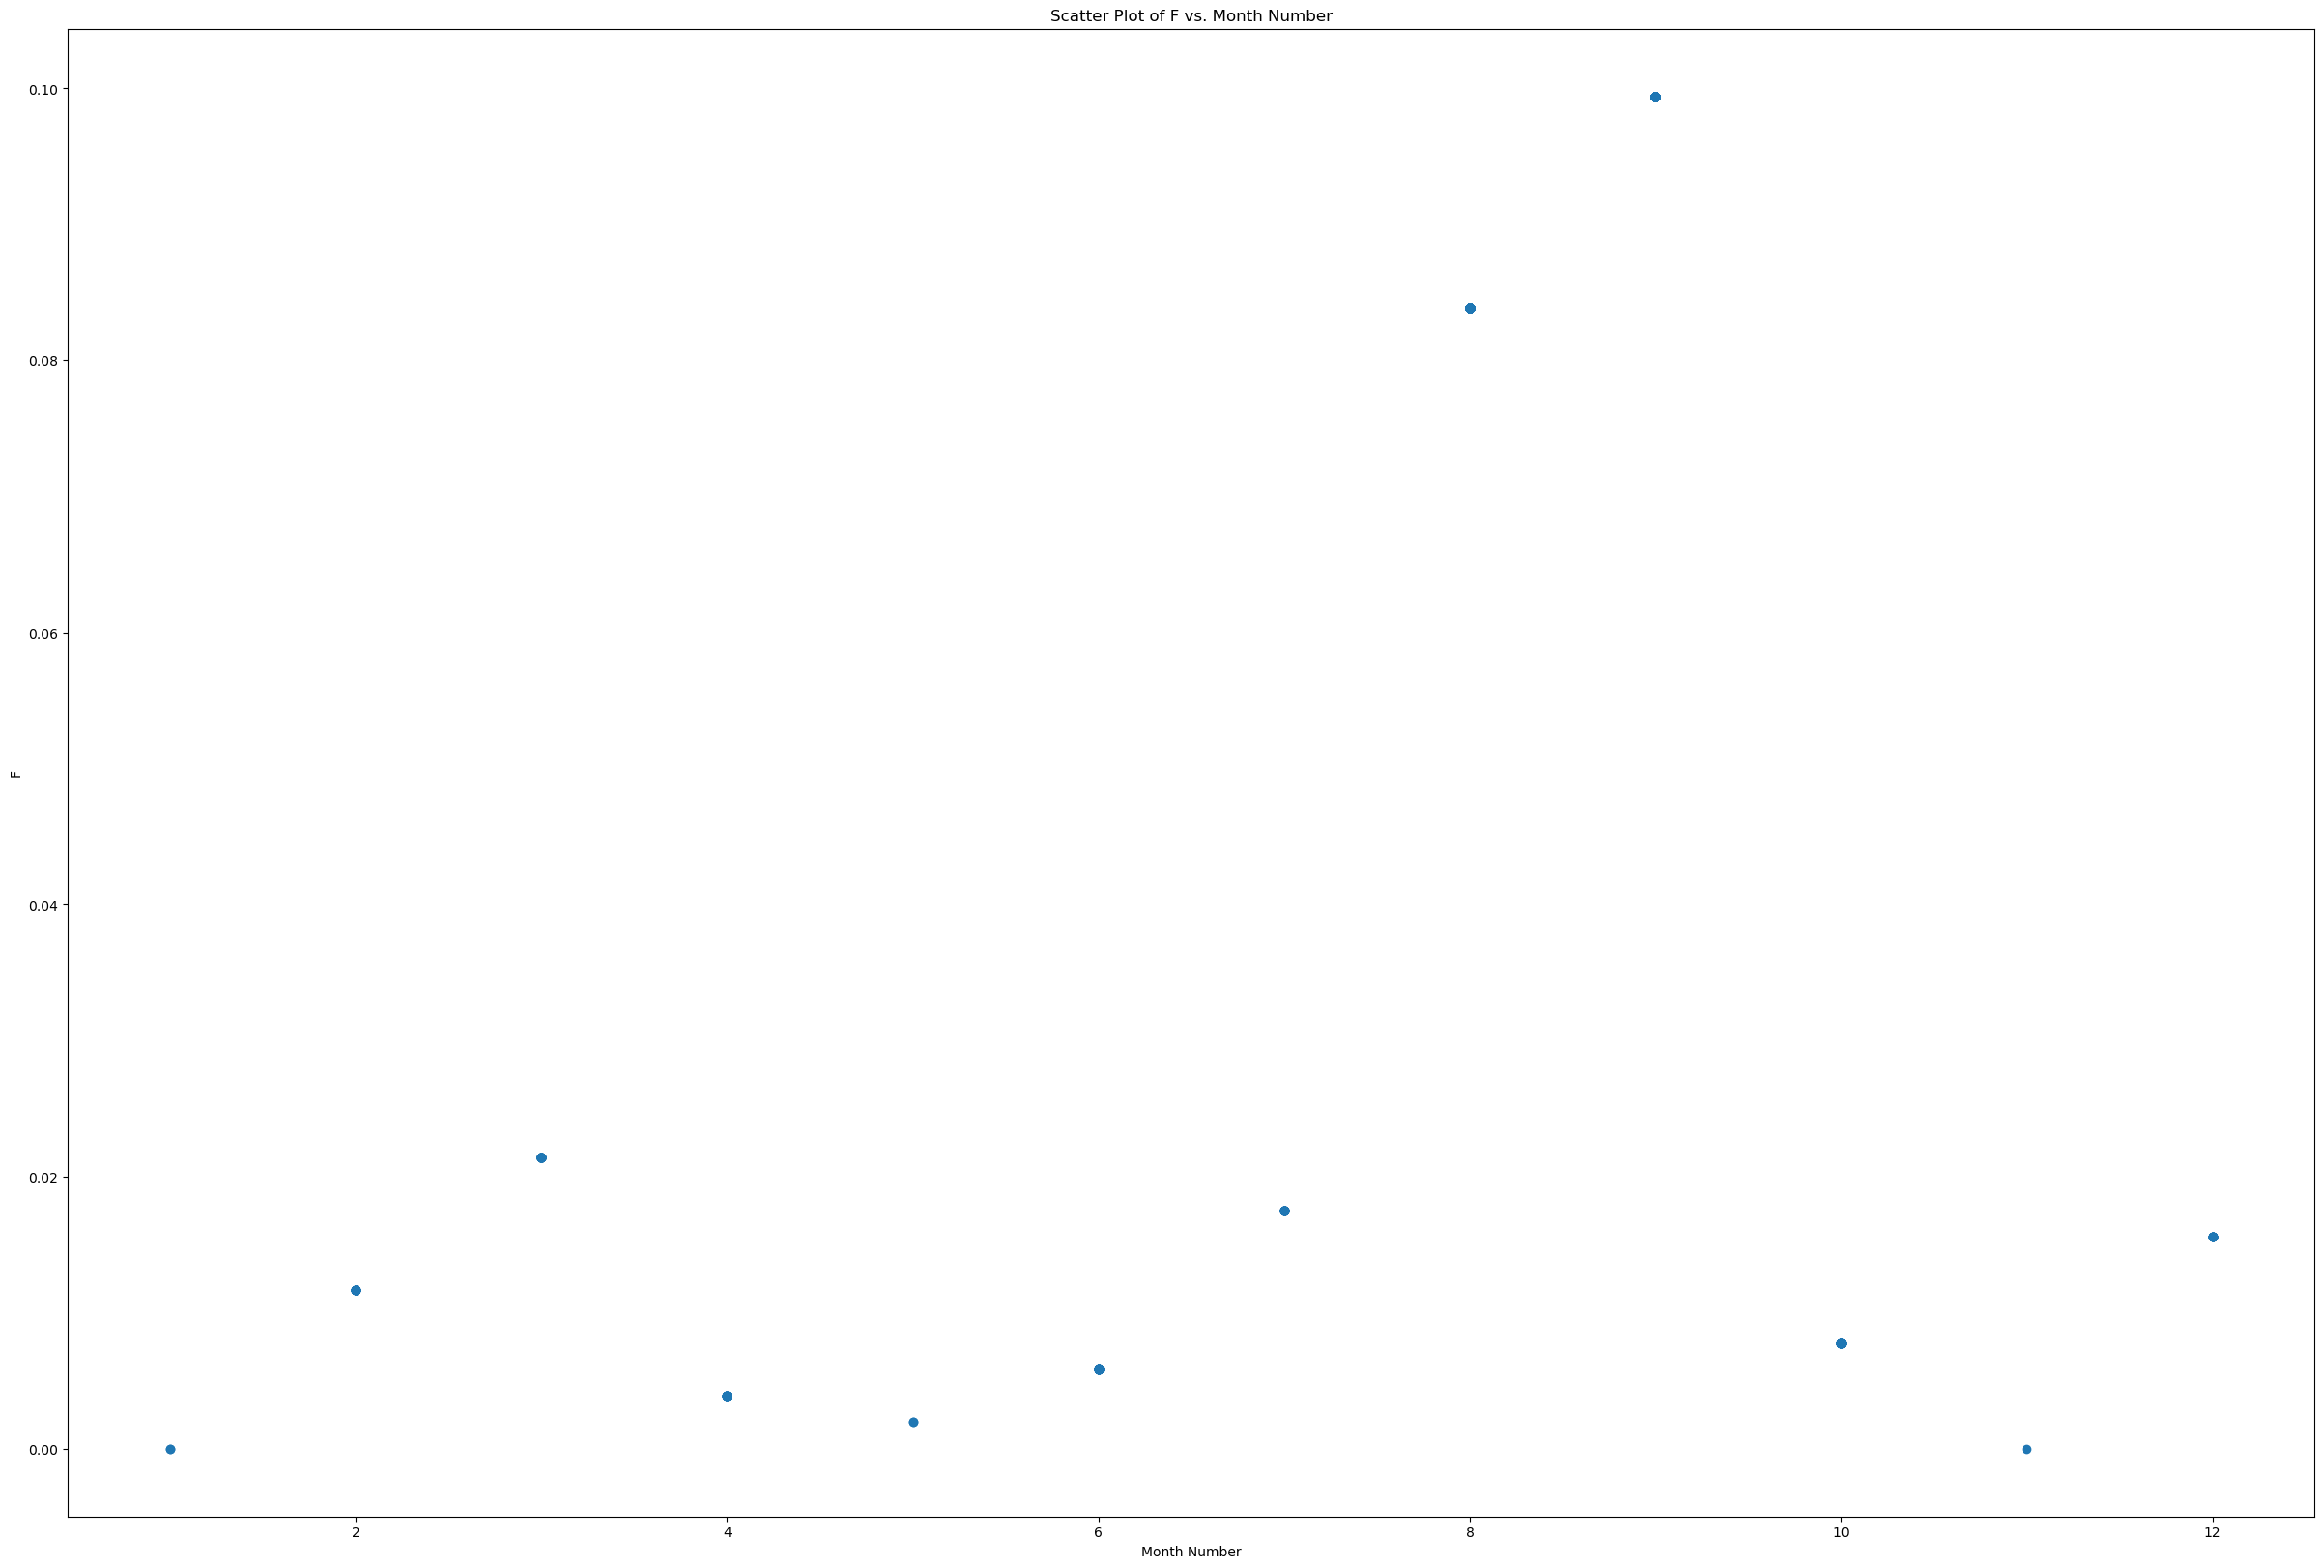

In [172]:
df = numerical_clean_data

# Create a scatter plot of 'F' against 'month_num'
plt.scatter(df['month_num'], df['F'])

# Add labels and a title
plt.xlabel('Month Number')
plt.ylabel('F')
plt.title('Scatter Plot of F vs. Month Number')

# Show the plot
plt.show()

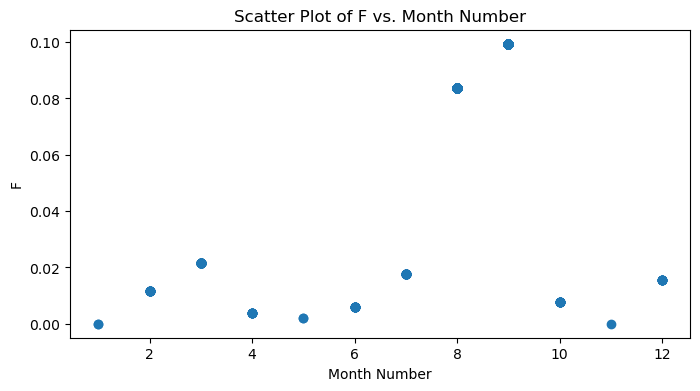

In [701]:
custom_order = [11,1,5,4,12,10,6,2,7,3,9,8]

# Convert 'month_num' to a categorical data type with the custom order
df['month_num'] = pd.Categorical(df['month_num'], categories=custom_order, ordered=True)

# Sort the DataFrame by the categorical 'month_num' column


# Create a scatter plot of 'F' against 'month_num'
plt.scatter(df['month_num'], df['F'])

# Add labels and a title
plt.xlabel('Month Number')
plt.ylabel('F')
plt.title('Scatter Plot of F vs. Month Number')

# Show the plot
plt.show()

In [176]:
by_month.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_30780\1628094995.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month.corr()


X         Y      FFMC       DMC        DC       ISI  \
month_num                                                                       
1         X        1.000000  1.000000 -1.000000 -1.000000  1.000000 -1.000000   
          Y        1.000000  1.000000 -1.000000 -1.000000  1.000000 -1.000000   
          FFMC    -1.000000 -1.000000  1.000000  1.000000 -1.000000  1.000000   
          DMC     -1.000000 -1.000000  1.000000  1.000000 -1.000000  1.000000   
          DC       1.000000  1.000000 -1.000000 -1.000000  1.000000 -1.000000   
...                     ...       ...       ...       ...       ...       ...   
12        RH       0.325713  0.960966 -0.940658  0.912941  0.932069  0.604513   
          wind     0.120581 -0.615198  0.403085 -0.334827 -0.378503  0.103277   
          rain          NaN       NaN       NaN       NaN       NaN       NaN   
          area     0.211985 -0.483304  0.571274 -0.529658 -0.551070 -0.297624   
          day_num  0.042474  0.865385 -0.744341  0.755424  0.777393  0.749339   

                       temp        RH      wind  rain      area   day_num  
month_num                                                                  
1         X       -1.000000  1.000000 -1.000000   NaN       NaN  1.000000  
          Y       -1.000000  1.000000 -1.000000   NaN       NaN  1.000000  
          FFMC     1.000000 -1.000000  1.000000   NaN       NaN -1.000000  
          DMC      1.000000 -1.000000  1.000000   NaN       NaN -1.000000  
          DC      -1.000000  1.000000 -1.000000   NaN       NaN  1.000000  
...                     ...       ...       ...   ...       ...       ...  
12        RH      -0.209753  1.000000 -0.663984   NaN -0.642019  0.840646  
          wind     0.531212 -0.663984  1.000000   NaN  0.535471 -0.461347  
          rain          NaN       NaN       NaN   NaN       NaN       NaN  
          area     0.200380 -0.642019  0.535471   NaN  1.000000 -0.515158  
          day_num -0.266063  0.840646 -0.461347   NaN -0.515158  1.000000  

[144 rows x 12 columns]

In [179]:
index_columns=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
count_area_by_month = by_month['area'].count()
index_means_by_month = by_month[index_columns].mean()
sum_area_by_month = by_month['area'].sum()

In [189]:
df1.columns = ['count_fire', 'sum_area']

# Reset index if needed
df1.reset_index(inplace=True)
df1

month_num  count_fire  sum_area
0           1           2      0.00
1           2          20    125.50
2           3          53    206.60
3           4           9     80.02
4           5           2     38.48
5           6          16     99.30
6           7          32    459.83
7           8         182   2297.99
8           9         172   3086.13
9          10          15     99.57
10         11           1      0.00
11         12           9    119.97

In [182]:
index_means_by_month.reset_index()

month_num       FFMC         DMC          DC        ISI       temp  \
0           1  50.400000    2.400000   90.350000   1.450000   5.250000   
1           2  82.905000    9.475000   54.670000   3.350000   9.635000   
2           3  89.401887   34.518868   75.850943   7.094340  13.009434   
3           4  85.788889   15.911111   48.555556   5.377778  12.044444   
4           5  87.350000   26.700000   93.750000   4.600000  14.650000   
5           6  89.325000   93.337500  301.806250  12.068750  20.575000   
6           7  91.328125  110.387500  450.603125   9.393750  22.109375   
7           8  92.343407  154.028571  641.224176  11.082967  21.648352   
8           9  91.243023  120.922674  734.615698   8.577326  19.612209   
9          10  90.453333   41.420000  681.673333   7.146667  17.093333   
10         11  79.500000    3.000000  106.700000   1.100000  11.800000   
11         12  84.966667   26.122222  351.244444   3.466667   4.522222   

           RH      wind      rain  
0   89.000000  2.000000  0.000000  
1   55.700000  3.755000  0.000000  
2   40.245283  4.969811  0.003774  
3   46.888889  4.666667  0.000000  
4   67.000000  4.450000  0.000000  
5   45.562500  4.112500  0.000000  
6   45.125000  3.734375  0.006250  
7   45.543956  4.074725  0.059341  
8   42.843023  3.557558  0.000000  
9   37.466667  3.460000  0.000000  
10  31.000000  4.500000  0.000000  
11  38.444444  7.644444  0.000000

In [203]:
bymonth_df=df1.merge(index_means_by_month, on='month_num', how='inner')

bymonth_df=bymonth_df.merge(spread_count_comparison, on='month_num', how='inner')

In [204]:
bymonth_df.corr()

month_num  count_fire  sum_area      FFMC       DMC        DC  \
month_num      1.000000    0.197822  0.266776  0.442581  0.283852  0.608453   
count_fire     0.197822    1.000000  0.966411  0.383427  0.801720  0.672943   
sum_area       0.266776    0.966411  1.000000  0.339407  0.773216  0.710469   
FFMC           0.442581    0.383427  0.339407  1.000000  0.546707  0.462916   
DMC            0.283852    0.801720  0.773216  0.546707  1.000000  0.766808   
DC             0.608453    0.672943  0.710469  0.462916  0.766808  1.000000   
ISI            0.122529    0.561252  0.491058  0.660414  0.875059  0.610667   
temp           0.209247    0.545287  0.520605  0.669672  0.840344  0.616154   
RH            -0.711199   -0.202858 -0.171621 -0.744134 -0.262614 -0.375602   
wind           0.490346   -0.128310 -0.155139  0.408458 -0.123220 -0.085600   
rain           0.117161    0.684049  0.533461  0.243901  0.643124  0.406919   
zero_count     0.140714    0.992003  0.934949  0.389614  0.780098  0.635905   
spread_count   0.241780    0.994756  0.980576  0.373919  0.809842  0.695067   
spread_ratio   0.344409    0.228405  0.243407  0.575564  0.369778  0.345548   

                   ISI      temp        RH      wind      rain  zero_count  \
month_num     0.122529  0.209247 -0.711199  0.490346  0.117161    0.140714   
count_fire    0.561252  0.545287 -0.202858 -0.128310  0.684049    0.992003   
sum_area      0.491058  0.520605 -0.171621 -0.155139  0.533461    0.934949   
FFMC          0.660414  0.669672 -0.744134  0.408458  0.243901    0.389614   
DMC           0.875059  0.840344 -0.262614 -0.123220  0.643124    0.780098   
DC            0.610667  0.616154 -0.375602 -0.085600  0.406919    0.635905   
ISI           1.000000  0.869393 -0.319116 -0.079951  0.461745    0.573639   
temp          0.869393  1.000000 -0.350139 -0.285493  0.422763    0.551383   
RH           -0.319116 -0.350139  1.000000 -0.533300 -0.083428   -0.210319   
wind         -0.079951 -0.285493 -0.533300  1.000000 -0.042607   -0.149719   
rain          0.461745  0.422763 -0.083428 -0.042607  1.000000    0.688552   
zero_count    0.573639  0.551383 -0.210319 -0.149719  0.688552    1.000000   
spread_count  0.544633  0.533954 -0.194433 -0.109457  0.672381    0.973893   
spread_ratio  0.369151  0.108976 -0.302384  0.677554  0.131340    0.174040   

              spread_count  spread_ratio  
month_num         0.241780      0.344409  
count_fire        0.994756      0.228405  
sum_area          0.980576      0.243407  
FFMC              0.373919      0.575564  
DMC               0.809842      0.369778  
DC                0.695067      0.345548  
ISI               0.544633      0.369151  
temp              0.533954      0.108976  
RH               -0.194433     -0.302384  
wind             -0.109457      0.677554  
rain              0.672381      0.131340  
zero_count        0.973893      0.174040  
spread_count      1.000000      0.269782  
spread_ratio      0.269782      1.000000

In [205]:
bymonth_df

month_num  count_fire  sum_area       FFMC         DMC          DC  \
0           1           2      0.00  50.400000    2.400000   90.350000   
1           2          20    125.50  82.905000    9.475000   54.670000   
2           3          53    206.60  89.401887   34.518868   75.850943   
3           4           9     80.02  85.788889   15.911111   48.555556   
4           5           2     38.48  87.350000   26.700000   93.750000   
5           6          16     99.30  89.325000   93.337500  301.806250   
6           7          32    459.83  91.328125  110.387500  450.603125   
7           8         182   2297.99  92.343407  154.028571  641.224176   
8           9         172   3086.13  91.243023  120.922674  734.615698   
9          10          15     99.57  90.453333   41.420000  681.673333   
10         11           1      0.00  79.500000    3.000000  106.700000   
11         12           9    119.97  84.966667   26.122222  351.244444   

          ISI       temp         RH      wind      rain  zero_count  \
0    1.450000   5.250000  89.000000  2.000000  0.000000           2   
1    3.350000   9.635000  55.700000  3.755000  0.000000          10   
2    7.094340  13.009434  40.245283  4.969811  0.003774          35   
3    5.377778  12.044444  46.888889  4.666667  0.000000           5   
4    4.600000  14.650000  67.000000  4.450000  0.000000           1   
5   12.068750  20.575000  45.562500  4.112500  0.000000           8   
6    9.393750  22.109375  45.125000  3.734375  0.006250          14   
7   11.082967  21.648352  45.543956  4.074725  0.059341          83   
8    8.577326  19.612209  42.843023  3.557558  0.000000          75   
9    7.146667  17.093333  37.466667  3.460000  0.000000          10   
10   1.100000  11.800000  31.000000  4.500000  0.000000           1   
11   3.466667   4.522222  38.444444  7.644444  0.000000           0   

    spread_count  spread_ratio  
0              0      0.000000  
1             10      0.500000  
2             18      0.339623  
3              4      0.444444  
4              1      0.500000  
5              8      0.500000  
6             18      0.562500  
7             99      0.543956  
8             97      0.563953  
9              5      0.333333  
10             0      0.000000  
11             9      1.000000

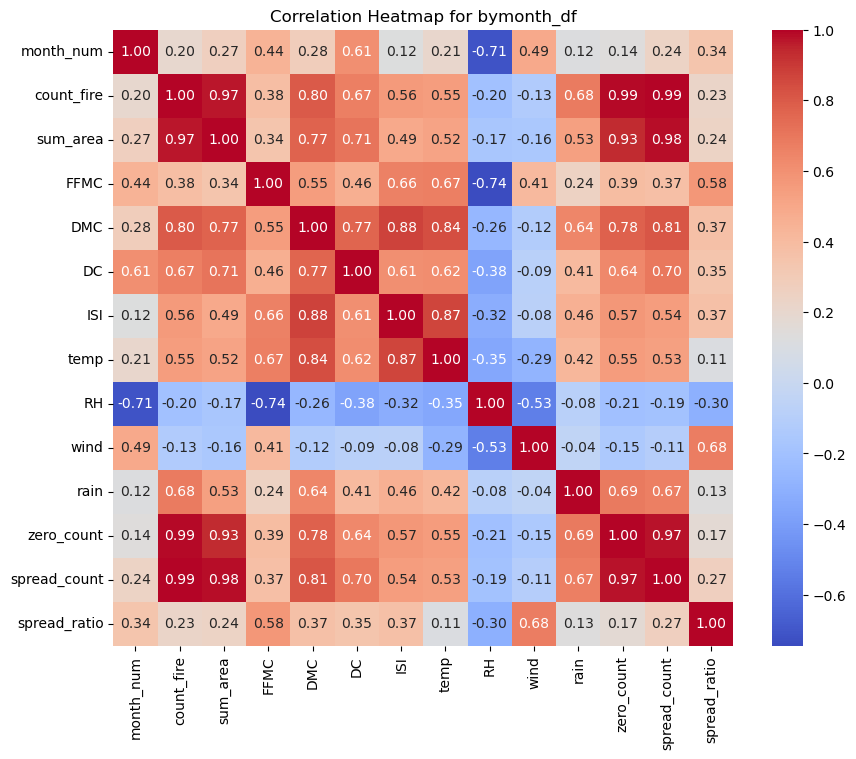

In [206]:
month_correlation_matrix = bymonth_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=month_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap for bymonth_df')

plt.show()

In [207]:
# best indexes for predicting the count and sum of fires in a month is DC and DMC at 0.7 to 0.8 corr

#best index for predicting a spread ratio by month is FFMC at a more modest 0.58

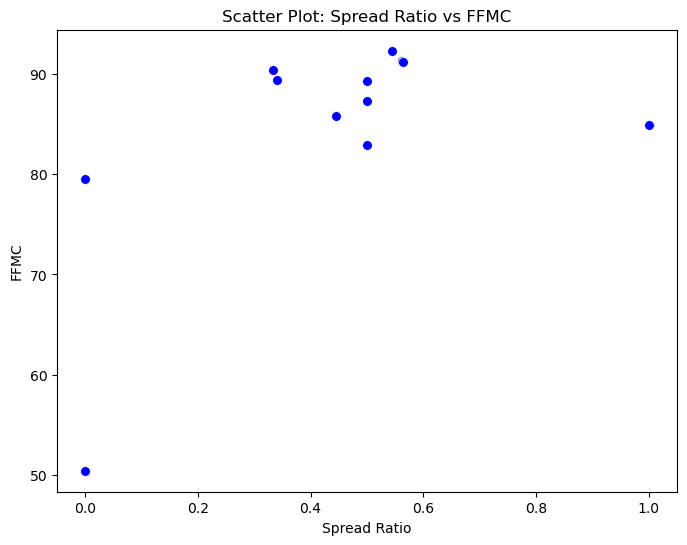

In [208]:
plt.figure(figsize=(8, 6))  
sns.scatterplot(x='spread_ratio', y='FFMC', data=bymonth_df, color='b', marker='o', s=50)

plt.xlabel('Spread Ratio')
plt.ylabel('FFMC')
plt.title('Scatter Plot: Spread Ratio vs FFMC')

plt.show()

In [1]:
#large_fires_by_month['rank_count_large_fires']=large_fires_by_month['large_fire_check'].rank(method='first')